<a href="https://colab.research.google.com/github/nguyenkimcuc/ransomware-detection-ml/blob/main/Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Khai phá dữ liệu






In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/GraduateDissertation/BitcoinHeistData.csv"
df = pd.read_csv(file_path)


In [ ]:
print(df.shape)

(2916697, 10)


In [ ]:
df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [ ]:
df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [ ]:
print(df.isnull().sum())

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64


In [ ]:
# Thêm cột binary_label
df['binary_label'] = df['label'].apply(lambda x: 0 if x == 'white' else 1)

binary_label
0    2875284
1      41413
Name: count, dtype: int64


<ipython-input-15-5d03d1f9799b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='count', data=label_df, palette='pastel')


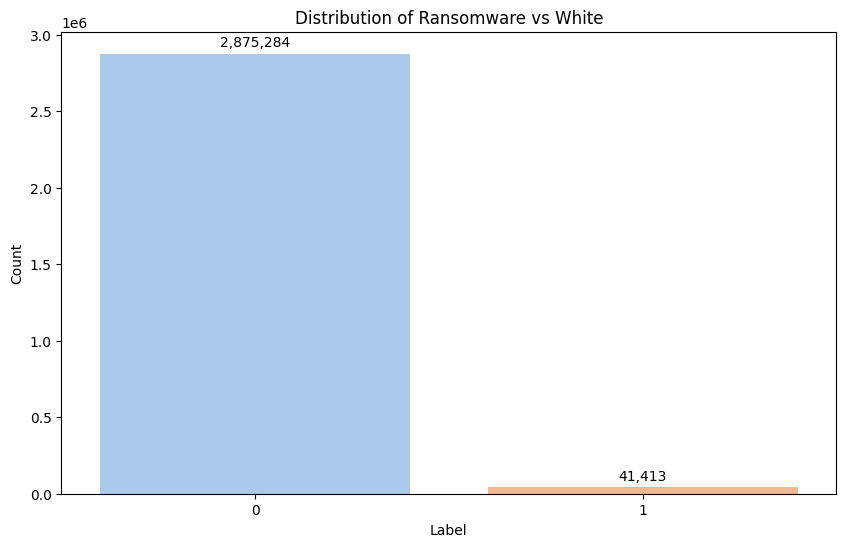

In [ ]:
label_count = df['binary_label'].value_counts()
print(label_count)

# Chuyển về DataFrame để tiện vẽ
label_df = label_count.reset_index()
label_df.columns = ['label', 'count']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='count', data=label_df, palette='pastel')

# Thêm nhãn và tiêu đề
plt.title('Distribution of Ransomware vs White')
plt.xlabel('Label')
plt.ylabel('Count')

# Hiển thị số lượng trên từng cột
for i, row in label_df.iterrows():
    plt.text(i, row['count'] + max(label_df['count']) * 0.01, f"{row['count']:,}",
             ha='center', va='bottom', fontsize=10)

# Lưu biểu đồ
plt.savefig('/content/drive/MyDrive/Graduation4/label-distribution.png')

# Hiển thị biểu đồ
plt.show()

In [ ]:
df.drop(columns = ['label'], inplace = True)

In [ ]:
df.to_csv('/content/drive/MyDrive/Graduation4/df_binary.csv', index=False)

## Chia tập dữ liệu

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Graduation4/df_binary.csv')

In [ ]:
df.head()

,address,year,day,length,weight,count,looped,neighbors,income,binary_label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,1
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,1
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,1
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,1
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,1


In [ ]:
X = df[['year','day','address','length','weight','count','looped','neighbors','income']]
y = df['binary_label']

In [ ]:
from sklearn.model_selection import train_test_split

# Chia 20% dữ liệu làm tập kiểm tra (test) và 80% còn lại làm tập huấn luyện - kiểm định (train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Kiểm tra kích thước dữ liệu sau khi chia
print(f"Train set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

Train set size: 2333357 samples
Test set size: 583340 samples


In [ ]:
X_train.to_csv('/content/drive/MyDrive/Graduation4/X_train.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/Graduation4/X_test.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/Graduation4/y_train.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/Graduation4/y_test.csv', index=False)


In [ ]:
X_train.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06
mean,2.014475e+03,1.814789e+02,4.502953e+01,5.468785e-01,7.224087e+02,2.385177e+02,2.204869e+00,4.438750e+09
std,2.257354e+00,1.040159e+02,5.899327e+01,3.757735e+00,1.691009e+03,9.665936e+02,1.785847e+01,1.580960e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.151475e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428363e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999900e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.834770e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.938000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [ ]:
import warnings
import matplotlib

warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning) # Use MatplotlibDeprecationWarning instead of mplDeprecation
_ = np.seterr(over='ignore')

In [ ]:
from scipy.stats import boxcox

# 1. Đếm tần suất xuất hiện của mỗi địa chỉ trong tập train
address_counts = X_train['address'].value_counts()

# 2. Biến đổi Box-Cox
boxcox_values, _ = boxcox(address_counts.values)
dict_n_address = dict(zip(address_counts.index, boxcox_values))

# 3. Tạo feature cho train
n_address_feature_train = X_train['address'].map(dict_n_address).fillna(0).values

# 4. Xử lý cold start cho test (dùng giá trị min trong dict)
min_value = min(dict_n_address.values())
n_address_feature_test = X_test['address'].map(dict_n_address).fillna(min_value).values

In [ ]:
X_train['n_address'] = n_address_feature_train

In [ ]:
X_test['n_address'] = n_address_feature_test

In [ ]:
X_train.to_csv('/content/drive/MyDrive/Graduation2/X_train_n_address.csv')
X_test.to_csv('/content/drive/MyDrive/Graduation2/X_test_n_address.csv')

In [ ]:
X_train.describe()

,year,day,length,weight,count,looped,neighbors,income,n_address
count,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06
mean,2.014475e+03,1.814789e+02,4.502953e+01,5.468785e-01,7.224087e+02,2.385177e+02,2.204869e+00,4.438750e+09,4.686081e-03
std,2.257354e+00,1.040159e+02,5.899327e+01,3.757735e+00,1.691009e+03,9.665936e+02,1.785847e+01,1.580960e+11,1.251770e-02
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07,0.000000e+00
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.151475e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428363e+07,0.000000e+00
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999900e+08,0.000000e+00
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.834770e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.938000e+08,0.000000e+00
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13,3.812398e-02


In [ ]:
X_train.head()

,year,day,address,length,weight,count,looped,neighbors,income,n_address
2264511,2017,43,366ZrW8BbPeK21L7bwTJkzKqEfKJceJpKm,0,0.500000,1,0,2,31515644.0,0.0
1289376,2014,163,1Nyy3jRxjmt9dCWPe5LvnSZhArnSfjAykR,4,0.040000,1,0,2,100000000.0,0.0
1046802,2013,286,1B9zENZjbkFxwdjHSmAyqXrPq5FLb9vDmZ,2,0.500000,1,0,1,81050000.0,0.0
2335966,2017,115,35hfQ92WkncKrupG9NVtSmScvKXXkBfnPD,92,1.016858,72,0,2,100030000.0,0.0
1214724,2014,89,1Bmm4KkZuzdzEjKtVmtTVyQoVKEE1J4wmz,144,0.028767,1189,1187,4,184953990.0,0.0


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
# --- 5. Week và Month (suy từ year + day) ---
def get_month(df):
    # Chuyển year + day (day-of-year) về datetime
    dates = pd.to_datetime(df['year'].astype(str) + '-' + df['day'].astype(str), format='%Y-%j', errors='coerce')
    df = df.copy()
    df['Month'] = dates.dt.month.astype('Int64')
    return df

# Áp dụng lên cả 2 tập
X_train = get_month(X_train)
X_test = get_month(X_test)

In [ ]:
X_train.head()

,year,day,address,length,weight,count,looped,neighbors,income,n_address,Month
2264511,2017,43,366ZrW8BbPeK21L7bwTJkzKqEfKJceJpKm,0,0.500000,1,0,2,31515644.0,0.0,2
1289376,2014,163,1Nyy3jRxjmt9dCWPe5LvnSZhArnSfjAykR,4,0.040000,1,0,2,100000000.0,0.0,6
1046802,2013,286,1B9zENZjbkFxwdjHSmAyqXrPq5FLb9vDmZ,2,0.500000,1,0,1,81050000.0,0.0,10
2335966,2017,115,35hfQ92WkncKrupG9NVtSmScvKXXkBfnPD,92,1.016858,72,0,2,100030000.0,0.0,4
1214724,2014,89,1Bmm4KkZuzdzEjKtVmtTVyQoVKEE1J4wmz,144,0.028767,1189,1187,4,184953990.0,0.0,3


In [ ]:
X_train.rename(columns={'Month': 'month'}, inplace=True)
X_test.rename(columns={'Month': 'month'}, inplace=True)

In [ ]:
X_train.drop(columns = ['address','day'], inplace = True)
X_test.drop(columns = ['address','day'], inplace = True)

In [ ]:
X_train.to_csv('/content/drive/MyDrive/Graduation2/X_train_fe.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/Graduation2/X_test_fe.csv', index=False)

binary_label
0    2300227
1      33130
Name: count, dtype: int64


<ipython-input-24-cd55d28804c5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='count', data=label_df, palette='pastel')


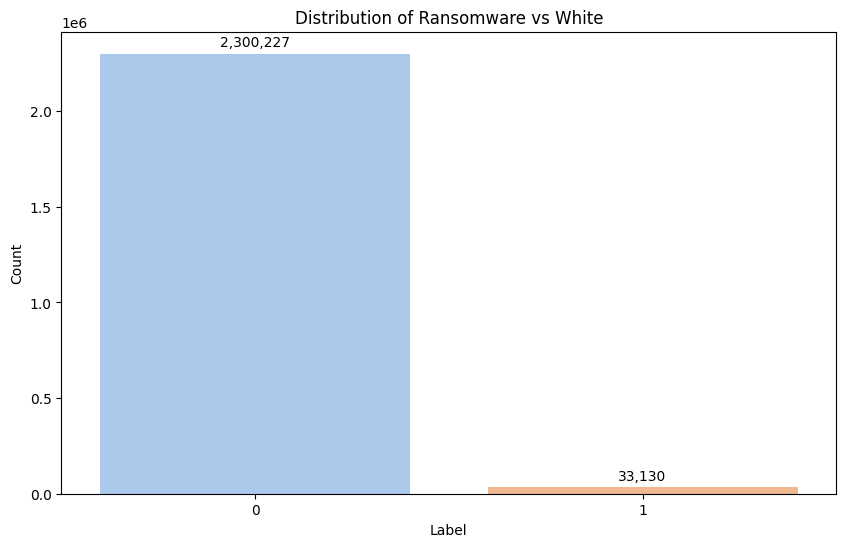

In [ ]:
label_count = y_train.value_counts()
print(label_count)

# Chuyển về DataFrame để tiện vẽ
label_df = label_count.reset_index()
label_df.columns = ['label', 'count']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='count', data=label_df, palette='pastel')

# Thêm nhãn và tiêu đề
plt.title('Distribution of Ransomware vs White')
plt.xlabel('Label')
plt.ylabel('Count')

# Hiển thị số lượng trên từng cột
for i, row in label_df.iterrows():
    plt.text(i, row['count'] + max(label_df['count']) * 0.01, f"{row['count']:,}",
             ha='center', va='bottom', fontsize=10)

# Lưu biểu đồ
plt.savefig('/content/drive/MyDrive/Graduation4/label-distribution_xtrain.png')

# Hiển thị biểu đồ
plt.show()

In [ ]:
y_train = pd.read_csv('/content/drive/MyDrive/Graduation4/y_train.csv')

In [ ]:
y_train.head()

,binary_label
0,0
1,0
2,0
3,0
4,0


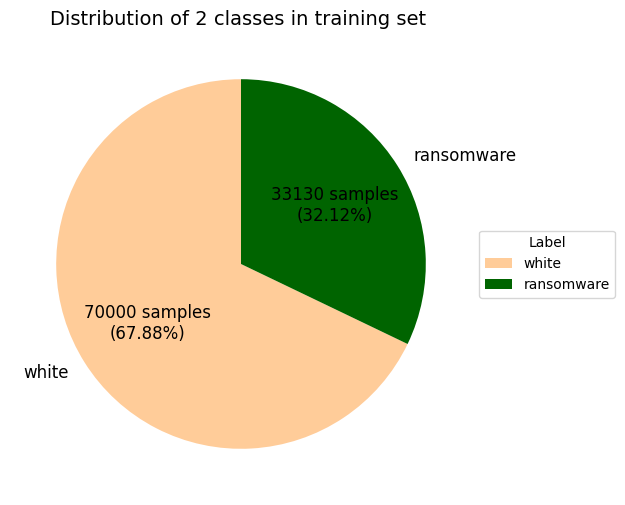

In [ ]:
import matplotlib.pyplot as plt

# Giả sử y_train là DataFrame có cột 'family_encoded'
label_counts = y_resampled['binary_label'].value_counts()
labels = label_counts.index
sizes = label_counts.values

# Gán màu cho các nhãn (có thể tự chọn màu tùy thích)
colors = ['#ffcc99','#006400']  # Thêm màu cho các nhãn 2 và 3
# Sửa label_names để bao gồm tất cả các nhãn
label_names = {0: 'white', 1: 'ransomware'}  # Gán tên nhãn cho chú thích

# Tạo nhãn hiển thị số lượng mẫu và tỉ lệ phần trăm
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{count} samples\n({pct:.2f}%)'
    return my_autopct

# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=[label_names[label] for label in labels],
    autopct=make_autopct(sizes),
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)

# Thêm chú thích (legend)
ax.legend(wedges, [label_names[label] for label in labels],
          title='Label', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Distribution of 2 classes in test set ', fontsize=14)
plt.show()

In [ ]:
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')

In [ ]:
y_train.head()

,binary_label
2264511,0
1289376,0
1046802,0
2335966,0
1214724,0


In [ ]:
y_train.value_counts()

,count
binary_label,
0,2300227
1,33130


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# undersample nhãn 0 xuống còn 70000 mẫu

rus = RandomUnderSampler(sampling_strategy={0: 70000, 1: 33130}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Kiểm tra lại phân bố sau undersample
print(pd.Series(y_resampled).value_counts())


binary_label
0    70000
1    33130
Name: count, dtype: int64


In [ ]:
X_resampled.to_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv', index=False)
y_resampled.to_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv', index=False)

# 2. Mô hình Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import numpy as np


In [ ]:
# Khởi tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Khởi tạo chiến lược cross-validation (5-fold, giữ nguyên tỷ lệ nhãn)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Tạo scorer dùng F1-score (macro hoặc weighted tùy bạn)
f1_scorer = make_scorer(f1_score, average='binary')

# Thực hiện cross-validation
f1_scores = cross_val_score(dt_model, X_resampled, y_resampled,
                            cv=cv, scoring=f1_scorer, n_jobs=-1)

# In kết quả trung bình và độ lệch chuẩn
print("F1-scores cho từng fold:", f1_scores)
print("Trung bình F1-score: %.4f" % np.mean(f1_scores))
print("Độ lệch chuẩn: %.4f" % np.std(f1_scores))


F1-scores cho từng fold: [0.87084926 0.87732454 0.87357708 0.87723516 0.87520698]
Trung bình F1-score: 0.8748
Độ lệch chuẩn: 0.0024


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           cv=cv, scoring=f1_scorer, n_jobs=-1)

# Huấn luyện grid search
grid_search.fit(X_resampled, y_resampled)

# Kết quả tốt nhất
print("Best params:", grid_search.best_params_)
print("Best F1-score: %.4f" % grid_search.best_score_)


Best params: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best F1-score: 0.8871


In [ ]:
import joblib

# Lưu model tốt nhất sau grid search
best_dt_model = grid_search.best_estimator_
joblib.dump(best_dt_model, '/content/drive/MyDrive/Graduation4/best_decision_tree_model.pkl')


['/content/drive/MyDrive/Graduation4/best_decision_tree_model.pkl']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Load model nếu cần (hoặc dùng luôn biến best_dt_model)
# best_dt_model = joblib.load('best_decision_tree_model.pkl')

# Dự đoán trên tập test
y_pred = best_dt_model.predict(X_test)

# Đánh giá kết quả
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Tính riêng F1-score nếu muốn
f1 = f1_score(y_test, y_pred, average='binary')
print("F1-score trên tập test: %.4f" % f1)


Confusion Matrix:
 [[550167  24890]
 [   902   7381]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    575057
           1       0.23      0.89      0.36      8283

    accuracy                           0.96    583340
   macro avg       0.61      0.92      0.67    583340
weighted avg       0.99      0.96      0.97    583340

F1-score trên tập test: 0.3640


# 3. Mô hình RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import joblib

# 1. Định nghĩa mô hình và các siêu tham số cần tìm kiếm
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 2. Scorer sử dụng F1 macro
f1_scorer = make_scorer(f1_score, average='macro')

# 3. Sử dụng StratifiedKFold để giữ tỷ lệ lớp
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring=f1_scorer, cv=cv, n_jobs=-1, verbose=2)

# 5. Huấn luyện
grid_search.fit(X_resampled, y_resampled)

# 6. In kết quả
print("Best F1-score (macro): {:.4f}".format(grid_search.best_score_))
print("Best params:", grid_search.best_params_)

# 7. Lưu mô hình tốt nhất
joblib.dump(grid_search.best_estimator_, 'best_random_forest_model.pkl')
print("Mô hình đã được lưu vào 'best_random_forest_model.pkl'")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best F1-score (macro): 0.9266
Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mô hình đã được lưu vào 'best_random_forest_model.pkl'


In [ ]:
joblib.dump(grid_search.best_estimator_, '/content/drive/MyDrive/Graduation4/best_random_forest_model.pkl')

['/content/drive/MyDrive/Graduation4/best_random_forest_model.pkl']

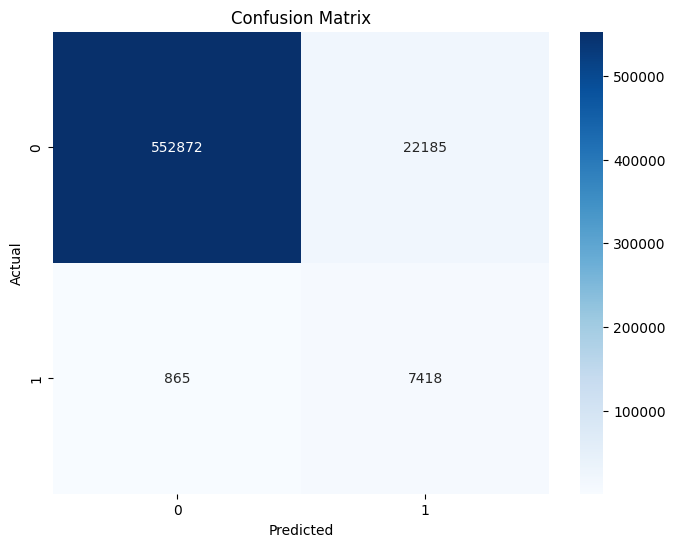

Classification Report:
              precision    recall  f1-score   support

           0     0.9984    0.9614    0.9796    575057
           1     0.2506    0.8956    0.3916      8283

    accuracy                         0.9605    583340
   macro avg     0.6245    0.9285    0.6856    583340
weighted avg     0.9878    0.9605    0.9712    583340



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# 1. Tải mô hình đã lưu
model = joblib.load('best_random_forest_model.pkl')

# 2. Dự đoán trên tập test
y_pred = model.predict(X_test)

# 3. In Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 4. In Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


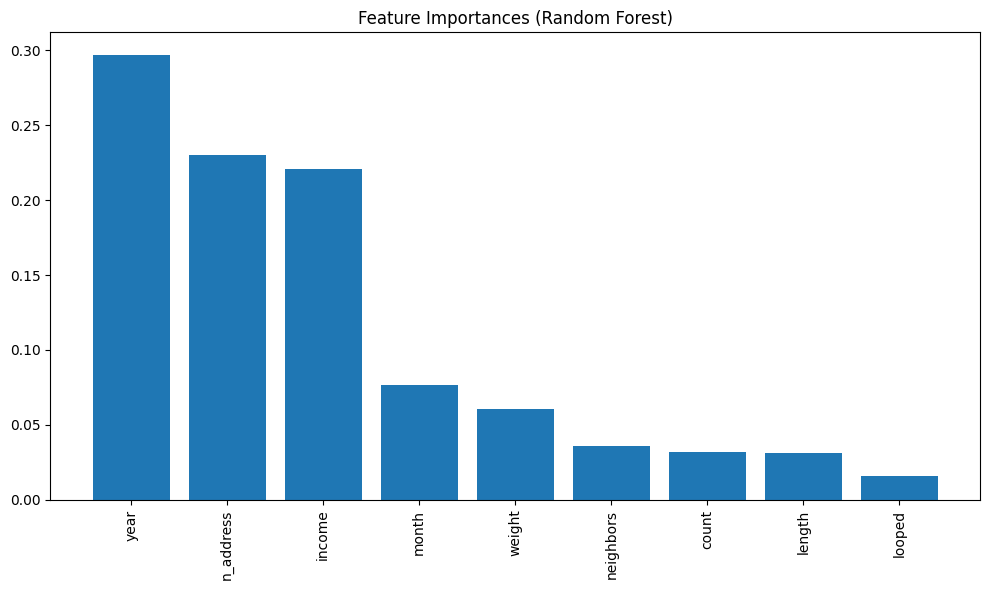

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Giả sử bạn có tên các feature dưới dạng list
# Nếu X_resampled là DataFrame, ta có thể lấy tên cột từ nó
feature_names = X_resampled.columns if hasattr(X_resampled, 'columns') else [f'feature_{i}' for i in range(X_resampled.shape[1])]

# Lấy importance và sắp xếp
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sắp giảm dần

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


Dùng BalancedRandomForestClassifier

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import joblib

# 1. Khởi tạo mô hình
brf = BalancedRandomForestClassifier(random_state=42, n_jobs=-1)

# 2. Grid các siêu tham số cơ bản
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 3. F1-score (macro hoặc 'binary' nếu chỉ tập trung lớp ransomware)
f1_scorer = make_scorer(f1_score, average='binary', pos_label=1)

# 4. K-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. GridSearchCV
grid_search = GridSearchCV(estimator=brf, param_grid=param_grid,
                           scoring=f1_scorer, cv=cv, n_jobs=-1, verbose=2)

# 6. Huấn luyện
grid_search.fit(X_resampled, y_resampled)

# 7. In kết quả
print("Best F1-score (binary, ransomware): {:.4f}".format(grid_search.best_score_))
print("Best params:", grid_search.best_params_)

# 8. Lưu mô hình
joblib.dump(grid_search.best_estimator_, '/content/drive/MyDrive/Graduation4/balanced_random_forest_model.pkl')
print("Mô hình đã được lưu vào '/content/drive/MyDrive/Graduation4/balanced_random_forest_model.pkl'")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best F1-score (binary, ransomware): 0.8960
Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mô hình đã được lưu vào '/content/drive/MyDrive/Graduation4/balanced_random_forest_model.pkl'


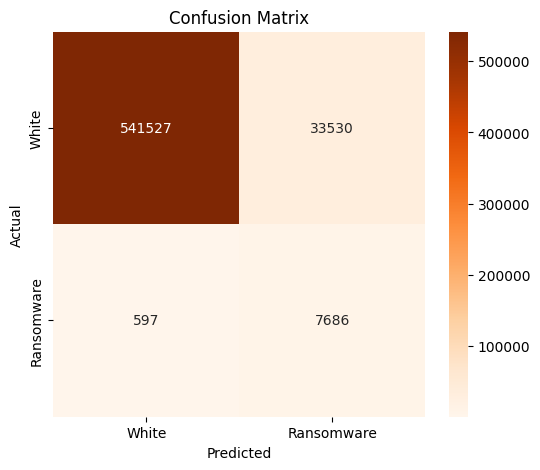

Classification Report:
              precision    recall  f1-score   support

       White     0.9989    0.9417    0.9695    575057
  Ransomware     0.1865    0.9279    0.3106      8283

    accuracy                         0.9415    583340
   macro avg     0.5927    0.9348    0.6400    583340
weighted avg     0.9874    0.9415    0.9601    583340



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Tải mô hình
model = joblib.load('/content/drive/MyDrive/Graduation4/balanced_random_forest_model.pkl')

# 2. Dự đoán
y_pred = model.predict(X_test)

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["White", "Ransomware"], yticklabels=["White", "Ransomware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 4. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["White", "Ransomware"], digits=4))


# 4. Mô hình XGBoost

XG Boost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import joblib

# 1. Khởi tạo mô hình XGBoost cơ bản
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42)

# 2. Grid tham số (có thể điều chỉnh mở rộng thêm)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 10, 30]  # Cân bằng class 1 nếu cần
}

# 3. F1-score binary, tập trung vào lớp Ransomware (label = 1)
f1_scorer = make_scorer(f1_score, average='binary', pos_label=1)

# 4. K-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. GridSearch
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring=f1_scorer, cv=cv, verbose=2, n_jobs=-1)

# 6. Huấn luyện
grid_search.fit(X_resampled, y_resampled)

# 7. Kết quả
print("Best F1-score (binary, ransomware): {:.4f}".format(grid_search.best_score_))
print("Best params:", grid_search.best_params_)

# 8. Lưu mô hình
joblib.dump(grid_search.best_estimator_, '/content/drive/MyDrive/Graduation4/best_xgboost_model.pkl')
print("✅ Đã lưu mô hình tại '/content/drive/MyDrive/Graduation4/best_xgboost_model.pkl'")


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:46:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best F1-score (binary, ransomware): 0.9085
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}
✅ Đã lưu mô hình tại '/content/drive/MyDrive/Graduation4/best_xgboost_model.pkl'


Fine-tuning Xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import joblib

# 1. Khởi tạo mô hình XGBoost cơ bản
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42)

# 2. Grid tham số mở rộng
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 10, 30]  # Thử cân bằng các lớp nếu cần
}

# 3. F1-score binary cho lớp ransomware
f1_scorer = make_scorer(f1_score, average='binary', pos_label=1)

# 4. K-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring=f1_scorer, cv=cv, verbose=2, n_jobs=-1)

# 6. Huấn luyện
grid_search.fit(X_resampled, y_resampled)

# 7. Kết quả
print("Best F1-score (binary, ransomware): {:.4f}".format(grid_search.best_score_))
print("Best params:", grid_search.best_params_)

# 8. Lưu mô hình đã tối ưu
joblib.dump(grid_search.best_estimator_, '/content/drive/MyDrive/Graduation4/tuned_xgboost_model.pkl')
print("✅ Mô hình đã được lưu tại '/content/drive/MyDrive/Graduation4/tuned_xgboost_model.pkl'")


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:32:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best F1-score (binary, ransomware): 0.9089
Best params: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.9}
✅ Mô hình đã được lưu tại '/content/drive/MyDrive/Graduation4/tuned_xgboost_model.pkl'


In [ ]:
X_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv')
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Graduation4/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Graduation4/y_test.csv')


# 5. Mô hình LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
import numpy as np
import time


In [ ]:
# Scorer dùng F1-score cho lớp 1 (Ransomware)
f1_ransomware = make_scorer(f1_score, pos_label=1)

# Tạo LightGBM base model
lgbm = LGBMClassifier(random_state=42, n_jobs=-1)

# Grid tham số để RandomizedSearch thử nghiệm
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 9, -1],  # -1 nghĩa là không giới hạn
    'num_leaves': [31, 50, 64, 128],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}


In [ ]:
import lightgbm as lgb
import joblib
import time

# Bắt đầu đếm thời gian
start_time = time.time()

# 1. Khởi tạo mô hình LightGBM đơn giản
model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    n_estimators=5000,            # Nhiều vòng lặp để early stopping tự cắt
    learning_rate=0.05,           # Learning rate nhỏ để học mượt
    max_depth=7,                  # Giới hạn độ sâu
    num_leaves=31,                # Số lượng lá
    subsample=0.8,                # Random sample 80% mỗi cây
    colsample_bytree=0.8,         # Random feature 80% mỗi cây
    random_state=42,
    n_jobs=-1
)

# 2. Huấn luyện với Early Stopping
model.fit(
    X_resampled, y_resampled,
    eval_set=[(X_resampled, y_resampled)],
    eval_metric='f1',
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

# 3. Đếm thời gian kết thúc
end_time = time.time()
print(f"Training completed in {(end_time - start_time)/60:.2f} minutes.")

# 4. Lưu mô hình vào máy
joblib.dump(model, '/content/drive/MyDrive/Graduation4/lightgbm_model.pkl')
print("Model saved as '/content/drive/MyDrive/Graduation4/lightgbm_model.pkl'")


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/lightgbm/callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")


[LightGBM] [Info] Number of positive: 33130, number of negative: 70000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 103130, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056
[100]	training's binary_logloss: 0.186671
[200]	training's binary_logloss: 0.150935
[300]	training's binary_logloss: 0.137902
[400]	training's binary_logloss: 0.129285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	training's binary_logloss: 0.122507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[600]	t

# 6. Mô hình Catboost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 21.3 MB/s eta 0:00:00


In [ ]:
X_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv')
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_recall_curve
import numpy as np
import joblib

# Khởi tạo mô hình CatBoost
cat_model = CatBoostClassifier(random_seed=42, verbose=0)

# Khởi tạo chiến lược Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Biến lưu f1 và threshold cho từng fold
thresholds = []
f1_scores = []

# Thực hiện Cross-Validation
for train_idx, val_idx in cv.split(X_resampled, y_resampled):
    X_train_cv, X_val_cv = X_resampled.iloc[train_idx], X_resampled.iloc[val_idx]
    y_train_cv, y_val_cv = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]

    # Fit model
    cat_model.fit(X_train_cv, y_train_cv)

    # Predict xác suất trên tập validation
    y_val_prob = cat_model.predict_proba(X_val_cv)[:, 1]

    # Tìm threshold tối ưu theo F1-score
    precisions, recalls, thresholds_cv = precision_recall_curve(y_val_cv, y_val_prob)
    f1_scores_cv = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

    best_idx = np.argmax(f1_scores_cv)
    best_threshold = thresholds_cv[best_idx]
    best_f1 = f1_scores_cv[best_idx]

    thresholds.append(best_threshold)
    f1_scores.append(best_f1)

# Tính threshold trung bình từ các fold
optimal_threshold = np.mean(thresholds)
print("Threshold tối ưu trung bình:", optimal_threshold)
print("F1-score trung bình trên CV:", np.mean(f1_scores))

# Huấn luyện model final trên toàn bộ tập X_resampled
cat_model.fit(X_resampled, y_resampled)

# Lưu mô hình và threshold
cat_model.save_model("/content/drive/MyDrive/Graduation4/Catboost/catboost_model.cbm")
joblib.dump(optimal_threshold, "/content/drive/MyDrive/Graduation4/Catboost/optimal_threshold.pkl")



Threshold tối ưu trung bình: 0.4787133367560964
F1-score trung bình trên CV: 0.907290328010526


['/content/drive/MyDrive/Graduation4/Catboost/optimal_threshold.pkl']

In [ ]:
# Cài bản CatBoost có hỗ trợ GPU
!pip install --upgrade catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 24.6 MB/s eta 0:00:00


In [ ]:
# --- 0. Import thư viện cần thiết ---
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import f1_score, make_scorer, precision_recall_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import joblib

# --- 1. Tách tập Training và Validation từ X_resampled ---
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled,
    test_size=0.1,           # 10% validation
    stratify=y_resampled,
    random_state=42
)

# --- 2. Cấu hình Cross-validation ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average='binary')

# --- 3. Khởi tạo CatBoost base model ---
cb_model = CatBoostClassifier(
    task_type="GPU",            # <-- Nếu dùng CPU thì bỏ dòng này đi!
    devices='0',                # <-- Nếu dùng GPU
    random_state=42,
    verbose=0,
    iterations=300,
)

# --- 4. Thiết lập param grid cho GridSearchCV ---
param_grid = {
    'depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [3, 5],
    'class_weights': [[1, 10], [1, 20]]
}

# --- 5. Khởi tạo GridSearchCV ---
grid_search = GridSearchCV(
    estimator=cb_model,
    param_grid=param_grid,
    cv=cv,
    scoring=f1_scorer,
    n_jobs=1
)

# --- 6. Tìm kiếm model tốt nhất trên tập train ---
grid_search.fit(X_train, y_train)

# --- 7. Lấy best model sau grid search ---
best_model = grid_search.best_estimator_

# --- 8. Train lại Best Model với Early Stopping trên Validation ---
best_model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    early_stopping_rounds=30,
    verbose=50
)

# --- 9. Lưu lại model ---
best_model.save_model("/content/drive/MyDrive/Graduation4/best_catboost_model.cbm")



0:	learn: 0.5518740	test: 0.5533406	best: 0.5533406 (0)	total: 7.74ms	remaining: 2.31s
50:	learn: 0.1317491	test: 0.1347638	best: 0.1347638 (50)	total: 356ms	remaining: 1.74s
100:	learn: 0.1167746	test: 0.1220219	best: 0.1220219 (100)	total: 707ms	remaining: 1.39s
150:	learn: 0.1074000	test: 0.1155533	best: 0.1155533 (150)	total: 1.05s	remaining: 1.04s
200:	learn: 0.1006259	test: 0.1114356	best: 0.1114356 (200)	total: 1.41s	remaining: 694ms
250:	learn: 0.0957373	test: 0.1095142	best: 0.1095025 (249)	total: 1.76s	remaining: 344ms
299:	learn: 0.0913762	test: 0.1078436	best: 0.1078436 (299)	total: 2.11s	remaining: 0us
bestTest = 0.1078436244
bestIteration = 299


In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/Graduation4/X_test_fe.csv")

Optimal threshold from Validation: 0.8599


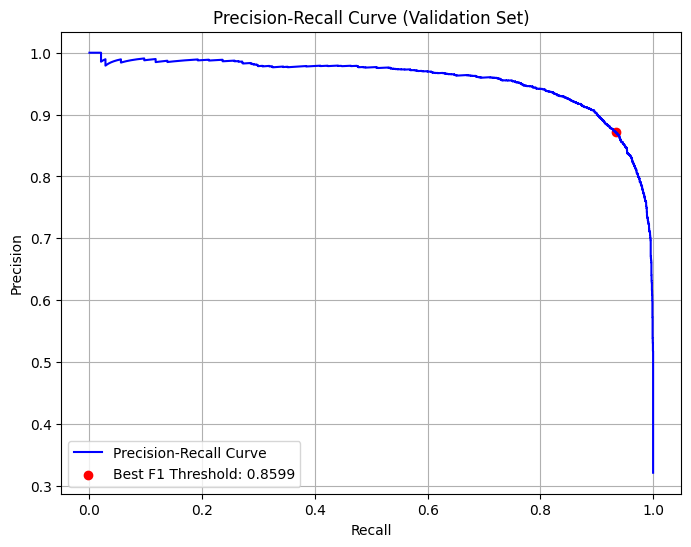


Confusion Matrix:
[[543866  31191]
 [   675   7608]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    575057
           1       0.20      0.92      0.32      8283

    accuracy                           0.95    583340
   macro avg       0.60      0.93      0.65    583340
weighted avg       0.99      0.95      0.96    583340



In [ ]:
# --- 10. Predict xác suất trên Validation Set ---
y_val_probs = best_model.predict_proba(X_val)[:, 1]

# --- 11. Tuning Threshold trên Validation ---
precision, recall, thresholds = precision_recall_curve(y_val, y_val_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Optimal threshold from Validation: {best_threshold:.4f}")

# --- 12. VẼ BIỂU ĐỒ PRECISION-RECALL CURVE ---
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='b')
plt.scatter(recall[np.argmax(f1_scores)], precision[np.argmax(f1_scores)],
            marker='o', color='red', label=f'Best F1 Threshold: {best_threshold:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Validation Set)')
plt.legend()
plt.grid(True)
plt.show()

# --- 13. Predict xác suất trên Test Set (X_test giữ hoàn toàn unseen) ---
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# --- 14. Predict label trên Test Set với threshold đã tìm ---
y_test_pred = (y_test_probs >= best_threshold).astype(int)

# --- 15. Evaluation kết quả trên Test Set ---
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# --- 16. Load lại model khi cần ---
# loaded_model = CatBoostClassifier()
# loaded_model.load_model("/content/drive/MyDrive/Graduation4/best_catboost_model.cbm")


In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 23.1 MB/s eta 0:00:00


In [ ]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, confusion_matrix, classification_report
from catboost import CatBoostClassifier, Pool

# --- 1. Chia tập ---
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    stratify=y_resampled,
    random_state=42
)

# --- 2. Định nghĩa Objective ---
def objective(trial):
    params = {
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "iterations": 300,
        "class_weights": trial.suggest_categorical("class_weights", [[1, 10], [1, 20], [1, 30]]),
        "random_state": 42,
        "verbose": 0,
        "early_stopping_rounds": 30,
        "thread_count": 4,
        "task_type": "GPU",          # --- Thêm chạy GPU ---
        "devices": "0"               # --- Chạy trên GPU số 0 ---
    }
    model = CatBoostClassifier(**params)

    model.fit(
        X_train, y_train,
        eval_set=Pool(X_val, y_val),
        use_best_model=True
    )

    y_val_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred, average='binary')

    return f1

# --- 3. Check có checkpoint không ---
checkpoint_path = "/content/drive/MyDrive/Graduation4/optuna_study.pkl"

if os.path.exists(checkpoint_path):
    print("🔄 Loading existing Optuna study...")
    study = joblib.load(checkpoint_path)
else:
    print("✨ Creating new Optuna study...")
    study = optuna.create_study(direction="maximize")

# --- 4. Define Callback để lưu checkpoint mỗi trial ---
def save_study_callback(study, trial):
    joblib.dump(study, checkpoint_path)

# --- 5. Optuna Optimize ---
study.optimize(objective, n_trials=30, callbacks=[save_study_callback])

# --- 6. Kết quả sau tối ưu ---
print("\n🏆 Best Hyperparameters:")
print(study.best_params)

# --- 7. Train lại model tốt nhất ---
best_params = study.best_params
best_params.update({
    "iterations": 300,
    "random_state": 42,
    "verbose": 0,
    "early_stopping_rounds": 20,
    "thread_count": 4,
    "task_type": "GPU",
    "devices": "0"
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(
    X_train, y_train,
    eval_set=Pool(X_val, y_val),
    use_best_model=True
)

# --- 8. Tối ưu threshold ---
y_val_probs = best_model.predict_proba(X_val)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_val, y_val_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"\n🔍 Optimal threshold (on val set): {best_threshold:.4f}")



🔄 Loading existing Optuna study...


/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 10] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 20] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 30] which is of type list.
  warnings.warn(message)
[I 2025-04-26 16:34:55,430] Trial 30 finished with value: 0.8126505651985917 and parameters: {'depth': 10, 'learning_rate': 0.01033999902217851, 'l2_leaf_reg': 5.760823972214135, 'class_weights': [1, 10]}.


🏆 Best Hyperparameters:
{'depth': 9, 'learning_rate': 0.1625586595768694, 'l2_leaf_reg': 9.937420808399505, 'class_weights': [1, 10]}

🔍 Optimal threshold (on val set): 0.8744



📊 Confusion Matrix on Test:
[[549783  25274]
 [   782   7501]]

📄 Classification Report on Test:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    575057
           1       0.23      0.91      0.37      8283

    accuracy                           0.96    583340
   macro avg       0.61      0.93      0.67    583340
weighted avg       0.99      0.96      0.97    583340


✅ Best model saved at: /content/drive/MyDrive/Graduation4/best_catboost_optuna_gpu.cbm


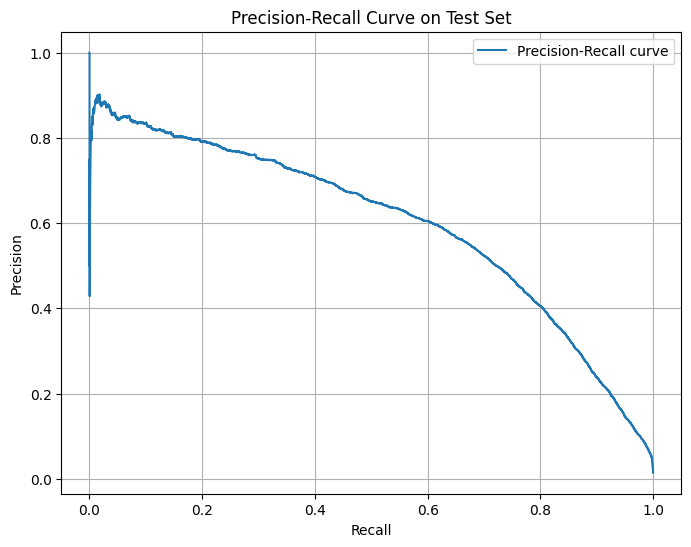

In [ ]:
# --- 9. Predict trên Test ---
y_test_probs = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_probs >= best_threshold).astype(int)

print("\n📊 Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_test_pred))

print("\n📄 Classification Report on Test:")
print(classification_report(y_test, y_test_pred))

# --- 10. Save final model ---
model_path = "/content/drive/MyDrive/Graduation4/best_catboost_optuna_gpu.cbm"
best_model.save_model(model_path)
print(f"\n✅ Best model saved at: {model_path}")

# --- 11. Precision-Recall Curve ---
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_probs)

plt.figure(figsize=(8,6))
plt.plot(recall_test, precision_test, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test Set')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import joblib
import os

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
from sklearn.metrics import f1_score

from catboost import CatBoostClassifier, Pool
import lightgbm as lgb
import xgboost as xgb

import matplotlib.pyplot as plt

# ==== SETUP ====
SEED = 42
N_SPLITS = 5
CHECKPOINT_DIR = "/content/drive/MyDrive/Graduation4/checkpoints_stacking/"
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# Your dataset (assume prepared)
# X_resampled, y_resampled: training set (after SMOTE or whatever preprocessing)
# X_test, y_test: final unseen test set

# ==== BASE MODELS ====
def get_base_models():
    return [
        ('catboost', CatBoostClassifier(
            iterations=300,
            learning_rate=0.1,
            depth=8,
            random_seed=SEED,
            verbose=0,
            task_type="GPU"  # Nếu bạn dùng A100, để tăng tốc
        )),
        ('lgbm', lgb.LGBMClassifier(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=8,
            random_state=SEED,
        )),
        ('xgb', xgb.XGBClassifier(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=8,
            random_state=SEED,
            tree_method="gpu_hist"
        )),
        ('extratrees', ExtraTreesClassifier(
            n_estimators=300,
            max_depth=8,
            random_state=SEED,
            n_jobs=-1
        ))
    ]

# ==== STACKING ====
def train_stacking(X, y, base_models, checkpoint_dir):
    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
    S_train = np.zeros((X.shape[0], len(base_models)))

    for idx, (name, model) in enumerate(base_models):
        fold_idx = 0
        for train_idx, val_idx in skf.split(X, y):
            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
            y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

            model.fit(X_train_fold, y_train_fold)

            # Predict probabilities for class 1
            S_train[val_idx, idx] = model.predict_proba(X_val_fold)[:, 1]

            # Save model per fold (checkpoint)
            joblib.dump(model, f"{checkpoint_dir}{name}_fold{fold_idx}.pkl")
            fold_idx += 1

    return S_train

def predict_stacking(X, base_models, checkpoint_dir):
    S_test = np.zeros((X.shape[0], len(base_models)))

    for idx, (name, model) in enumerate(base_models):
        preds = np.zeros((X.shape[0], N_SPLITS))
        for fold_idx in range(N_SPLITS):
            model_fold = joblib.load(f"{checkpoint_dir}{name}_fold{fold_idx}.pkl")
            preds[:, fold_idx] = model_fold.predict_proba(X)[:, 1]
        S_test[:, idx] = preds.mean(axis=1)
    return S_test

# ==== TRAIN ====
base_models = get_base_models()

print("Training base models and generating stacked features...")
S_train = train_stacking(X_resampled, y_resampled, base_models, CHECKPOINT_DIR)

# Train meta-learner
meta_model = LogisticRegression(random_state=SEED, max_iter=1000)
meta_model.fit(S_train, y_resampled)

# Save meta-learner
joblib.dump(meta_model, f"{CHECKPOINT_DIR}meta_model.pkl")



Training base models and generating stacked features...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1182
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:48:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:48:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:48:04] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.


['/content/drive/MyDrive/Graduation4/checkpoints_stacking/meta_model.pkl']

Predicting on test set...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:49:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:49:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:49:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

Optimal Threshold: 0.9547

📊 Confusion Matrix on Test:
[[572646   2411]
 [  2457   5826]]

📄 Classification Report on Test:
              precision    recall  f1-score   support

           0     0.9957    0.9958    0.9958    575057
           1     0.7073    0.7034    0.7053      8283

    accuracy                         0.9917    583340
   macro avg     0.8515    0.8496    0.8505    583340
weighted avg     0.9916    0.9917    0.9916    583340



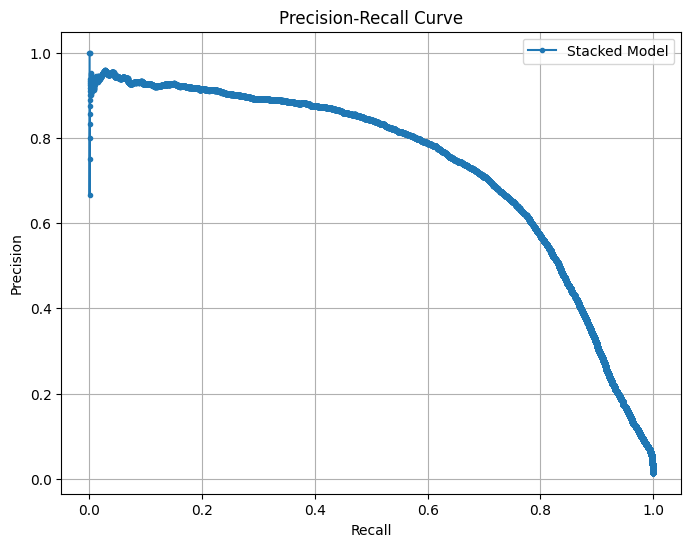

In [ ]:
# ==== PREDICT ====
print("Predicting on test set...")
S_test = predict_stacking(X_test, base_models, CHECKPOINT_DIR)
meta_model = joblib.load(f"{CHECKPOINT_DIR}meta_model.pkl")
y_test_probs = meta_model.predict_proba(S_test)[:, 1]

# ==== TUNE THRESHOLD ====
precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Optimal Threshold: {best_threshold:.4f}")

y_pred_final = (y_test_probs >= best_threshold).astype(int)

# ==== EVALUATION ====
print("\n📊 Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_pred_final))

print("\n📄 Classification Report on Test:")
print(classification_report(y_test, y_pred_final, digits=4))

# ==== PLOT PRECISION-RECALL CURVE ====
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Stacked Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pickle

# Lưu best_threshold vào file .pkl
with open("/content/drive/MyDrive/Graduation4/checkpoints_stacking/best_threshold.pkl", "wb") as f:
    pickle.dump(best_threshold, f)

print(f"Best threshold saved: {best_threshold:.4f}")


Best threshold saved: 0.9547


In [ ]:
# ==== PREDICT ====
print("Predicting on validation set for threshold tuning...")
S_val = predict_stacking(X_val, base_models, CHECKPOINT_DIR)
meta_model = joblib.load(f"{CHECKPOINT_DIR}meta_model.pkl")
y_val_probs = meta_model.predict_proba(S_val)[:, 1]

# ==== TUNE THRESHOLD ====
precision, recall, thresholds = precision_recall_curve(y_val, y_val_probs)  # Tuning trên validation set
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Optimal Threshold: {best_threshold:.4f}")

# ==== PREDICT FINAL ====
print("Predicting on test set with the optimal threshold...")
S_test = predict_stacking(X_test, base_models, CHECKPOINT_DIR)
y_test_probs = meta_model.predict_proba(S_test)[:, 1]
y_pred_final = (y_test_probs >= best_threshold).astype(int)


Predicting on validation set for threshold tuning...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

Optimal Threshold: 0.3568
Predicting on test set with the optimal threshold...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW


📊 Confusion Matrix on Test:
[[554160  20897]
 [   707   7576]]

📄 Classification Report on Test:
              precision    recall  f1-score   support

           0     0.9987    0.9637    0.9809    575057
           1     0.2661    0.9146    0.4122      8283

    accuracy                         0.9630    583340
   macro avg     0.6324    0.9392    0.6966    583340
weighted avg     0.9883    0.9630    0.9728    583340



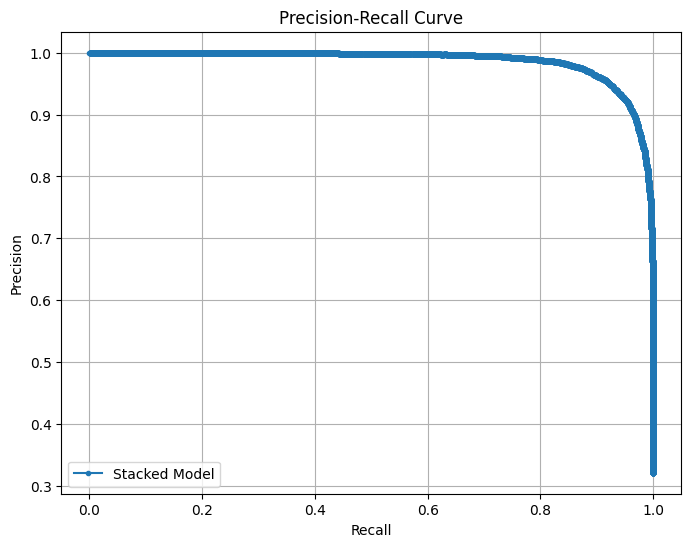

In [ ]:
# ==== EVALUATION ====
print("\n📊 Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_pred_final))

print("\n📄 Classification Report on Test:")
print(classification_report(y_test, y_pred_final, digits=4))

# ==== PLOT PRECISION-RECALL CURVE ====
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Stacked Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pickle

# Lưu best_threshold vào file .pkl
with open("/content/drive/MyDrive/Graduation4/checkpoints_stacking/best_threshold1.pkl", "wb") as f:
    pickle.dump(best_threshold, f)

print(f"Best threshold saved: {best_threshold:.4f}")


Best threshold saved: 0.3568


In [ ]:
X_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv')
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')

In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/Graduation4/X_test_fe.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Graduation4/y_test.csv')

# Ensemble 1

In [ ]:
!pip install optuna



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 25.5 MB/s eta 0:00:00


In [ ]:
# Cài bản CatBoost có hỗ trợ GPU
!pip install --upgrade catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 24.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import optuna
import joblib
import os

from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

# 1. Split X_resampled into train + val
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 2. Define base models
base_models = {
    "catboost": CatBoostClassifier(iterations=500, depth=8, learning_rate=0.05, verbose=0, random_state=42),
    "lgbm": LGBMClassifier(n_estimators=500, max_depth=8, learning_rate=0.05, random_state=42, n_jobs=-1),
    "rf": RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42, n_jobs=-1),
    "xgb": XGBClassifier(n_estimators=500, max_depth=8, learning_rate=0.05, random_state=42, tree_method="hist")
}

# 3. Train base models on X_train
for name, model in base_models.items():
    print(f"Training base model: {name}")
    model.fit(X_train, y_train)

# 4. Get predictions for meta-features
meta_train = []
meta_val = []
meta_test = []

for name, model in base_models.items():
    meta_train.append(model.predict_proba(X_train)[:, 1])  # probability for class 1
    meta_val.append(model.predict_proba(X_val)[:, 1])
    meta_test.append(model.predict_proba(X_test)[:, 1])

meta_train = np.vstack(meta_train).T
meta_val = np.vstack(meta_val).T
meta_test = np.vstack(meta_test).T

# 5. Meta-learner
meta_model = CatBoostClassifier(
    iterations=500,
    depth=4,
    learning_rate=0.03,
    random_state=42,
    verbose=0,
    task_type="GPU" if os.path.exists("/usr/bin/nvidia-smi") else "CPU" # auto GPU
)

# 6. Train meta-learner
print("Training meta-learner...")
meta_model.fit(meta_train, y_train)

# 7. Save models
joblib.dump(base_models, "/content/drive/MyDrive/Graduation4/base_models.pkl")
meta_model.save_model("/content/drive/MyDrive/Graduation4/meta_model.cbm")



Training base model: catboost
Training base model: lgbm
[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training base model: rf


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training base model: xgb
Training meta-learner...


✅ Best threshold from validation tuning: 0.1932

📊 Confusion Matrix on Test:
[[544776  30281]
 [   838   7445]]

📄 Classification Report on Test:
              precision    recall  f1-score   support

           0     0.9985    0.9473    0.9722    575057
           1     0.1973    0.8988    0.3236      8283

    accuracy                         0.9467    583340
   macro avg     0.5979    0.9231    0.6479    583340
weighted avg     0.9871    0.9467    0.9630    583340



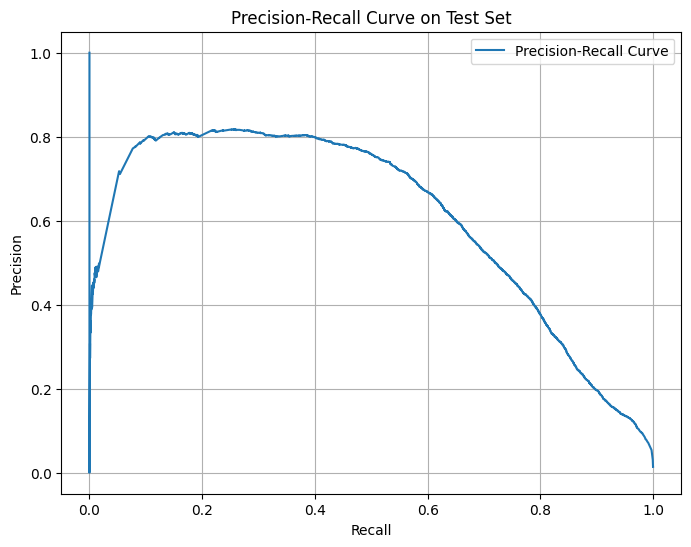

In [ ]:
# 8. Predict on validation set to find best threshold
val_probs = meta_model.predict_proba(meta_val)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, val_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"✅ Best threshold from validation tuning: {best_threshold:.4f}")

# 9. Evaluate on test set
test_probs = meta_model.predict_proba(meta_test)[:, 1]
y_pred_test = (test_probs >= best_threshold).astype(int)

# 10. Report
print("\n📊 Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_pred_test))

print("\n📄 Classification Report on Test:")
print(classification_report(y_test, y_pred_test, digits=4))

# 11. Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
precision_test, recall_test, _ = precision_recall_curve(y_test, test_probs)
plt.plot(recall_test, precision_test, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test Set')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import fbeta_score

# 1. Thử với beta=0.5 để favor precision
beta = 0.5

precision, recall, thresholds = precision_recall_curve(y_val, val_probs)
fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

best_threshold = thresholds[np.argmax(fbeta_scores)]
print(f"✅ Best threshold with F{beta}-score: {best_threshold:.4f}")

# Predict lại trên test set
test_probs = meta_model.predict_proba(meta_test)[:, 1]
y_pred_test = (test_probs >= best_threshold).astype(int)

# Đánh giá lại
print("\n📊 Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_pred_test))

print("\n📄 Classification Report on Test:")
print(classification_report(y_test, y_pred_test, digits=4))


✅ Best threshold with F0.5-score: 0.9084

📊 Confusion Matrix on Test:
[[565958   9099]
 [  1822   6461]]

📄 Classification Report on Test:
              precision    recall  f1-score   support

           0     0.9968    0.9842    0.9904    575057
           1     0.4152    0.7800    0.5420      8283

    accuracy                         0.9813    583340
   macro avg     0.7060    0.8821    0.7662    583340
weighted avg     0.9885    0.9813    0.9841    583340



In [ ]:
import numpy as np
import pandas as pd
import joblib
import json
import time
from sklearn.metrics import (
    precision_recall_curve, roc_auc_score, average_precision_score,
    precision_score, recall_score, fbeta_score
)
from catboost import CatBoostClassifier

# Load models
base_models = joblib.load("/content/drive/MyDrive/Graduation4/base_models.pkl")
meta_model = CatBoostClassifier()
meta_model.load_model("/content/drive/MyDrive/Graduation4/meta_model.cbm")

# 1️⃣ Predict base models + meta model + đo inference time tổng thể
start_time = time.time()

# Base model predictions
meta_X_valid1 = []
for name, model in base_models.items():
    preds = model.predict_proba(X_valid1)[:, 1]
    meta_X_valid1.append(preds)

meta_X_valid1 = np.vstack(meta_X_valid1).T

# Meta model prediction
probs = meta_model.predict_proba(meta_X_valid1)[:, 1]

inference_time = time.time() - start_time

# 2️⃣ Tuning threshold theo F2
precision, recall, thresholds = precision_recall_curve(y_valid1, probs)
f2_scores = (5 * precision * recall) / (4 * precision + recall + 1e-10)  # tránh chia 0
best_idx = np.argmax(f2_scores)
best_threshold = thresholds[best_idx]
best_f2 = f2_scores[best_idx]

# 3️⃣ Các chỉ số khác
pr_auc = average_precision_score(y_valid1, probs)
roc_auc = roc_auc_score(y_valid1, probs)

binary_preds = (probs >= best_threshold).astype(int)
precision_val = precision_score(y_valid1, binary_preds)
recall_val = recall_score(y_valid1, binary_preds)
f1_val = fbeta_score(y_valid1, binary_preds, beta=1)

# 4️⃣ Lưu kết quả đánh giá
results = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision_val,
    "Recall": recall_val,
    "F1_score": f1_val,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/ensemble1_valid1_recall.json", "w") as f:
    json.dump(results, f, indent=4)

# Save threshold mới riêng file
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_f2)}
with open(f"/content/drive/MyDrive/Graduation4/ensemble1_threshold_f2.json", 'w') as f:
    json.dump(threshold_info, f)
print(f"Best threshold with F2-score: {best_threshold:.4f}, F2-score: {best_f2:.4f}")

print("Đã tính xong và lưu kết quả.")


Best threshold with F2-score: 0.9468, F2-score: 0.6642
Đã tính xong và lưu kết quả.


# Ensemble 2

In [ ]:
X_test1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_test1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_test1.csv')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, fbeta_score, classification_report, confusion_matrix
import joblib
import os


# --------- Bước 1: Chuẩn bị dữ liệu ----------
# Giả sử bạn đã có sẵn X_train, X_val, X_test, y_train, y_val, y_test
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

n_folds = 5
SEED = 42

# Base learners
base_models = {
    "catboost": CatBoostClassifier(iterations=300, learning_rate=0.05, depth=8, l2_leaf_reg=5,
                                   random_state=SEED, verbose=0, task_type="CPU"),
    "lightgbm": LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=8,
                               random_state=SEED, n_jobs=-1),
    "xgboost": XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=8,
                             random_state=SEED, n_jobs=-1, verbosity=0),
    "random_forest": RandomForestClassifier(n_estimators=300, max_depth=12,
                                             random_state=SEED, n_jobs=-1)
}

meta_model = LogisticRegression(random_state=SEED, max_iter=1000)

# --------- Bước 2: Training base models + tạo meta-features ----------
def train_base_models(X_train, y_train, X_val, X_test):
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=SEED)

    meta_train = np.zeros((X_train.shape[0], len(base_models)))
    meta_val = np.zeros((X_val.shape[0], len(base_models)))
    meta_test = np.zeros((X_test.shape[0], len(base_models)))

    for idx, (name, model) in enumerate(base_models.items()):
        print(f"Training base model: {name}")
        val_preds = np.zeros(X_val.shape[0])
        test_preds = np.zeros(X_test.shape[0])
        oof_preds = np.zeros(X_train.shape[0])

        for fold_idx, (train_idx, valid_idx) in enumerate(skf.split(X_train, y_train)):
            X_tr, X_fold_val = X_train.iloc[train_idx], X_train.iloc[valid_idx]
            y_tr, y_fold_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

            # Train
            model.fit(X_tr, y_tr)
            oof_preds[valid_idx] = model.predict_proba(X_fold_val)[:, 1]

        # Sau khi train xong 5 fold, fit lại trên full training
        model.fit(X_train, y_train)
        val_preds = model.predict_proba(X_val)[:, 1]
        test_preds = model.predict_proba(X_test)[:, 1]

        # Gán vào meta features
        meta_train[:, idx] = oof_preds
        meta_val[:, idx] = val_preds
        meta_test[:, idx] = test_preds

        # Save model
        joblib.dump(model, f"/content/drive/MyDrive/Graduation4/ModelStackL2/{name}.pkl")

    return meta_train, meta_val, meta_test

# Train level-1 models
meta_X_train, meta_X_val, meta_X_test = train_base_models(X_train, y_train, X_val, X_test)

# --------- Bước 3: Training meta-model ----------
print("Training meta-model...")

meta_model.fit(meta_X_train, y_train)

# Save meta model
joblib.dump(meta_model, "/content/drive/MyDrive/Graduation4/ModelStackL2/meta_model.pkl")



Training base model: catboost
Training base model: lightgbm
[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 66003, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321243 -> initscore=-0.748065
[LightGBM] [Info] Start training from score -0.748065


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 66003, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321243 -> initscore=-0.748065
[LightGBM] [Info] Start training from score -0.748065


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 66003, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321243 -> initscore=-0.748065
[LightGBM] [Info] Start training from score -0.748065


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 66003, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321243 -> initscore=-0.748065
[LightGBM] [Info] Start training from score -0.748065


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 21204, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 66004, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321253 -> initscore=-0.748018
[LightGBM] [Info] Start training from score -0.748018


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056
Training base model: xgboost
Training base model: random_forest


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Training meta-model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['/content/drive/MyDrive/Graduation4/ModelStackL2/meta_model.pkl']

✅ Best threshold with F0.5-score: 0.8417, F0.5-score: 0.9340

📊 Confusion Matrix on Test:
[[567869   7188]
 [  1450   6833]]

📄 Classification Report on Test:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    575057
           1       0.49      0.82      0.61      8283

    accuracy                           0.99    583340
   macro avg       0.74      0.91      0.80    583340
weighted avg       0.99      0.99      0.99    583340



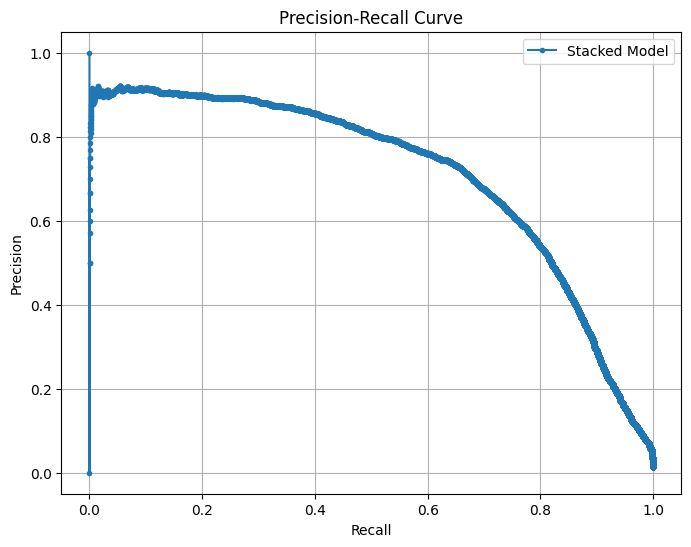

In [ ]:
# --------- Bước 4: Predict trên tập Validation và Test ----------
val_probs = meta_model.predict_proba(meta_X_val)[:, 1]
test_probs = meta_model.predict_proba(meta_X_test)[:, 1]

# --------- Bước 5: Tune Threshold với F0.5 trên Validation ----------
def find_best_threshold(y_true, probs, beta=0.5):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=0.5)

print(f"✅ Best threshold with F0.5-score: {best_threshold:.4f}, F0.5-score: {best_fbeta:.4f}")

# --------- Bước 6: Final Evaluation ----------
y_test_pred = (test_probs >= best_threshold).astype(int)

print("\n📊 Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_test_pred))

print("\n📄 Classification Report on Test:")
print(classification_report(y_test, y_test_pred))

# --------- Bước 7: Vẽ Precision-Recall Curve ----------
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, test_probs)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Stacked Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (precision_recall_curve, average_precision_score,
                             precision_score, recall_score, f1_score, roc_auc_score)
import joblib
import time
import json

# Các base model đã lưu
base_learner_names = ['catboost', 'lightgbm', 'xgboost', 'random_forest']
base_models = {name: joblib.load(f"/content/drive/MyDrive/Graduation4/ModelStackL2/{name}.pkl") for name in base_learner_names}

# Load meta model
meta_model = joblib.load("/content/drive/MyDrive/Graduation4/ModelStackL2/meta_model.pkl")

# Tính meta_X_valid1
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learner_names)))
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    meta_X_valid1[:, idx] = model.predict_proba(X_valid1)[:, 1]

# Predict trên X_val để tune lại threshold với F2
meta_X_val = np.zeros((X_val.shape[0], len(base_learner_names)))
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    meta_X_val[:, idx] = model.predict_proba(X_val)[:, 1]

val_probs = meta_model.predict_proba(meta_X_val)[:, 1]

# Tìm best threshold theo F2
def find_best_threshold(y_true, probs, beta=2.0):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=2.0)

# Save threshold mới riêng file
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"/content/drive/MyDrive/Graduation4/ModelStackL2/threshold_f2.json", 'w') as f:
    json.dump(threshold_info, f)
print(f"Best threshold with F2-score: {best_threshold:.4f}, F2-score: {best_fbeta:.4f}")

# Predict trên X_valid1 với threshold mới
start_time = time.time()
valid1_probs = meta_model.predict_proba(meta_X_valid1)[:, 1]
inference_time = time.time() - start_time

valid1_preds = (valid1_probs >= best_threshold).astype(int)

# Tính các metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# Lưu vào JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/ensemble2_metrics_valid1.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In kết quả preview
print(json.dumps(metrics, indent=4))


Best threshold with F2-score: 0.1320, F2-score: 0.9345
{
    "PR_AUC": 0.7119889557034487,
    "ROC_AUC": 0.987052714777025,
    "Precision": 0.16345354827987368,
    "Recall": 0.9497827136648962,
    "F1_score": 0.27890818858560795,
    "Inference_time_sec": 0.009344339370727539
}


In [ ]:
from sklearn.model_selection import train_test_split

# --------- Bước 1: Chuẩn bị dữ liệu ----------
# Giả sử bạn đã có sẵn X_train, X_val, X_test, y_train, y_val, y_test
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

In [ ]:
X_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_valid1.csv')
y_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_valid1.csv')

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 26.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (precision_recall_curve, average_precision_score,
                             precision_score, recall_score, f1_score, roc_auc_score)
import joblib
import time
import json

# Các base model đã lưu
base_learner_names = ['catboost', 'lightgbm', 'xgboost', 'random_forest']
base_models = {name: joblib.load(f"/content/drive/MyDrive/Graduation4/ModelStackL2/{name}.pkl") for name in base_learner_names}

# Load meta model
meta_model = joblib.load("/content/drive/MyDrive/Graduation4/ModelStackL2/meta_model.pkl")

# Tính meta_X_valid1
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learner_names)))
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    meta_X_valid1[:, idx] = model.predict_proba(X_valid1)[:, 1]

# Predict trên X_val để tune lại threshold với F2
meta_X_val = np.zeros((X_val.shape[0], len(base_learner_names)))
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    meta_X_val[:, idx] = model.predict_proba(X_val)[:, 1]

val_probs = meta_model.predict_proba(meta_X_val)[:, 1]

# Tìm best threshold theo F2
def find_best_threshold(y_true, probs, beta=0.5):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=0.5)

# Save threshold mới riêng file
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"/content/drive/MyDrive/Graduation4/ModelStackL2/threshold_f2.json", 'w') as f:
    json.dump(threshold_info, f)
print(f"Best threshold with F2-score: {best_threshold:.4f}, F2-score: {best_fbeta:.4f}")

# BẮT ĐẦU ĐO TOÀN BỘ INFERENCE TIME (base + meta)
start_time = time.time()

# Predict base models cho X_valid1
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learner_names)))
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    meta_X_valid1[:, idx] = model.predict_proba(X_valid1)[:, 1]

# Predict meta model
valid1_probs = meta_model.predict_proba(meta_X_valid1)[:, 1]

inference_time = time.time() - start_time

# Predict label với threshold đã tune
valid1_preds = (valid1_probs >= best_threshold).astype(int)

# Tính các metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# Lưu vào JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/ensemble2_valid1_precision.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In kết quả preview
print(json.dumps(metrics, indent=4))


Best threshold with F2-score: 0.8417, F2-score: 0.9340
{
    "PR_AUC": 0.7119889557034487,
    "ROC_AUC": 0.987052714777025,
    "Precision": 0.482840733996358,
    "Recall": 0.8322066634476099,
    "F1_score": 0.611116035812428,
    "Inference_time_sec": 3.256910562515259
}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (precision_recall_curve, average_precision_score,
                             precision_score, recall_score, f1_score, roc_auc_score)
import joblib
import time
import json

# Các base model đã lưu
base_learner_names = ['catboost', 'lightgbm', 'xgboost', 'random_forest']
base_models = {name: joblib.load(f"/content/drive/MyDrive/Graduation4/ModelStackL2/{name}.pkl") for name in base_learner_names}

# Load meta model
meta_model = joblib.load("/content/drive/MyDrive/Graduation4/ModelStackL2/meta_model.pkl")

# Load threshold đã tune sẵn từ trước (không tính thời gian)
with open(f"/content/drive/MyDrive/Graduation4/ModelStackL2/threshold_f2.json", 'r') as f:
    threshold_info = json.load(f)
best_threshold = threshold_info['best_threshold']

# BẮT ĐẦU ĐO INFERENCE TIME TRÊN X_valid1
start_time = time.perf_counter()

# Predict base models cho X_valid1
meta_X_valid1 = np.column_stack([
    base_models[name].predict_proba(X_valid1)[:, 1] for name in base_learner_names
])

# Predict meta model
valid1_probs = meta_model.predict_proba(meta_X_valid1)[:, 1]

inference_time = time.perf_counter() - start_time  # chỉ thời gian predict X_valid1

# Predict label với threshold
valid1_preds = (valid1_probs >= best_threshold).astype(int)

# Tính các metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# Lưu metrics vào JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/ensemble2_valid1_precision.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In kết quả
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.7119889557034487,
    "ROC_AUC": 0.987052714777025,
    "Precision": 0.482840733996358,
    "Recall": 0.8322066634476099,
    "F1_score": 0.611116035812428,
    "Inference_time_sec": 3.1055024130000675
}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (confusion_matrix, classification_report)
import joblib
import json

# Các base model đã lưu
base_learner_names = ['catboost', 'lightgbm', 'xgboost', 'random_forest']
base_models = {name: joblib.load(f"/content/drive/MyDrive/Graduation4/ModelStackL2/{name}.pkl") for name in base_learner_names}

# Load meta model
meta_model = joblib.load("/content/drive/MyDrive/Graduation4/ModelStackL2/meta_model.pkl")

# Load threshold đã tune
with open(f"/content/drive/MyDrive/Graduation4/ModelStackL2/threshold_f2.json", 'r') as f:
    threshold_info = json.load(f)
best_threshold = threshold_info['best_threshold']

# Predict base models cho X_test1
meta_X_test1 = np.column_stack([
    base_models[name].predict_proba(X_test1)[:, 1] for name in base_learner_names
])

# Predict meta model
test1_probs = meta_model.predict_proba(meta_X_test1)[:, 1]

# Predict labels với threshold
test1_preds = (test1_probs >= best_threshold).astype(int)

# Tính confusion matrix và classification report
cm = confusion_matrix(y_test1, test1_preds)
report = classification_report(y_test1, test1_preds, output_dict=True)

# In kết quả
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(json.dumps(report, indent=4))

# Optionally: lưu vào JSON nếu muốn
results = {
    "Confusion_Matrix": cm.tolist(),  # convert numpy array sang list để lưu JSON
    "Classification_Report": report
}

with open("/content/drive/MyDrive/Graduation5/results/ensemble2_test1_report.json", 'w') as f:
    json.dump(results, f, indent=4)


Confusion Matrix:
[[284033   3496]
 [   755   3386]]

Classification Report:
{
    "0": {
        "precision": 0.9973489051504979,
        "recall": 0.9878412264502016,
        "f1-score": 0.9925722982193435,
        "support": 287529.0
    },
    "1": {
        "precision": 0.4920081371694275,
        "recall": 0.8176768896401835,
        "f1-score": 0.6143518098521273,
        "support": 4141.0
    },
    "accuracy": 0.9854253094250351,
    "macro avg": {
        "precision": 0.7446785211599627,
        "recall": 0.9027590580451925,
        "f1-score": 0.8034620540357353,
        "support": 291670.0
    },
    "weighted avg": {
        "precision": 0.9901743033052289,
        "recall": 0.9854253094250351,
        "f1-score": 0.9872024931577031,
        "support": 291670.0
    }
}


# Ensemble 3

In [ ]:
!pip install --upgrade scikit-learn joblib

In [ ]:
!pip show joblib

Name: joblib
Version: 1.4.2
Summary: Lightweight pipelining with Python functions
Home-page: https://joblib.readthedocs.io
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: cuml-cu12, hdbscan, imbalanced-learn, librosa, mlxtend, music21, nltk, osqp, pynndescent, scikit-learn


In [ ]:
import os
import numpy as np
import json
import joblib
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix


# Tách tập train và validation từ X_resampled và y_resampled
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# ---------------------- Bước 0: Setup ----------------------
SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline'
os.makedirs(SAVE_DIR, exist_ok=True)

scaler_lr = StandardScaler()

base_learners = {
    'catboost': CatBoostClassifier(iterations=300, depth=8, learning_rate=0.1, random_state=42, verbose=0),
    'lgbm': LGBMClassifier(n_estimators=300, max_depth=8, learning_rate=0.1, random_state=42),
    'rf': RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1),
    'et': ExtraTreesClassifier(n_estimators=300, max_depth=12, random_state=42, n_jobs=-1),
    'mlp': MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42),
    'lr': LogisticRegression(max_iter=300, random_state=42)
}

meta_model = CatBoostClassifier(iterations=500, depth=8, learning_rate=0.05, random_state=42, verbose=0)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# meta_X để lưu out-of-fold predictions
meta_X_train = np.zeros((X_train.shape[0], len(base_learners)))
meta_X_val = np.zeros((X_val.shape[0], len(base_learners)))
meta_X_test = np.zeros((X_test.shape[0], len(base_learners)))

base_models_fitted = {}

# ---------------------- Bước 1: Level 1 - Base Models Training ----------------------
for idx, (name, model) in enumerate(base_learners.items()):
    print(f"🚀 Training base learner: {name}")

    oof_train = np.zeros(X_train.shape[0])
    oof_val = np.zeros(X_val.shape[0])
    oof_test = np.zeros(X_test.shape[0])

    for train_idx, valid_idx in kfold.split(X_train, y_train):
        # Dùng iloc để lấy các chỉ số đúng từ DataFrame hoặc numpy array
        # If X_train is a DataFrame, use .iloc[] to select rows by index
        # Otherwise, assume it's a NumPy array and use [] directly
       # Resetting index of X_train and y_train to be numerical range 0 to n-1 before the split:
        X_tr, X_va = X_train.iloc[train_idx].reset_index(drop=True), X_train.iloc[valid_idx].reset_index(drop=True)
        y_tr, y_va = y_train.iloc[train_idx].reset_index(drop=True), y_train.iloc[valid_idx].reset_index(drop=True)

        # Ravel y_tr and y_va to 1D arrays
        y_tr = y_tr.values.ravel()
        y_va = y_va.values.ravel()

        model_clone = clone(model)

        if name in ['lr', 'mlp']:
            X_tr = scaler_lr.fit_transform(X_tr)
            X_va = scaler_lr.transform(X_va)

        model_clone.fit(X_tr, y_tr)

        if name in ['lr', 'mlp']:
            oof_train[valid_idx] = model_clone.predict_proba(X_va)[:, 1]
            oof_val += model_clone.predict_proba(scaler_lr.transform(X_val))[:, 1] / kfold.n_splits
            oof_test += model_clone.predict_proba(scaler_lr.transform(X_test))[:, 1] / kfold.n_splits
        else:
            oof_train[valid_idx] = model_clone.predict_proba(X_va)[:, 1]
            oof_val += model_clone.predict_proba(X_val)[:, 1] / kfold.n_splits
            oof_test += model_clone.predict_proba(X_test)[:, 1] / kfold.n_splits

    meta_X_train[:, idx] = oof_train
    meta_X_val[:, idx] = oof_val
    meta_X_test[:, idx] = oof_test

    # Save mỗi base model
    joblib.dump(model_clone, f"{SAVE_DIR}/{name}_base_model.pkl")

# Save scaler
joblib.dump(scaler_lr, f"{SAVE_DIR}/scaler_lr.pkl")

print("✅ Base models and scaler saved!")

# ---------------------- Bước 2: Level 2 - Meta Model Training ----------------------
print("🚀 Training Meta Model (CatBoost)")
train_pool = Pool(meta_X_train, y_train)
val_pool = Pool(meta_X_val, y_val)

meta_model.fit(train_pool, eval_set=val_pool)

# Save meta model
meta_model.save_model(f"{SAVE_DIR}/meta_model.cbm")

print("✅ Meta model saved!")

🚀 Training base learner: catboost
🚀 Training base learner: lgbm
[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 66003, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321243 -> initscore=-0.748065
[LightGBM] [Info] Start training from score -0.748065
[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the t

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


🚀 Training base learner: lr
✅ Base models and scaler saved!
🚀 Training Meta Model (CatBoost)
✅ Meta model saved!


✅ Best threshold selected: 0.7928 with F0.5: 0.9386

📊 Confusion Matrix on Test:
[[568423   6634]
 [  1457   6826]]

📄 Classification Report on Test:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    575057
           1       0.51      0.82      0.63      8283

    accuracy                           0.99    583340
   macro avg       0.75      0.91      0.81    583340
weighted avg       0.99      0.99      0.99    583340



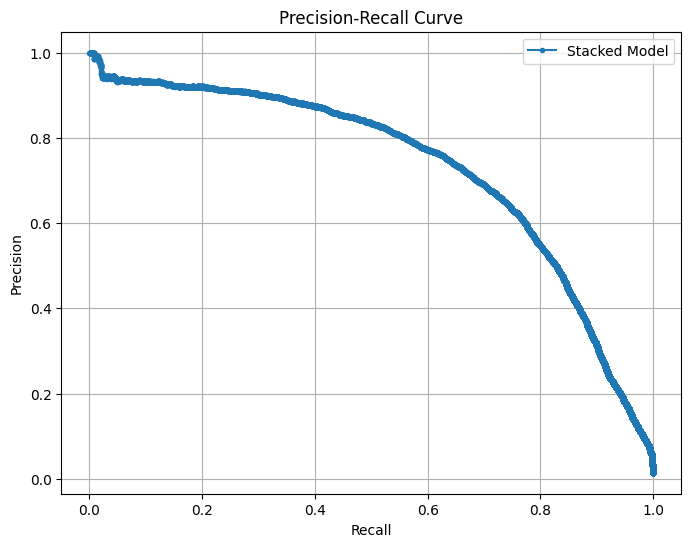

In [ ]:
# ---------------------- Bước 3: Threshold Tuning ----------------------
def find_best_threshold(y_true, probs, beta=0.5):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

val_probs = meta_model.predict_proba(meta_X_val)[:, 1]
test_probs = meta_model.predict_proba(meta_X_test)[:, 1]

best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=0.5)

# Save threshold
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"{SAVE_DIR}/threshold.json", 'w') as f:
    json.dump(threshold_info, f)

print(f"✅ Best threshold selected: {best_threshold:.4f} with F0.5: {best_fbeta:.4f}")

# ---------------------- Bước 4: Evaluation ----------------------
y_test_pred = (test_probs >= best_threshold).astype(int)

print("\n📊 Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_test_pred))

print("\n📄 Classification Report on Test:")
print(classification_report(y_test, y_test_pred))

# Vẽ Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, test_probs)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Stacked Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()


🎯 AUC-ROC on Test Set: 0.9883


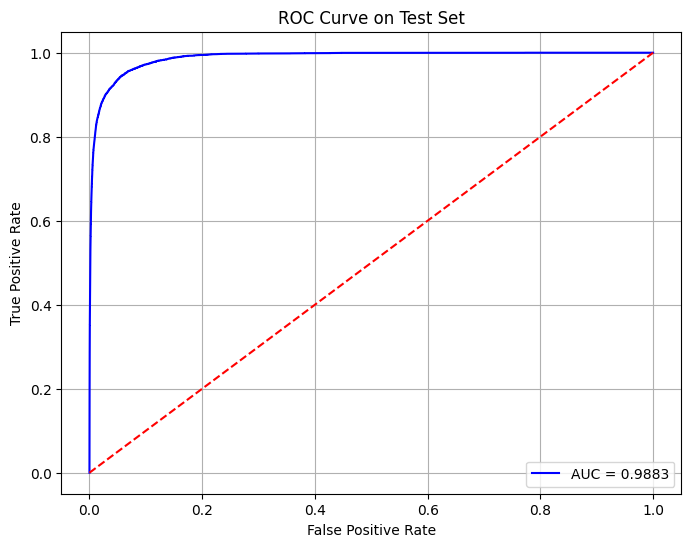

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ---------------------------------------
# Tính AUC-ROC score trên tập Test
auc_score = roc_auc_score(y_test, test_probs)
print(f"🎯 AUC-ROC on Test Set: {auc_score:.4f}")

# ---------------------------------------
# Vẽ đường ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, test_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Đường ngẫu nhiên
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
X_resampled.shape

(103130, 9)

In [ ]:
X_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv')
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')

In [ ]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 25.7 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import json
import joblib
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix


# Tách tập train và validation từ X_resampled và y_resampled
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

In [ ]:
import joblib
import numpy as np

# Directory chứa các model và scaler đã lưu
SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline'

# Load scaler cho lr và mlp
scaler_lr = joblib.load(f"{SAVE_DIR}/scaler_lr.pkl")

# Danh sách base learner names đúng thứ tự như khi train
base_learner_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp', 'lr']

# Khởi tạo meta_X_val mới
meta_X_val = np.zeros((X_val.shape[0], len(base_learner_names)))

# Duyệt qua từng base model và tính predict_proba
for idx, name in enumerate(base_learner_names):
    print(f"Loading base model: {name}")
    model = joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl")

    # Nếu là lr hoặc mlp thì scale X_val trước khi predict
    if name in ['lr', 'mlp']:
        X_val_transformed = scaler_lr.transform(X_val)
    else:
        X_val_transformed = X_val

    # Predict proba cho class 1
    meta_X_val[:, idx] = model.predict_proba(X_val_transformed)[:, 1]

print("meta_X_val rebuilt!")


Loading base model: catboost
Loading base model: lgbm
Loading base model: rf
Loading base model: et
Loading base model: mlp
Loading base model: lr
meta_X_val rebuilt!


In [ ]:
# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Predict lại xác suất từ meta model
val_probs = meta_model.predict_proba(meta_X_val)[:, 1]

# Hàm tìm threshold tối ưu theo f-beta
def find_best_threshold(y_true, probs, beta=2):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

# Tính threshold mới với beta=2
best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=2)

# Save threshold mới riêng file
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"{SAVE_DIR}/threshold_f2.json", 'w') as f:
    json.dump(threshold_info, f)

print(f"✅ Threshold với F2-score: {best_threshold:.4f} (F2 = {best_fbeta:.4f})")


✅ Threshold với F2-score: 0.2142 (F2 = 0.9394)


In [ ]:
X_test1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_test1.csv')
X_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_valid1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_test1.csv')
y_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_valid1.csv')

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import numpy as np
import json

# Load scaler
scaler_lr = joblib.load(f"{SAVE_DIR}/scaler_lr.pkl")

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Load threshold (hoặc tính lại nếu muốn)
with open(f"{SAVE_DIR}/threshold.json", 'r') as f:
    threshold_info = json.load(f)
best_threshold = threshold_info['best_threshold']

# Load base models
base_learner_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp', 'lr']
base_models = {name: joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl") for name in base_learner_names}

# Tính meta_X_valid1
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learner_names)))
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    if name in ['lr', 'mlp']:
        X_valid1_transformed = scaler_lr.transform(X_valid1)
    else:
        X_valid1_transformed = X_valid1
    meta_X_valid1[:, idx] = model.predict_proba(X_valid1_transformed)[:, 1]

# Predict proba với meta model
valid1_probs = meta_model.predict_proba(meta_X_valid1)[:, 1]

# Nếu muốn tune lại threshold với beta=2 trên X_valid1:
best_threshold, best_fbeta = find_best_threshold(y_valid1, valid1_probs, beta=2)
print(f"Best threshold (beta=2): {best_threshold:.4f}, F2-score: {best_fbeta:.4f}")

# Phân loại theo threshold mới
valid1_preds = (valid1_probs >= best_threshold).astype(int)

# Tính confusion matrix và classification report
cm = confusion_matrix(y_valid1, valid1_preds)
report = classification_report(y_valid1, valid1_preds, digits=4)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


Best threshold (beta=2): 0.8212, F2-score: 0.7338
Confusion Matrix:
[[284403   3125]
 [   755   3387]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9974    0.9891    0.9932    287528
           1     0.5201    0.8177    0.6358      4142

    accuracy                         0.9867    291670
   macro avg     0.7587    0.9034    0.8145    291670
weighted avg     0.9906    0.9867    0.9881    291670



In [ ]:
import numpy as np
import joblib
import json
import time
from sklearn.metrics import (precision_recall_curve, average_precision_score,
                             precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, classification_report)
from catboost import CatBoostClassifier

# Directory chứa model và scaler đã lưu
SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline'

# Load scaler
scaler_lr = joblib.load(f"{SAVE_DIR}/scaler_lr.pkl")

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Load threshold
with open(f"{SAVE_DIR}/threshold.json", 'r') as f:
    best_threshold = json.load(f)['best_threshold']

# Load base models
base_learner_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp', 'lr']
base_models = {name: joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl") for name in base_learner_names}

# Khởi tạo meta_X_valid1
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learner_names)))

# Đo inference time toàn bộ pipeline
start_time = time.time()

for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    X_valid1_transformed = scaler_lr.transform(X_valid1) if name in ['lr', 'mlp'] else X_valid1
    meta_X_valid1[:, idx] = model.predict_proba(X_valid1_transformed)[:, 1]

# Predict proba với meta model
valid1_probs = meta_model.predict_proba(meta_X_valid1)[:, 1]

inference_time = time.time() - start_time  # Tổng thời gian

# Predict với threshold đã lưu
valid1_preds = (valid1_probs >= best_threshold).astype(int)

# Tính metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# Lưu kết quả metrics vào file JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open(f"/content/drive/MyDrive/Graduation5/results/ensemble3_valid1_recall.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In kết quả
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.7186810651465947,
    "ROC_AUC": 0.9880788495936342,
    "Precision": 0.49430753710909353,
    "Recall": 0.82810236600676,
    "F1_score": 0.6190777005685407,
    "Inference_time_sec": 4.404948949813843
}


In [ ]:
import numpy as np
import joblib
import json
import time
from sklearn.metrics import (precision_recall_curve, average_precision_score,
                             precision_score, recall_score, f1_score, roc_auc_score)
from catboost import CatBoostClassifier
from joblib import Parallel, delayed

# Directory chứa model và scaler đã lưu
SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline'

# Load scaler
scaler_lr = joblib.load(f"{SAVE_DIR}/scaler_lr.pkl")

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Load threshold
with open(f"{SAVE_DIR}/threshold.json", 'r') as f:
    best_threshold = json.load(f)['best_threshold']

# Load base models
base_learner_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp', 'lr']
base_models = {name: joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl") for name in base_learner_names}

# Chuẩn bị dữ liệu
X_valid1_scaled = scaler_lr.transform(X_valid1)  # Chỉ cần transform 1 lần cho lr & mlp
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learner_names)))

# Đo inference time chính xác bằng perf_counter
start_time = time.perf_counter()

# Predict base models
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    X_input = X_valid1_scaled if name in ['lr', 'mlp'] else X_valid1
    meta_X_valid1[:, idx] = model.predict_proba(X_input)[:, 1]

# Predict meta model
valid1_probs = meta_model.predict_proba(meta_X_valid1)[:, 1]

inference_time = time.perf_counter() - start_time  # Tổng thời gian chính xác

# Predict với threshold đã lưu
valid1_preds = (valid1_probs >= best_threshold).astype(int)

# Tính metrics
metrics = {
    "PR_AUC": average_precision_score(y_valid1, valid1_probs),
    "ROC_AUC": roc_auc_score(y_valid1, valid1_probs),
    "Precision": precision_score(y_valid1, valid1_preds),
    "Recall": recall_score(y_valid1, valid1_preds),
    "F1_score": f1_score(y_valid1, valid1_preds),
    "Inference_time_sec": inference_time
}

# Lưu kết quả
with open(f"/content/drive/MyDrive/Graduation5/results/ensemble3_valid1_recall.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In kết quả
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.7186810651465947,
    "ROC_AUC": 0.9880788495936342,
    "Precision": 0.49430753710909353,
    "Recall": 0.82810236600676,
    "F1_score": 0.6190777005685407,
    "Inference_time_sec": 4.635112369999661
}


# Load lại mô hình

RandomForest

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best F1-score (macro): 0.9266
Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Cross-Validation Metrics:
f1_macro: 0.9266
precision_macro: 0.9248
recall_macro: 0.9285
accuracy: 0.9357


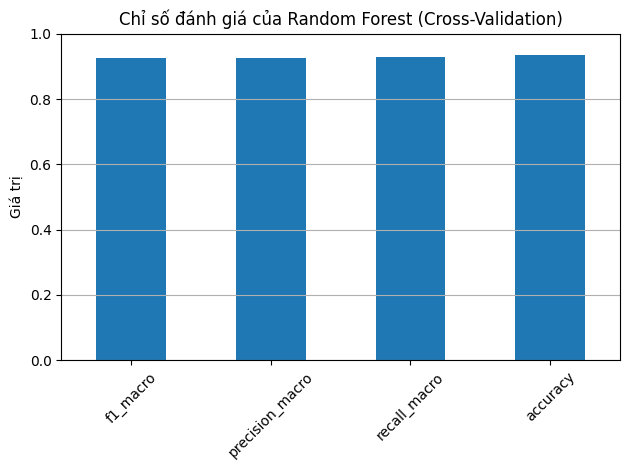

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, f1_score
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Định nghĩa mô hình và siêu tham số
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 2. Scorer F1 macro
f1_scorer = make_scorer(f1_score, average='macro')

# 3. Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring=f1_scorer, cv=cv, n_jobs=-1, verbose=2)

# 5. Train
grid_search.fit(X_resampled, y_resampled)

# 6. Lưu mô hình tốt nhất và tham số tốt nhất
best_rf_model = grid_search.best_estimator_
joblib.dump(best_rf_model, '/content/drive/MyDrive/Graduation5/best_random_forest_model.pkl')
best_rf_params = grid_search.best_params_
import json

# Lưu tham số tốt nhất
with open('/content/drive/MyDrive/Graduation5/best_random_forest_params.json', 'w') as f:
    json.dump(best_rf_params, f)

print("Best F1-score (macro): {:.4f}".format(grid_search.best_score_))
print("Best params:", best_rf_params)

# 7. Đánh giá đa chỉ số bằng cross-validation với mô hình tốt nhất
scoring = {
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'accuracy': 'accuracy'
}

cv_results = cross_validate(best_rf_model, X_resampled, y_resampled,
                            cv=cv, scoring=scoring, n_jobs=-1)

# 8. Hiển thị kết quả trung bình
metrics_summary = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring.keys()}
print("\nCross-Validation Metrics:")
for metric, score in metrics_summary.items():
    print(f"{metric}: {score:.4f}")

# 9. Vẽ biểu đồ các chỉ số
results_df = pd.DataFrame([metrics_summary])
results_df.index = ['Random Forest']

results_df.T.plot(kind='bar', legend=False)
plt.title('Chỉ số đánh giá của Random Forest (Cross-Validation)')
plt.ylabel('Giá trị')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import json

# Copy y nguyên bộ tham số từ màn hình vào đây
best_xgb_params = {
    'colsample_bytree': 1.0,
    'gamma': 0,
    'learning_rate': 0.1,
    'max_depth': 8,
    'min_child_weight': 1,
    'n_estimators': 200,
    'scale_pos_weight': 1,
    'subsample': 0.9
}

# Lưu vào file JSON
with open('/content/drive/MyDrive/Graduation5/tuned_xgboost_params.json', 'w') as f:
    json.dump(best_xgb_params, f)

print("✅ Tham số tốt nhất đã được lưu vào '/content/drive/MyDrive/Graduation5/tuned_xgboost_params.json'")


✅ Tham số tốt nhất đã được lưu vào '/content/drive/MyDrive/Graduation5/tuned_xgboost_params.json'


In [ ]:
import joblib
import json

# Đường dẫn tới mô hình đã lưu
model_path = '/content/drive/MyDrive/Graduation4/lightgbm_model.pkl'

# Load mô hình đã lưu
model = joblib.load(model_path)

# Lấy các tham số của mô hình
model_params = model.get_params()

# Đường dẫn lưu file JSON
output_json_path = '/content/drive/MyDrive/Graduation5/lightgbm_params.json'

# Lưu các tham số vào file JSON
with open(output_json_path, 'w') as json_file:
    json.dump(model_params, json_file, indent=4)

print(f"Tham số của mô hình đã được lưu vào: {output_json_path}")


Tham số của mô hình đã được lưu vào: /content/drive/MyDrive/Graduation5/lightgbm_params.json


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 25.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
import json

# Đường dẫn tới mô hình CatBoost đã lưu
model_path = '/content/drive/MyDrive/Graduation4/best_catboost_optuna_gpu.cbm'

# Load mô hình CatBoost từ file
model = CatBoostClassifier()
model.load_model(model_path)

# Lấy các tham số của mô hình
model_params = model.get_params()

# Đường dẫn lưu file JSON
output_json_path = '/content/drive/MyDrive/Graduation5/optuna_catboost_params.json'

# Lưu các tham số vào file JSON
with open(output_json_path, 'w') as json_file:
    json.dump(model_params, json_file, indent=4)

print(f"Tham số của mô hình đã được lưu vào: {output_json_path}")


Tham số của mô hình đã được lưu vào: /content/drive/MyDrive/Graduation5/optuna_catboost_params.json


In [ ]:
import joblib
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import json
import os

# Đường dẫn tới các mô hình đã lưu
base_models_path = "/content/drive/MyDrive/Graduation4/base_models.pkl"
meta_model_path = "/content/drive/MyDrive/Graduation4/meta_model.cbm"

# Tải các mô hình base (ensemble models) từ file pkl
base_models = joblib.load(base_models_path)

# Tải mô hình meta (meta model) từ file cbm
meta_model = CatBoostClassifier()
meta_model.load_model(meta_model_path)

# Lấy các tham số của mô hình base
base_models_params = {name: model.get_params() for name, model in base_models.items()}

# Lấy các tham số của mô hình meta
meta_model_params = meta_model.get_params()

# Tạo một dictionary để lưu các tham số
models_params = {
    "base_models": base_models_params,
    "meta_model": meta_model_params
}

# Đường dẫn lưu file JSON
output_json_path = "/content/drive/MyDrive/Graduation5/ensemble_models_params_1.json"

# Lưu các tham số vào file JSON
with open(output_json_path, 'w') as json_file:
    json.dump(models_params, json_file, indent=4)

print(f"Tham số của các mô hình đã được lưu vào: {output_json_path}")


Tham số của các mô hình đã được lưu vào: /content/drive/MyDrive/Graduation5/ensemble_models_params_1.json


In [ ]:
import joblib
import json
import os

# Thư mục lưu model
model_dir = "/content/drive/MyDrive/Graduation4/ModelStackL2/"

# Danh sách các model đã lưu
model_names = ["catboost", "lightgbm", "xgboost", "random_forest", "meta_model"]

# Tạo dict lưu tham số các model
model_params = {}

# Load từng model và lấy tham số
for name in model_names:
    model_path = os.path.join(model_dir, f"{name}.pkl")
    model = joblib.load(model_path)

    # CatBoost có get_all_params(), các model scikit-learn dùng get_params()
    if name == "catboost":
        params = model.get_all_params()
    else:
        params = model.get_params()

    model_params[name] = params

# Lưu tham số vào file JSON
output_path = "/content/drive/MyDrive/Graduation5/ensemble_model_params_2.json"
with open(output_path, "w") as json_file:
    json.dump(model_params, json_file, indent=4)

print(f"✅ Đã lưu tham số các model vào {output_path}")


✅ Đã lưu tham số các model vào /content/drive/MyDrive/Graduation5/ensemble_model_params_2.json


In [ ]:
import joblib
import json
import os
from catboost import CatBoostClassifier

# Đường dẫn thư mục lưu model đã train
SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline'
OUTPUT_DIR = '/content/drive/MyDrive/Graduation5'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Danh sách tên base learners và meta model
base_model_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp', 'lr']

# Tạo dict lưu tham số các model
model_params = {}

# Load các base model
for name in base_model_names:
    model_path = os.path.join(SAVE_DIR, f"{name}_base_model.pkl")
    model = joblib.load(model_path)
    params = model.get_params()
    model_params[f"{name}_base_model"] = params

# Load scaler
scaler_path = os.path.join(SAVE_DIR, "scaler_lr.pkl")
scaler = joblib.load(scaler_path)
scaler_params = scaler.get_params()
model_params["scaler_lr"] = scaler_params

# Load meta model (CatBoost)
meta_model_path = os.path.join(SAVE_DIR, "meta_model.cbm")
meta_model = CatBoostClassifier()
meta_model.load_model(meta_model_path)
meta_params = meta_model.get_all_params()
model_params["meta_model"] = meta_params

# Lưu vào file JSON
output_path = os.path.join(OUTPUT_DIR, "ensemble_fullpipeline_params.json")
with open(output_path, "w") as json_file:
    json.dump(model_params, json_file, indent=4)

print(f"✅ Đã lưu tham số tất cả models và scaler vào {output_path}")


✅ Đã lưu tham số tất cả models và scaler vào /content/drive/MyDrive/Graduation5/ensemble_fullpipeline_params.json


In [ ]:
# Đọc và hiển thị vài dòng đầu tiên của file JSON
with open(output_path, "r") as json_file:
    params_data = json.load(json_file)

# In thử 3 model đầu tiên và scaler
for key in list(params_data.keys())[:4]:  # lấy 4 phần tử đầu (3 models + scaler)
    print(f"\n🔸 {key}:")
    for param_name, param_value in list(params_data[key].items())[:5]:  # in 5 tham số đầu tiên mỗi model
        print(f"  - {param_name}: {param_value}")



🔸 catboost_base_model:
  - iterations: 300
  - learning_rate: 0.1
  - depth: 8
  - verbose: 0
  - random_state: 42

🔸 lgbm_base_model:
  - boosting_type: gbdt
  - class_weight: None
  - colsample_bytree: 1.0
  - importance_type: split
  - learning_rate: 0.1

🔸 rf_base_model:
  - bootstrap: True
  - ccp_alpha: 0.0
  - class_weight: None
  - criterion: gini
  - max_depth: 10

🔸 et_base_model:
  - bootstrap: False
  - ccp_alpha: 0.0
  - class_weight: None
  - criterion: gini
  - max_depth: 12


In [ ]:
print("\n🔸 scaler_lr:")
for param_name, param_value in params_data["scaler_lr"].items():
    print(f"  - {param_name}: {param_value}")



🔸 scaler_lr:
  - copy: True
  - with_mean: True
  - with_std: True


# Đánh giá mô hình

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 25.0 MB/s eta 0:00:00


In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def load_params(path):
    with open(path, 'r') as f:
        return json.load(f)


In [ ]:
dt_params = load_params('/content/drive/MyDrive/Graduation5/best_decision_tree_params.json')
dt_model = DecisionTreeClassifier(**dt_params, random_state=42)


In [ ]:
del dt_model

In [ ]:
rf_params = load_params('/content/drive/MyDrive/Graduation5/best_random_forest_params.json')
xgb_params = load_params('/content/drive/MyDrive/Graduation5/tuned_xgboost_params.json')
lgb_params = load_params('/content/drive/MyDrive/Graduation5/lightgbm_params.json')
cat_params = load_params('/content/drive/MyDrive/Graduation5/catboost_params.json')
optuna_cat_params = load_params('/content/drive/MyDrive/Graduation5/optuna_catboost_params.json')

In [ ]:
model_dt = DecisionTreeClassifier(**dt_params)
model_rf = RandomForestClassifier(**rf_params)
model_xgb = XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='mlogloss')
model_lgb = LGBMClassifier(**lgb_params)
model_cat = CatBoostClassifier(**cat_params)
model_optuna_cat = CatBoostClassifier(**optuna_cat_params)


In [ ]:
def build_ensemble1(param_path):
    import json
    import numpy as np
    from sklearn.ensemble import RandomForestClassifier
    from lightgbm import LGBMClassifier
    from xgboost import XGBClassifier
    from catboost import CatBoostClassifier
    from catboost import Pool
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import StackingClassifier

    # Đọc file JSON để lấy tham số
    with open(param_path, 'r') as f:
        params = json.load(f)

    # Hàm làm sạch tham số, loại bỏ các giá trị None hoặc NaN
    def clean_params(p):
        return {k: v for k, v in p.items() if v is not None and not (isinstance(v, float) and np.isnan(v))}

    # Tham số cho các base models
    base_models = [
        ('catboost', CatBoostClassifier(**clean_params(params['base_models']['catboost']))),
        ('lgbm', LGBMClassifier(**clean_params(params['base_models']['lgbm']))),
        ('rf', RandomForestClassifier(**clean_params(params['base_models']['rf']))),
        ('xgb', XGBClassifier(**clean_params(params['base_models']['xgb'])))
    ]

    # Tham số cho meta model
    meta_model = CatBoostClassifier(**clean_params(params['meta_model']))

    # Tạo StackingClassifier với các base models và meta model
    ensemble = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=False,
        cv=5,
        n_jobs=-1
    )

    return ensemble


In [ ]:
def build_ensemble2(param_path):
    import json
    import numpy as np
    from sklearn.ensemble import RandomForestClassifier
    from lightgbm import LGBMClassifier
    from xgboost import XGBClassifier
    from catboost import CatBoostClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import StackingClassifier

    # Đọc file JSON để lấy tham số
    with open(param_path, 'r') as f:
        params = json.load(f)

    # Hàm làm sạch tham số, loại bỏ các giá trị None hoặc NaN và các tham số không hợp lệ
    def clean_params(p):
        p = {k: v for k, v in p.items() if v is not None and not (isinstance(v, float) and np.isnan(v))}
        # Loại bỏ các tham số không hợp lệ với CatBoost
        invalid_params = [
            'bayesian_matrix_reg', 'force_unit_auto_pair_weights', 'pool_metainfo_options'
        ]
        for param in invalid_params:
            if param in p:
                del p[param]
        return p

    # Tham số cho các base models
    base_models = [
        ('catboost', CatBoostClassifier(**clean_params(params['catboost']))),
        ('lgbm', LGBMClassifier(**clean_params(params['lightgbm']))),
        ('rf', RandomForestClassifier(**clean_params(params['random_forest']))),
        ('xgb', XGBClassifier(**clean_params(params['xgboost'])))
    ]

    # Tham số cho meta model
    meta_model = LogisticRegression(**clean_params(params['meta_model']))

    # Tạo StackingClassifier với các base models và meta model
    ensemble = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=False,
        cv=5,
        n_jobs=-1
    )

    return ensemble


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def build_ensemble3(param_path):
    import json
    import numpy as np
    from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from lightgbm import LGBMClassifier
    from catboost import CatBoostClassifier

    # === Load params ===
    with open(param_path, 'r') as f:
        params = json.load(f)

    # === Helpers ===
    def clean_params(p):
        return {k: v for k, v in p.items() if v is not None and not (isinstance(v, float) and np.isnan(v))}

    def clean_catboost_params(p):
        invalid_keys = {
            'bayesian_matrix_reg', 'pool_metainfo_options', 'class_names',
            'posterior_sampling', 'best_model_min_trees', 'model_size_reg',
            'model_shrink_rate', 'score_function', 'force_unit_auto_pair_weights',
            'classes_count', 'sparse_features_conflict_fraction', 'eval_fraction',
            'max_leaves', 'penalties_coefficient'
        }
        return {k: v for k, v in p.items() if k not in invalid_keys}

    # === Base models ===
    base_models = [
        ('cat', CatBoostClassifier(**clean_params(params['catboost_base_model']))),
        ('lgb', LGBMClassifier(**clean_params(params['lgbm_base_model']))),
        ('rf', RandomForestClassifier(**clean_params(params['rf_base_model']))),
        ('et', ExtraTreesClassifier(**clean_params(params['et_base_model']))),
        ('mlp', MLPClassifier(**clean_params(params['mlp_base_model']))),
        ('lr', Pipeline([
            ('scaler', StandardScaler(**params['scaler_lr'])),
            ('clf', LogisticRegression(**clean_params(params['lr_base_model'])))
        ]))
    ]

    # === Meta-model ===
    meta_model = CatBoostClassifier(**clean_catboost_params(params['meta_model']))

    # === Ensemble (StackingClassifier) ===
    ensemble = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=False,  # hoặc True nếu bạn muốn đưa cả X gốc vào meta
        cv=5,                # số fold trong quá trình training meta-model
        n_jobs=-1
    )

    return ensemble


In [ ]:
model_dt = DecisionTreeClassifier(**dt_params)
model_rf = RandomForestClassifier(**rf_params)
model_xgb = XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='mlogloss')
model_lgb = LGBMClassifier(**lgb_params)
model_cat = CatBoostClassifier(**cat_params)
model_optuna_cat = CatBoostClassifier(**optuna_cat_params)

In [ ]:
models = {
    'DecisionTree': model_dt,
    'RandomForest': model_rf,
    'XGBoost': model_xgb,
    'LightGBM': model_lgb,
    'CatBoost': model_cat,
    'CatBoostOptuna':model_optuna_cat,
    'Ensemble1': build_ensemble1('/content/drive/MyDrive/Graduation5/ensemble_models_params_1.json'),
    'Ensemble2': build_ensemble2('/content/drive/MyDrive/Graduation5/ensemble_model_params_2.json'),
    'Ensemble3': build_ensemble3('/content/drive/MyDrive/Graduation5/ensemble_fullpipeline_params.json')
}


In [ ]:
X_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv')
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')

In [ ]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'neg_log_loss']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
import json

# Ví dụ cho một model
def evaluate_model(name, model, X, y, cv, scoring):
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)
    result = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring}
    with open(f'/content/drive/MyDrive/Graduation5/results/{name}_cv_results.json', 'w') as f:
        json.dump(result, f)
    print(f"Done: {name}")

# Gọi từng model mà bạn cần (tuỳ lúc nào rảnh thì chạy tiếp)
evaluate_model('DecisionTree', model_dt, X_resampled, y_resampled, cv, scoring)


Done: DecisionTree


In [ ]:
evaluate_model('RandomForest', model_rf, X_resampled, y_resampled, cv, scoring)

Done: RandomForest


In [ ]:
evaluate_model('XGBoost', model_xgb, X_resampled, y_resampled, cv, scoring)

Done: XGBoost


In [ ]:
model_lgb = LGBMClassifier(
    boosting_type='gbdt',
    class_weight=None,
    colsample_bytree=0.8,
    importance_type='split',
    learning_rate=0.05,  # giữ nguyên hoặc thử 0.1
    max_depth=7,
    min_child_samples=20,
    min_child_weight=0.001,
    min_split_gain=0.0,
    n_estimators=2000,  # thử giảm số cây
    n_jobs=1,  # thử giảm n_jobs để tránh treo
    num_leaves=31,  # giảm số lá để tăng tốc
    objective='binary',
    random_state=42,
    reg_alpha=0.0,
    reg_lambda=0.0,
    subsample=0.8,
    subsample_for_bin=200000,
    subsample_freq=0
)


In [ ]:
evaluate_model('LightGBM', model_lgb, X_resampled, y_resampled, cv, scoring)

Done: LightGBM


In [ ]:
print(model_optuna_cat.get_params())


{'iterations': 300, 'learning_rate': 0.1625586596, 'depth': 9, 'l2_leaf_reg': 9.937420808, 'loss_function': 'Logloss', 'od_wait': 20, 'thread_count': 4, 'random_seed': 42, 'use_best_model': True, 'verbose': 0, 'class_weights': [1, 10], 'task_type': 'GPU', 'devices': '0'}


In [ ]:
!pip install --upgrade catboost
!pip install --upgrade scikit-learn


In [ ]:
model_cat.set_params(task_type='CPU')


In [ ]:
evaluate_model('CatBoost', model_cat, X_resampled, y_resampled, cv, scoring)

Done: CatBoost


Với cross-validation với catboost bên trên, phải đổi task type về cpu; vì dùng gpu có vẻ bị xung đột tài nguyên, không chạy được

In [ ]:
def evaluate_model(name, model, X, y, cv, scoring):
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)
    result = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring}
    with open(f'/content/drive/MyDrive/Graduation5/results/{name}_cv_results.json', 'w') as f:
        json.dump(result, f)
    print(f"Done: {name}")

In [ ]:
# Inside your evaluate_model function
def evaluate_model1(name, model, X, y, cv, scoring):
    # ... other code ...

    # 🎯 Modified cross_validate call:
    scores = cross_validate(
        model, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False,
        fit_params={'eval_set': [(X, y)]}  # 👈 Add this to pass eval_set to CatBoost
    )

    result = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring}
    with open(f'/content/drive/MyDrive/Graduation5/results/{name}_cv_results.json', 'w') as f:
        json.dump(result, f)
    print(f"Done: {name}")

In [ ]:
model_optuna_cat.set_params(task_type='CPU')

In [ ]:
model_optuna_cat.set_params(use_best_model=False)


In [ ]:
evaluate_model('CatBoostOptuna', model_optuna_cat, X_resampled, y_resampled, cv, scoring)

Done: CatBoostOptuna


In [ ]:
def evaluate_model1(name, model, X, y, cv, scoring):
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=1, return_train_score=False)
    result = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring}
    with open(f'/content/drive/MyDrive/Graduation5/results/{name}_cv_results.json', 'w') as f:
        json.dump(result, f)
    print(f"Done: {name}")

In [ ]:
evaluate_model1('Ensemble1', build_ensemble1('/content/drive/MyDrive/Graduation5/ensemble_models_params_1.json'), X_resampled, y_resampled, cv, scoring)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Done: Ensemble1


n_jobs=-1 dùng đa luồng, nhưng bản thân CatBoost, XGBoost, LightGBM cũng dùng đa luồng → oversubscription CPU (quá tải CPU). Vì vậy phải viết hàm evaluate với n_job = 1

In [ ]:
evaluate_model1('Ensemble2', build_ensemble2('/content/drive/MyDrive/Graduation5/ensemble_model_params_2.json'), X_resampled, y_resampled, cv, scoring)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Done: Ensemble2


In [ ]:
def evaluate_model2(name, model, X, y, cv, scoring):
    """
    Evaluates a model using cross-validation and saves the results.

    Modified to handle CatBoost's eval_set requirement.
    """

    # Modified cross_validate to accommodate CatBoost eval_set:
    scores = []
    for train_idx, val_idx in cv.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]  # Assuming X is a pandas DataFrame
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]  # Assuming y is a pandas Series

        # For CatBoost models, provide eval_set explicitly
        if isinstance(model, CatBoostClassifier):
            model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=0)
        else:
            model.fit(X_train, y_train)  # For other models

        fold_scores = {metric: scoring_func(model, X_val, y_val)
                       for metric, scoring_func in scoring.items()}
        scores.append(fold_scores)

    # Calculate average scores
    result = {metric: np.mean([fold_scores[metric] for fold_scores in scores])
              for metric in scoring}

    # Save results
    with open(f'/content/drive/MyDrive/Graduation5/results/{name}_cv_results.json', 'w') as f:
        json.dump(result, f)

    print(f"Done: {name}")

In [ ]:
model_optuna_cat.set_params(use_best_model=False)


In [ ]:
ensemble3 = build_ensemble3('/content/drive/MyDrive/Graduation5/ensemble_fullpipeline_params.json')

In [ ]:
print(ensemble3.get_params())


{'cv': 5, 'estimators': [('cat', <catboost.core.CatBoostClassifier object at 0x7c9c544f4d10>), ('lgb', LGBMClassifier(max_depth=8, n_estimators=300, random_state=42)), ('rf', RandomForestClassifier(max_depth=10, n_estimators=300, n_jobs=-1,
                       random_state=42)), ('et', ExtraTreesClassifier(max_depth=12, n_estimators=300, n_jobs=-1, random_state=42)), ('mlp', MLPClassifier(hidden_layer_sizes=[128, 64], max_iter=300, random_state=42)), ('lr', Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(max_iter=300, random_state=42))]))], 'final_estimator__iterations': 500, 'final_estimator__learning_rate': 0.05000000075, 'final_estimator__depth': 8, 'final_estimator__l2_leaf_reg': 3, 'final_estimator__rsm': 1, 'final_estimator__loss_function': 'Logloss', 'final_estimator__border_count': 254, 'final_estimator__feature_border_type': 'GreedyLogSum', 'final_estimator__nan_mode': 'Min', 'final_estimator__leaf_estimation_iterations': 10, 'final_

In [ ]:
ensemble3.final_estimator.set_params(use_best_model=False) # Access final_estimator_ instead

Gặp lỗi 'list' object has no attribute 'items' Lỗi này xảy ra vì biến scoring bạn truyền vào hàm evaluate_model2() là một danh sách (list) các tên metric. Cần chuyển scoring thành 1 dictionary các hàm thủ công

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

scoring = {
    'accuracy': lambda model, X, y: accuracy_score(y, model.predict(X)),
    'precision': lambda model, X, y: precision_score(y, model.predict(X), average='binary'),
    'recall': lambda model, X, y: recall_score(y, model.predict(X), average='binary'),
    'f1': lambda model, X, y: f1_score(y, model.predict(X), average='binary'),
    'roc_auc': lambda model, X, y: roc_auc_score(y, model.predict_proba(X)[:, 1]),
    'neg_log_loss': lambda model, X, y: -log_loss(y, model.predict_proba(X))
}


In [ ]:
evaluate_model2('Ensemble3',ensemble3, X_resampled, y_resampled, cv, scoring)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0:	learn: 0.6055530	total: 12ms	remaining: 5.99s
1:	learn: 0.5248910	total: 22.9ms	remaining: 5.7s
2:	learn: 0.4508020	total: 32.2ms	remaining: 5.33s
3:	learn: 0.3949837	total: 42ms	remaining: 5.21s
4:	learn: 0.3468702	total: 51.3ms	remaining: 5.08s
5:	learn: 0.3069767	total: 60.5ms	remaining: 4.98s
6:	learn: 0.2755555	total: 69.8ms	remaining: 4.92s
7:	learn: 0.2514073	total: 79.4ms	remaining: 4.88s
8:	learn: 0.2323768	total: 89ms	remaining: 4.85s
9:	learn: 0.2176768	total: 98.1ms	remaining: 4.8s
10:	learn: 0.2063857	total: 109ms	remaining: 4.84s
11:	learn: 0.1968326	total: 116ms	remaining: 4.72s
12:	learn: 0.1882199	total: 126ms	remaining: 4.74s
13:	learn: 0.1813967	total: 136ms	remaining: 4.71s
14:	learn: 0.1754775	total: 146ms	remaining: 4.72s
15:	learn: 0.1700423	total: 156ms	remaining: 4.72s
16:	learn: 0.1651338	total: 164ms	remaining: 4.66s
17:	learn: 0.1613368	total: 173ms	remaining: 4.63s
18:	learn: 0.1583594	total: 184ms	remaining: 4.66s
19:	learn: 0.1555600	total: 196ms	remai

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0:	learn: 0.6062808	total: 11.8ms	remaining: 5.88s
1:	learn: 0.5274572	total: 21.7ms	remaining: 5.41s
2:	learn: 0.4537616	total: 31.2ms	remaining: 5.18s
3:	learn: 0.4002785	total: 40.8ms	remaining: 5.06s
4:	learn: 0.3522554	total: 50ms	remaining: 4.95s
5:	learn: 0.3131337	total: 59.4ms	remaining: 4.89s
6:	learn: 0.2834026	total: 68.8ms	remaining: 4.84s
7:	learn: 0.2585984	total: 78.2ms	remaining: 4.81s
8:	learn: 0.2387575	total: 87.5ms	remaining: 4.77s
9:	learn: 0.2238280	total: 96.7ms	remaining: 4.74s
10:	learn: 0.2109030	total: 106ms	remaining: 4.72s
11:	learn: 0.2009388	total: 116ms	remaining: 4.72s
12:	learn: 0.1920182	total: 125ms	remaining: 4.7s
13:	learn: 0.1841535	total: 135ms	remaining: 4.69s
14:	learn: 0.1787514	total: 145ms	remaining: 4.68s
15:	learn: 0.1735525	total: 154ms	remaining: 4.67s
16:	learn: 0.1689827	total: 164ms	remaining: 4.65s
17:	learn: 0.1648914	total: 173ms	remaining: 4.64s
18:	learn: 0.1611747	total: 183ms	remaining: 4.63s
19:	learn: 0.1584134	total: 193ms	

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0:	learn: 0.5852995	total: 11.5ms	remaining: 5.75s
1:	learn: 0.5076793	total: 20.7ms	remaining: 5.16s
2:	learn: 0.4369955	total: 29.3ms	remaining: 4.85s
3:	learn: 0.3861004	total: 37.8ms	remaining: 4.69s
4:	learn: 0.3405295	total: 46.5ms	remaining: 4.6s
5:	learn: 0.3061824	total: 54.9ms	remaining: 4.52s
6:	learn: 0.2792657	total: 63.2ms	remaining: 4.45s
7:	learn: 0.2562734	total: 72ms	remaining: 4.43s
8:	learn: 0.2371847	total: 80.8ms	remaining: 4.41s
9:	learn: 0.2227452	total: 89.4ms	remaining: 4.38s
10:	learn: 0.2121133	total: 98.1ms	remaining: 4.36s
11:	learn: 0.2013114	total: 107ms	remaining: 4.35s
12:	learn: 0.1914352	total: 116ms	remaining: 4.33s
13:	learn: 0.1830524	total: 124ms	remaining: 4.31s
14:	learn: 0.1771416	total: 133ms	remaining: 4.29s
15:	learn: 0.1720924	total: 142ms	remaining: 4.3s
16:	learn: 0.1678383	total: 151ms	remaining: 4.29s
17:	learn: 0.1637132	total: 161ms	remaining: 4.31s
18:	learn: 0.1598882	total: 170ms	remaining: 4.29s
19:	learn: 0.1571367	total: 179ms	

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0:	learn: 0.5860953	total: 12.4ms	remaining: 6.21s
1:	learn: 0.5138604	total: 22.7ms	remaining: 5.66s
2:	learn: 0.4430452	total: 31.9ms	remaining: 5.28s
3:	learn: 0.3890511	total: 41.1ms	remaining: 5.1s
4:	learn: 0.3441289	total: 50.4ms	remaining: 4.99s
5:	learn: 0.3079009	total: 60.8ms	remaining: 5s
6:	learn: 0.2789195	total: 69.8ms	remaining: 4.92s
7:	learn: 0.2550220	total: 79.2ms	remaining: 4.87s
8:	learn: 0.2360356	total: 88.6ms	remaining: 4.83s
9:	learn: 0.2210990	total: 97.7ms	remaining: 4.79s
10:	learn: 0.2085552	total: 107ms	remaining: 4.76s
11:	learn: 0.1983273	total: 117ms	remaining: 4.77s
12:	learn: 0.1895232	total: 126ms	remaining: 4.74s
13:	learn: 0.1817477	total: 136ms	remaining: 4.71s
14:	learn: 0.1763974	total: 145ms	remaining: 4.68s
15:	learn: 0.1711324	total: 154ms	remaining: 4.67s
16:	learn: 0.1668595	total: 164ms	remaining: 4.65s
17:	learn: 0.1627188	total: 173ms	remaining: 4.64s
18:	learn: 0.1589969	total: 183ms	remaining: 4.62s
19:	learn: 0.1562282	total: 192ms	r

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0:	learn: 0.5849716	total: 12ms	remaining: 5.99s
1:	learn: 0.5072502	total: 22.1ms	remaining: 5.51s
2:	learn: 0.4383015	total: 31.4ms	remaining: 5.2s
3:	learn: 0.3839475	total: 40.4ms	remaining: 5.01s
4:	learn: 0.3389002	total: 49.7ms	remaining: 4.92s
5:	learn: 0.3036776	total: 58.9ms	remaining: 4.85s
6:	learn: 0.2762054	total: 68.2ms	remaining: 4.81s
7:	learn: 0.2533806	total: 77.5ms	remaining: 4.77s
8:	learn: 0.2344441	total: 86.8ms	remaining: 4.74s
9:	learn: 0.2208192	total: 96ms	remaining: 4.71s
10:	learn: 0.2075933	total: 105ms	remaining: 4.68s
11:	learn: 0.1977927	total: 115ms	remaining: 4.67s
12:	learn: 0.1892350	total: 126ms	remaining: 4.7s
13:	learn: 0.1814200	total: 135ms	remaining: 4.69s
14:	learn: 0.1759378	total: 145ms	remaining: 4.67s
15:	learn: 0.1710984	total: 155ms	remaining: 4.68s
16:	learn: 0.1666991	total: 164ms	remaining: 4.66s
17:	learn: 0.1627341	total: 174ms	remaining: 4.66s
18:	learn: 0.1594122	total: 183ms	remaining: 4.63s
19:	learn: 0.1567717	total: 194ms	rem

<ipython-input-79-cf01b8d1ea35>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y=results[metric], palette="viridis")


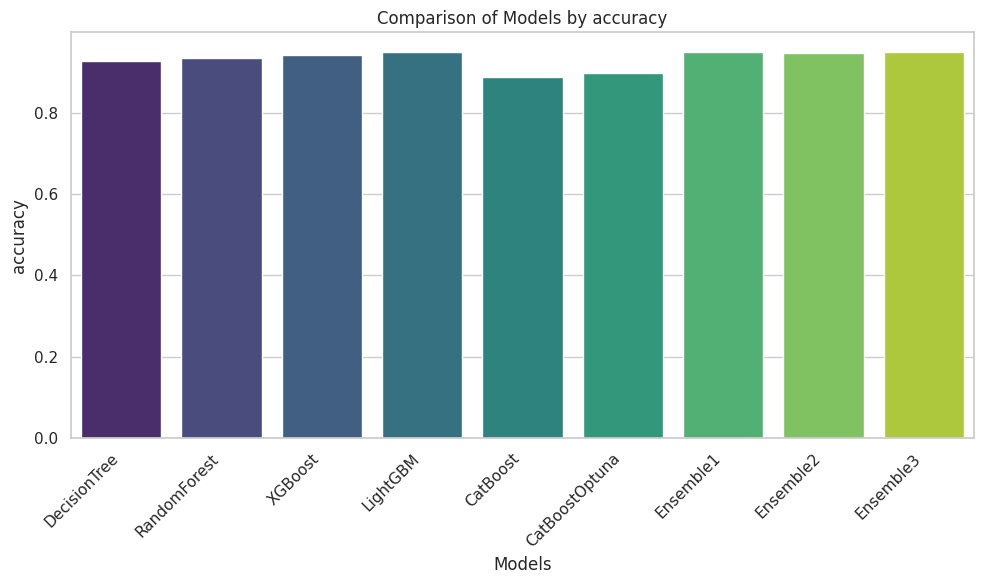

<ipython-input-79-cf01b8d1ea35>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y=results[metric], palette="viridis")


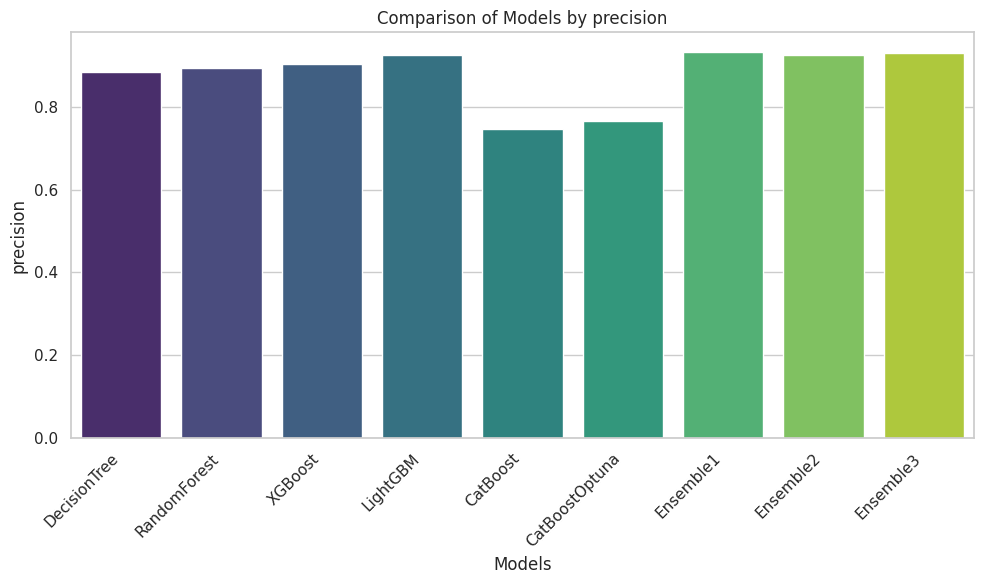

<ipython-input-79-cf01b8d1ea35>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y=results[metric], palette="viridis")


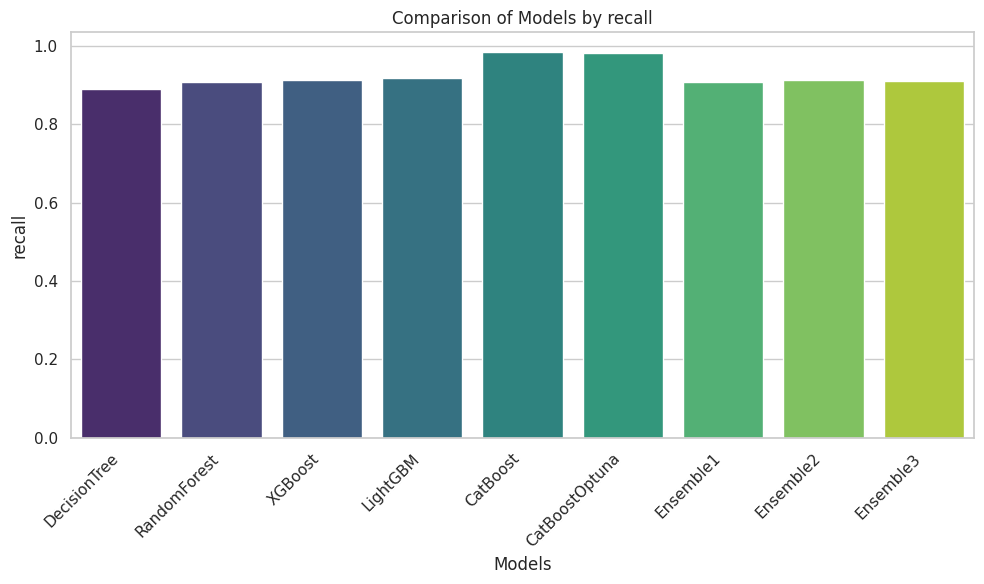

<ipython-input-79-cf01b8d1ea35>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y=results[metric], palette="viridis")


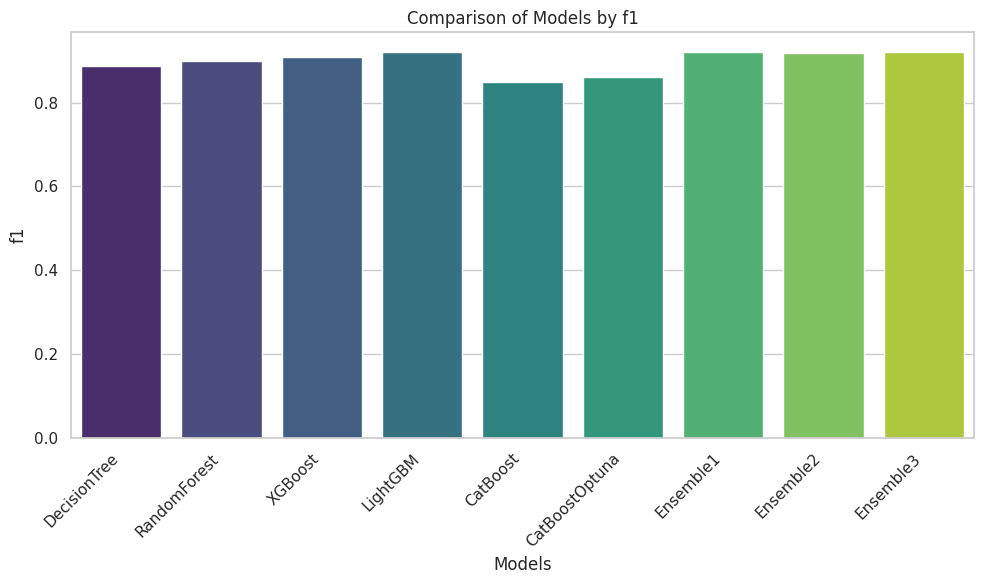

<ipython-input-79-cf01b8d1ea35>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y=results[metric], palette="viridis")


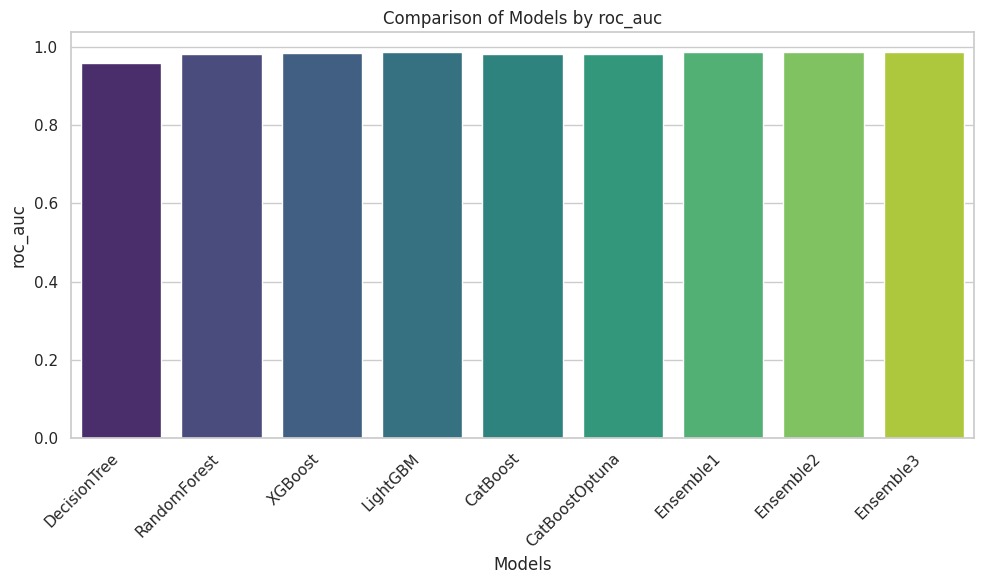

<ipython-input-79-cf01b8d1ea35>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y=results[metric], palette="viridis")


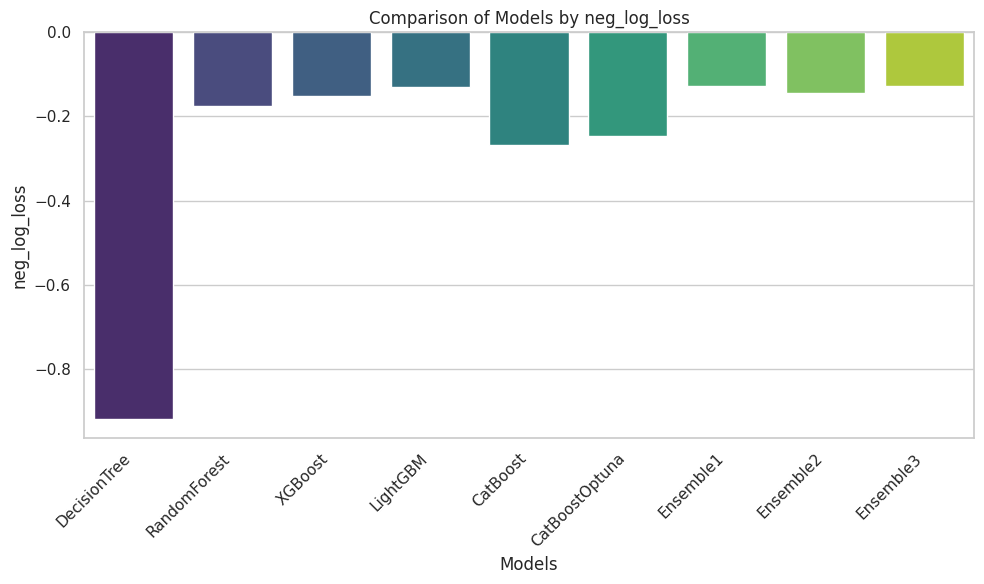

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đường dẫn thư mục chứa các file JSON
results_dir = '/content/drive/MyDrive/Graduation5/results'

# Danh sách mô hình
model_names = [
    'DecisionTree', 'RandomForest', 'XGBoost', 'LightGBM', 'CatBoost',
    'CatBoostOptuna', 'Ensemble1', 'Ensemble2', 'Ensemble3'
]

# Danh sách chỉ số đánh giá
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'neg_log_loss']

# Tạo DataFrame để lưu kết quả
results = pd.DataFrame(columns=metrics, index=model_names)

# Đọc từng file JSON và cập nhật vào DataFrame
for model in model_names:
    file_path = os.path.join(results_dir, f'{model}_cv_results.json')
    with open(file_path, 'r') as f:
        data = json.load(f)
        results.loc[model] = data

# Đổi kiểu dữ liệu từ object → float
results = results.astype(float)

# Thiết lập kiểu biểu đồ đẹp hơn
sns.set(style="whitegrid")

# Vẽ biểu đồ cho từng metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=results.index, y=results[metric], palette="viridis")
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Comparison of Models by {metric}")
    plt.ylabel(metric)
    plt.xlabel("Models")
    plt.tight_layout()
    plt.show()


In [ ]:
model_lgb.fit(X_resampled, y_resampled)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 33130, number of negative: 70000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 103130, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=7,
               n_estimators=2000, n_jobs=1, objective='binary', random_state=42,
               subsample=0.8)

In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/Graduation4/X_test_fe.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Graduation4/y_test.csv')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

y_pred = model_lgb.predict(X_test)
y_proba = model_lgb.predict_proba(X_test)

results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, average='weighted'),
    "recall": recall_score(y_test, y_pred, average='weighted'),
    "f1": f1_score(y_test, y_pred, average='weighted'),
    "roc_auc": roc_auc_score(y_test['binary_label'], y_proba[:, 1], multi_class='ovr', average='weighted'), # Select the probabilities for the positive class (index 1)
    "neg_log_loss": -log_loss(y_test, y_proba)
}

# In kết quả
for k, v in results.items():
    print(f"{k}: {v:.4f}")

accuracy: 0.9687
precision: 0.9886
recall: 0.9687
f1: 0.9763
roc_auc: 0.9879
neg_log_loss: -0.0844


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

y_pred = model_lgb.predict(X_test)
y_proba = model_lgb.predict_proba(X_test)

results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, average='weighted'),
    "recall": recall_score(y_test, y_pred, average='weighted'),
    "f1": f1_score(y_test, y_pred, average='weighted'),
    "roc_auc": roc_auc_score(y_test, y_proba[:, 1]),
    "neg_log_loss": -log_loss(y_test, y_proba)
}

for k, v in results.items():
    print(f"{k}: {v:.4f}")


accuracy: 0.9687
precision: 0.9886
recall: 0.9687
f1: 0.9763
roc_auc: 0.9879
neg_log_loss: -0.0844


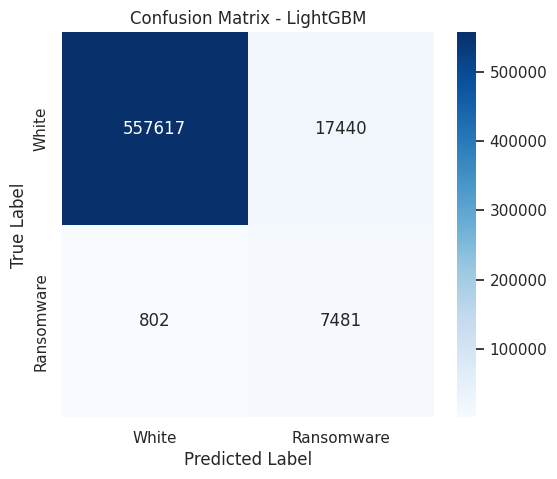

Classification Report:
              precision    recall  f1-score   support

       White       1.00      0.97      0.98    575057
  Ransomware       0.30      0.90      0.45      8283

    accuracy                           0.97    583340
   macro avg       0.65      0.94      0.72    583340
weighted avg       0.99      0.97      0.98    583340



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Dự đoán nhãn
y_pred = model_lgb.predict(X_test)

# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['White', 'Ransomware'], yticklabels=['White', 'Ransomware'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LightGBM')
plt.show()

# In classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['White', 'Ransomware']))


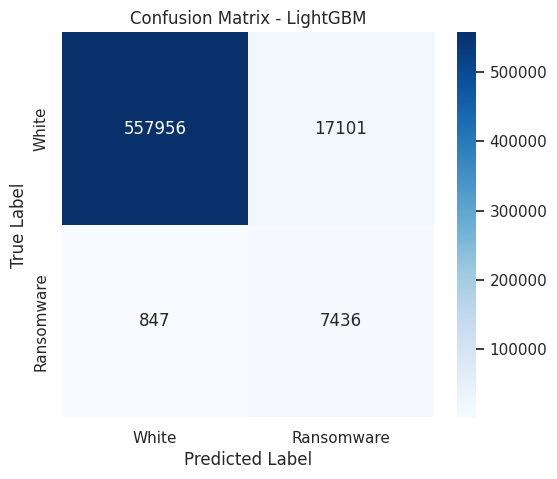

Classification Report:
              precision    recall  f1-score   support

       White       1.00      0.97      0.98    575057
  Ransomware       0.30      0.90      0.45      8283

    accuracy                           0.97    583340
   macro avg       0.65      0.93      0.72    583340
weighted avg       0.99      0.97      0.98    583340



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Dự đoán nhãn
y_pred1 = ensemble3.predict(X_test)

# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred1)

# Vẽ confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['White', 'Ransomware'], yticklabels=['White', 'Ransomware'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LightGBM')
plt.show()

# In classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['White', 'Ransomware']))


In [ ]:
from sklearn.model_selection import train_test_split

# Giả sử bạn đang có X_train, y_train đã xử lý (resampled, chuẩn hóa,...)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)
model_lgb.fit(X_train_split, y_train_split)
from sklearn.metrics import f1_score
import numpy as np

# Dự đoán xác suất trên validation set
y_val_proba = model_lgb.predict_proba(X_val_split)[:, 1]

# Thử nhiều ngưỡng khác nhau
thresholds = np.arange(0.1, 0.91, 0.01)
best_thresh = 0.5
best_f1 = 0

for thresh in thresholds:
    preds = (y_val_proba >= thresh).astype(int)
    score = f1_score(y_val_split, preds, pos_label=1)
    if score > best_f1:
        best_f1 = score
        best_thresh = thresh

print(f"Best threshold: {best_thresh:.2f}, F1-score: {best_f1:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best threshold: 0.48, F1-score: 0.9208


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Dự đoán xác suất và phân loại trên tập test
y_test_proba = ensemble3.predict_proba(X_test)[:, 1]
y_test_pred_thresh = (y_test_proba >= best_thresh).astype(int)

# Confusion matrix và classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred_thresh, target_names=["White", "Ransomware"]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_thresh))


Classification Report:
               precision    recall  f1-score   support

       White       1.00      0.97      0.98    575057
  Ransomware       0.29      0.90      0.44      8283

    accuracy                           0.97    583340
   macro avg       0.64      0.93      0.71    583340
weighted avg       0.99      0.97      0.98    583340


Confusion Matrix:
 [[556890  18167]
 [   816   7467]]


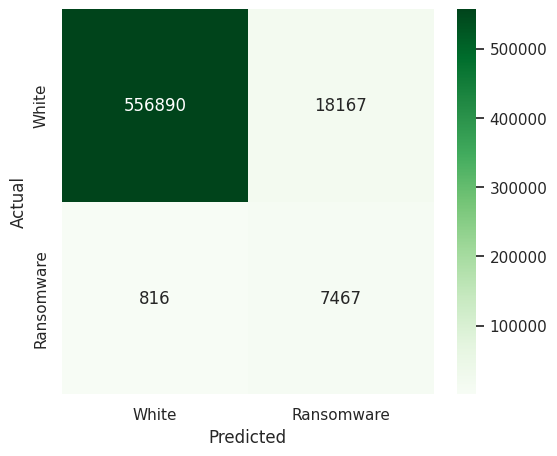

In [ ]:
# 6. Confusion Matrix
cm_e3 = confusion_matrix(y_test, y_test_pred_thresh)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_e3, annot=True, fmt='d', cmap='Greens', xticklabels=["White", "Ransomware"], yticklabels=["White", "Ransomware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

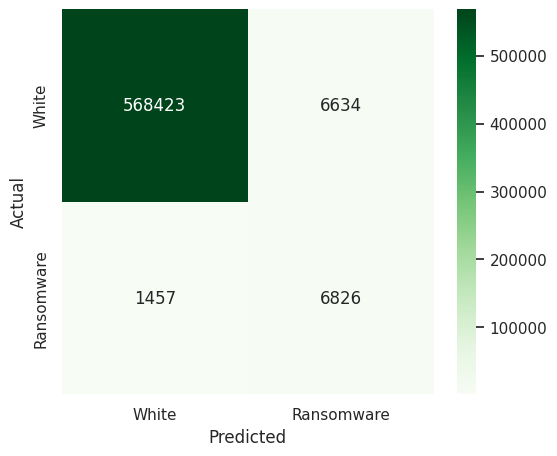

In [ ]:
cm_e31 = [[568423,   6634],
          [ 1457 ,  6826]]
plt.figure(figsize=(6, 5))
sns.heatmap(cm_e31, annot=True, fmt='d', cmap='Greens', xticklabels=["White", "Ransomware"], yticklabels=["White", "Ransomware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

✅ Best threshold with F0.5-score: 1.0000, F0.5-score: 0.3420

📊 Confusion Matrix on Test:
[[278706   8823]
 [   415   3726]]

📄 Classification Report on Test:
              precision    recall  f1-score   support

           0     0.9985    0.9693    0.9837    287529
           1     0.2969    0.8998    0.4465      4141

    accuracy                         0.9683    291670
   macro avg     0.6477    0.9345    0.7151    291670
weighted avg     0.9886    0.9683    0.9761    291670



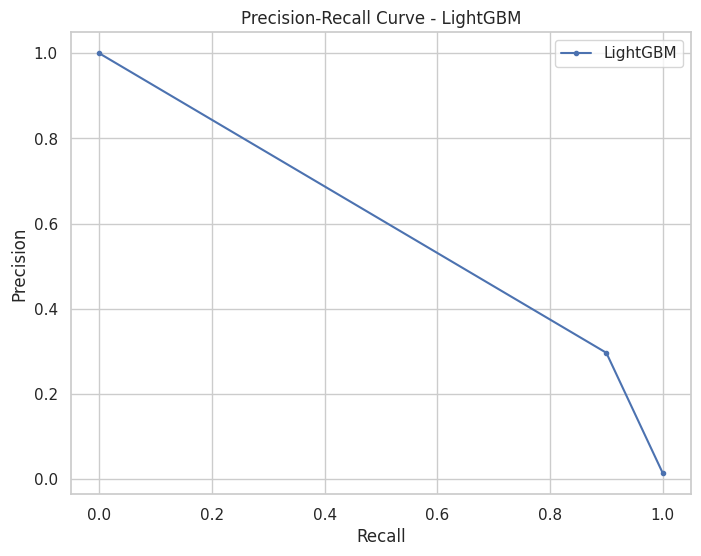

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_recall_curve, fbeta_score
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -------------------- Bước 1: Load lại dữ liệu và mô hình --------------------

import lightgbm as lgb
import joblib
import json


# Giả sử bạn đã có X và y (nếu chưa, hãy load lại)
# Chia lại tập validation và test từ tập test gốc ban đầu
X_val, X_test_final, y_val, y_test_final = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)

# -------------------- Bước 2: Predict Probabilities --------------------

val_probs = model_lgb.predict(X_val)
test_probs = model_lgb.predict(X_test_final)

# -------------------- Bước 3: Tuning Threshold --------------------

def find_best_threshold(y_true, probs, beta=0.5):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=0.5)

print(f"✅ Best threshold with F0.5-score: {best_threshold:.4f}, F0.5-score: {best_fbeta:.4f}")

# -------------------- Bước 4: Final Evaluation on Test Set --------------------

y_test_pred = (test_probs >= best_threshold).astype(int)

print("\n📊 Confusion Matrix on Test:")
print(confusion_matrix(y_test_final, y_test_pred))

print("\n📄 Classification Report on Test:")
print(classification_report(y_test_final, y_test_pred, digits=4))

# -------------------- Bước 5: Vẽ Precision-Recall Curve --------------------

precision, recall, _ = precision_recall_curve(y_test_final, test_probs)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='LightGBM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - LightGBM')
plt.grid(True)
plt.legend()
plt.show()


# Ensemble 4

In [ ]:
X_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv')
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Graduation4/X_test_fe.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Graduation4/y_test.csv')

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 25.2 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import json
import joblib
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

# Tách tập train và validation
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline2'
os.makedirs(SAVE_DIR, exist_ok=True)

# Cột dành cho MLP scaling
mlp_features = ['weight', 'count', 'looped', 'neighbors', 'income', 'n_address', 'length']
scaler_mlp = RobustScaler()

# Tune hyperparameters cho MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(128, 64), (256, 128)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [300]
}

mlp_grid = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid=mlp_param_grid,
    cv=3,
    scoring='average_precision',
    n_jobs=-1
)
mlp_grid.fit(scaler_mlp.fit_transform(X_train[mlp_features]), y_train)

best_mlp = mlp_grid.best_estimator_

base_learners = {
    'catboost': CatBoostClassifier(iterations=300, depth=8, learning_rate=0.1, random_state=42, verbose=0),
    'lgbm': LGBMClassifier(n_estimators=300, max_depth=8, learning_rate=0.1, random_state=42),
    'rf': RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1),
    'et': ExtraTreesClassifier(n_estimators=300, max_depth=12, random_state=42, n_jobs=-1),
    'mlp': best_mlp
}

meta_model = CatBoostClassifier(iterations=500, depth=8, learning_rate=0.05, random_state=42, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

meta_X_train = np.zeros((X_train.shape[0], len(base_learners)))
meta_X_val = np.zeros((X_val.shape[0], len(base_learners)))
meta_X_test = np.zeros((X_test.shape[0], len(base_learners)))

base_models_fitted = {}

# ---------------------- Base Models Training ----------------------
for idx, (name, model) in enumerate(base_learners.items()):
    print(f"Training base learner: {name}")

    oof_train = np.zeros(X_train.shape[0])
    oof_val = np.zeros(X_val.shape[0])
    oof_test = np.zeros(X_test.shape[0])

    for train_idx, valid_idx in kfold.split(X_train, y_train):
        X_tr, X_va = X_train.iloc[train_idx].reset_index(drop=True), X_train.iloc[valid_idx].reset_index(drop=True)
        y_tr, y_va = y_train.iloc[train_idx].reset_index(drop=True), y_train.iloc[valid_idx].reset_index(drop=True)

        y_tr = y_tr.values.ravel()
        y_va = y_va.values.ravel()

        model_clone = clone(model)

        if name == 'mlp':
            scaler_mlp_fold = RobustScaler()
            X_tr_scaled = scaler_mlp_fold.fit_transform(X_tr[mlp_features])
            X_va_scaled = scaler_mlp_fold.transform(X_va[mlp_features])
            model_clone.fit(X_tr_scaled, y_tr)

            oof_train[valid_idx] = model_clone.predict_proba(X_va_scaled)[:, 1]
            oof_val += model_clone.predict_proba(scaler_mlp.transform(X_val[mlp_features]))[:, 1] / kfold.n_splits
            oof_test += model_clone.predict_proba(scaler_mlp.transform(X_test[mlp_features]))[:, 1] / kfold.n_splits
        else:
            model_clone.fit(X_tr, y_tr)
            oof_train[valid_idx] = model_clone.predict_proba(X_va)[:, 1]
            oof_val += model_clone.predict_proba(X_val)[:, 1] / kfold.n_splits
            oof_test += model_clone.predict_proba(X_test)[:, 1] / kfold.n_splits

    meta_X_train[:, idx] = oof_train
    meta_X_val[:, idx] = oof_val
    meta_X_test[:, idx] = oof_test

    joblib.dump(model_clone, f"{SAVE_DIR}/{name}_base_model.pkl")

# Lưu scaler của MLP
joblib.dump(scaler_mlp, f"{SAVE_DIR}/scaler_mlp.pkl")

print("Base models and MLP scaler saved!")

# ---------------------- Meta Model Training ----------------------
print("Training Meta Model (CatBoost)")
train_pool = Pool(meta_X_train, y_train)
val_pool = Pool(meta_X_val, y_val)

meta_model.fit(train_pool, eval_set=val_pool)
meta_model.save_model(f"{SAVE_DIR}/meta_model.cbm")

print("Meta model saved!")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training base learner: catboost
Training base learner: lgbm
[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 66003, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321243 -> initscore=-0.748065
[LightGBM] [Info] Start training from score -0.748065
[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train

In [ ]:
# Tách tập train và validation
X_valid1, X_test1, y_valid1, y_test1 = train_test_split(
    X_test, y_test, test_size=0.5, stratify=y_test, random_state=42
)

In [ ]:
X_valid1.to_csv('/content/drive/MyDrive/Graduation4/dataset/X_valid1.csv', index=False)
X_test1.to_csv('/content/drive/MyDrive/Graduation4/dataset/X_test1.csv', index=False)
y_valid1.to_csv('/content/drive/MyDrive/Graduation4/dataset/y_valid1.csv', index=False)
y_test1.to_csv('/content/drive/MyDrive/Graduation4/dataset/y_test1.csv', index=False)


In [ ]:
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learners)))

In [ ]:
for idx, model in enumerate(base_learners):
    meta_X_valid1[:, idx] = meta_model.predict_proba(X_valid1)[:, 1]

In [ ]:
del meta_X_valid1

✅ Best threshold selected: 0.8027 with F0.5: 0.9387

📊 Confusion Matrix on Test:
[[568548   6509]
 [  1498   6785]]

📄 Classification Report on Test:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    575057
           1       0.51      0.82      0.63      8283

    accuracy                           0.99    583340
   macro avg       0.75      0.90      0.81    583340
weighted avg       0.99      0.99      0.99    583340



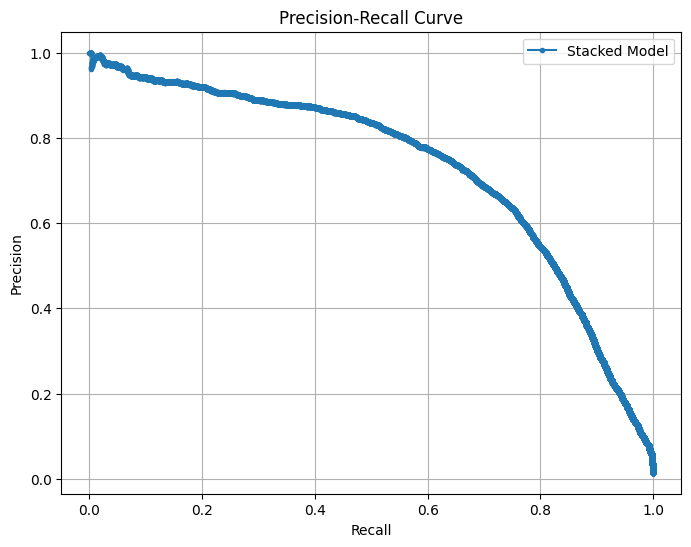

In [ ]:
# ---------------------- Bước 3: Threshold Tuning ----------------------
def find_best_threshold(y_true, probs, beta=0.5):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

val_probs = meta_model.predict_proba(meta_X_val)[:, 1]
test_probs = meta_model.predict_proba(meta_X_test)[:, 1]

best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=0.5)

# Save threshold
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"{SAVE_DIR}/threshold.json", 'w') as f:
    json.dump(threshold_info, f)

print(f"✅ Best threshold selected: {best_threshold:.4f} with F0.5: {best_fbeta:.4f}")

# ---------------------- Bước 4: Evaluation ----------------------
y_test_pred = (test_probs >= best_threshold).astype(int)

print("\n📊 Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_test_pred))

print("\n📄 Classification Report on Test:")
print(classification_report(y_test, y_test_pred))

# Vẽ Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, test_probs)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Stacked Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import fbeta_score, precision_recall_curve, classification_report, confusion_matrix

# Khởi tạo meta_X_valid1
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learners)))

# Load lại từng base model và predict cho X_valid1
for idx, name in enumerate(base_learners):
    model_path = f"{SAVE_DIR}/{name}_base_model.pkl"
    model_loaded = joblib.load(model_path)

    if name == 'mlp':
        # Load lại scaler cho MLP
        scaler_mlp = joblib.load(f"{SAVE_DIR}/scaler_mlp.pkl")
        X_valid1_scaled = scaler_mlp.transform(X_valid1[mlp_features])
        meta_X_valid1[:, idx] = model_loaded.predict_proba(X_valid1_scaled)[:, 1]
    else:
        meta_X_valid1[:, idx] = model_loaded.predict_proba(X_valid1)[:, 1]

print("meta_X_valid1 shape:", meta_X_valid1.shape)

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Predict xác suất bằng meta model
y_valid1_proba = meta_model.predict_proba(meta_X_valid1)[:, 1]

# Tune threshold với beta = 0.5
precision, recall, thresholds = precision_recall_curve(y_valid1, y_valid1_proba)
beta = 0.5
fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-10)

# Tìm threshold tốt nhất theo F-beta
best_idx = np.argmax(fbeta_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold for F-{beta}: {best_threshold:.4f}")
print(f"Best F-{beta} score: {fbeta_scores[best_idx]:.4f}")

# Predict nhãn cuối cùng theo threshold
y_valid1_pred = (y_valid1_proba >= best_threshold).astype(int)

# Đánh giá kết quả
print("Classification Report:")
print(classification_report(y_valid1, y_valid1_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_valid1, y_valid1_pred))


meta_X_valid1 shape: (291670, 5)
Best threshold for F-0.5: 0.9746
Best F-0.5 score: 0.7274
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    287528
           1       0.79      0.56      0.65      4142

    accuracy                           0.99    291670
   macro avg       0.89      0.78      0.82    291670
weighted avg       0.99      0.99      0.99    291670

Confusion Matrix:
[[286899    629]
 [  1825   2317]]


In [ ]:
# Tune threshold với beta = 2
precision, recall, thresholds = precision_recall_curve(y_valid1, y_valid1_proba)
beta = 2
fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-10)

# Tìm threshold tốt nhất theo F-beta
best_idx = np.argmax(fbeta_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold for F-{beta}: {best_threshold:.4f}")
print(f"Best F-{beta} score: {fbeta_scores[best_idx]:.4f}")

# Predict nhãn cuối cùng theo threshold
y_valid1_pred = (y_valid1_proba >= best_threshold).astype(int)

# Đánh giá kết quả
print("Classification Report:")
print(classification_report(y_valid1, y_valid1_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_valid1, y_valid1_pred))


Best threshold for F-2: 0.8259
Best F-2 score: 0.7290
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    287528
           1       0.52      0.81      0.63      4142

    accuracy                           0.99    291670
   macro avg       0.76      0.90      0.81    291670
weighted avg       0.99      0.99      0.99    291670

Confusion Matrix:
[[284394   3134]
 [   779   3363]]


In [ ]:
# Tune threshold với beta = 1
precision, recall, thresholds = precision_recall_curve(y_valid1, y_valid1_proba)
beta = 1
fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-10)

# Tìm threshold tốt nhất theo F-beta
best_idx = np.argmax(fbeta_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold for F-{beta}: {best_threshold:.4f}")
print(f"Best F-{beta} score: {fbeta_scores[best_idx]:.4f}")

# Predict nhãn cuối cùng theo threshold
y_valid1_pred = (y_valid1_proba >= best_threshold).astype(int)

# Đánh giá kết quả
print("Classification Report:")
print(classification_report(y_valid1, y_valid1_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_valid1, y_valid1_pred))


Best threshold for F-1: 0.9542
Best F-1 score: 0.6842
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    287528
           1       0.72      0.65      0.68      4142

    accuracy                           0.99    291670
   macro avg       0.86      0.82      0.84    291670
weighted avg       0.99      0.99      0.99    291670

Confusion Matrix:
[[286464   1064]
 [  1435   2707]]


In [ ]:
# ---------------- Predict meta_X_test1 ----------------
# Khởi tạo meta_X_test1
meta_X_test1 = np.zeros((X_test1.shape[0], len(base_learners)))

# Load lại từng base model và predict cho X_test1
for idx, name in enumerate(base_learners):
    model_path = f"{SAVE_DIR}/{name}_base_model.pkl"
    model_loaded = joblib.load(model_path)

    if name == 'mlp':
        scaler_mlp = joblib.load(f"{SAVE_DIR}/scaler_mlp.pkl")
        X_test1_scaled = scaler_mlp.transform(X_test1[mlp_features])
        meta_X_test1[:, idx] = model_loaded.predict_proba(X_test1_scaled)[:, 1]
    else:
        meta_X_test1[:, idx] = model_loaded.predict_proba(X_test1)[:, 1]

print("meta_X_test1 shape:", meta_X_test1.shape)

# Load lại meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Predict xác suất bằng meta model
y_test1_proba = meta_model.predict_proba(meta_X_test1)[:, 1]

# Predict nhãn cuối cùng theo threshold đã tìm được ở bước valid1
y_test1_pred = (y_test1_proba >= best_threshold).astype(int)

# Đánh giá kết quả
print("Classification Report on Test1:")
print(classification_report(y_test1, y_test1_pred))

print("Confusion Matrix on Test1:")
print(confusion_matrix(y_test1, y_test1_pred))

# Tính F-beta score (beta=0.5)
fbeta_test1 = fbeta_score(y_test1, y_test1_pred, beta=0.5)
print(f"F-{beta} score on Test1: {fbeta_test1:.4f}")


meta_X_test1 shape: (291670, 5)
Classification Report on Test1:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    287529
           1       0.53      0.80      0.64      4141

    accuracy                           0.99    291670
   macro avg       0.76      0.90      0.82    291670
weighted avg       0.99      0.99      0.99    291670

Confusion Matrix on Test1:
[[284587   2942]
 [   821   3320]]
F-2 score on Test1: 0.5687


In [ ]:
import time
from sklearn.metrics import fbeta_score, precision_recall_curve, roc_auc_score, average_precision_score, precision_score, recall_score, f1_score
import joblib
import numpy as np
import json
from catboost import CatBoostClassifier, Pool

SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline2'
os.makedirs(SAVE_DIR, exist_ok=True)

# Load models
base_model_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp']
base_models = {}
for name in base_model_names:
    base_models[name] = joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl")

# Load MLP scaler
scaler_mlp = joblib.load(f"{SAVE_DIR}/scaler_mlp.pkl")

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# ---------------------- Inference & Meta features ----------------------
start_time = time.time()

meta_X_val = np.zeros((X_val.shape[0], len(base_models)))

for idx, (name, model) in enumerate(base_models.items()):
    if name == 'mlp':
        X_val_scaled = scaler_mlp.transform(X_val[mlp_features])
        preds = model.predict_proba(X_val_scaled)[:, 1]
    else:
        preds = model.predict_proba(X_val)[:, 1]

    meta_X_val[:, idx] = preds

# Predict meta model
val_pool = Pool(meta_X_val)
meta_probs = meta_model.predict_proba(val_pool)[:, 1]

inference_time = time.time() - start_time

# ---------------------- Tune threshold with F-beta (β=2) ----------------------
precision, recall, thresholds = precision_recall_curve(y_val, meta_probs)
beta = 2
fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-9)

best_idx = np.argmax(fbeta_scores)
best_threshold = thresholds[best_idx]
best_fbeta = fbeta_scores[best_idx]

# Apply best threshold
meta_preds = (meta_probs >= best_threshold).astype(int)

# ---------------------- Calculate Metrics ----------------------
pr_auc = average_precision_score(y_val, meta_probs)
roc_auc = roc_auc_score(y_val, meta_probs)
precision_val = precision_score(y_val, meta_preds)
recall_val = recall_score(y_val, meta_preds)
f1 = f1_score(y_val, meta_preds)

# Save threshold
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"{SAVE_DIR}/threshold.json", 'w') as f:
    json.dump(threshold_info, f)

# ---------------------- Save Metrics ----------------------
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision_val,
    "Recall": recall_val,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open(f"{SAVE_DIR}/validation_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("Metrics saved successfully!")


In [ ]:
import os
import numpy as np
import pandas as pd
import joblib
import json
import time
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import (
    precision_recall_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    average_precision_score
)

# Dữ liệu thực tế của bạn
# X_val, y_val, X_valid1, y_valid1 = ...

SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline2'

# Load base models
base_models = {}
for name in ['catboost', 'lgbm', 'rf', 'et', 'mlp']:
    model_path = os.path.join(SAVE_DIR, f"{name}_base_model.pkl")
    if os.path.exists(model_path):
        base_models[name] = joblib.load(model_path)
    else:
        raise FileNotFoundError(f"Missing base model file: {model_path}")

# Load scaler MLP
scaler_mlp = joblib.load(os.path.join(SAVE_DIR, "scaler_mlp.pkl"))

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(os.path.join(SAVE_DIR, "meta_model.cbm"))

# Tạo meta feature cho X_val
meta_X_val = np.zeros((X_val.shape[0], len(base_models)))
for i, (name, model) in enumerate(base_models.items()):
    if name == 'mlp':
        X_scaled = scaler_mlp.transform(X_val[['weight', 'count', 'looped', 'neighbors', 'income', 'n_address', 'length']])
        meta_X_val[:, i] = model.predict_proba(X_scaled)[:, 1]
    else:
        meta_X_val[:, i] = model.predict_proba(X_val)[:, 1]

# Tính best threshold theo beta=2
beta = 2
prec, rec, thresh = precision_recall_curve(y_val, meta_model.predict_proba(meta_X_val)[:, 1])
f_beta = (1 + beta**2) * (prec * rec) / (beta**2 * prec + rec + 1e-8)
best_idx = np.argmax(f_beta)
best_threshold = thresh[best_idx]
best_fbeta = f_beta[best_idx]

# Tạo meta feature cho X_valid1 và đo thời gian
start_time = time.time()
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_models)))
for i, (name, model) in enumerate(base_models.items()):
    if name == 'mlp':
        X_scaled = scaler_mlp.transform(X_valid1[['weight', 'count', 'looped', 'neighbors', 'income', 'n_address', 'length']])
        meta_X_valid1[:, i] = model.predict_proba(X_scaled)[:, 1]
    else:
        meta_X_valid1[:, i] = model.predict_proba(X_valid1)[:, 1]

proba_preds = meta_model.predict_proba(meta_X_valid1)[:, 1]
inference_time = time.time() - start_time

# Tính các chỉ số
results = {
    "PR_AUC": float(average_precision_score(y_valid1, proba_preds)),
    "ROC_AUC": float(roc_auc_score(y_valid1, proba_preds)),
    "Precision": float(precision_score(y_valid1, proba_preds >= best_threshold)),
    "Recall": float(recall_score(y_valid1, proba_preds >= best_threshold)),
    "F1_score": float(f1_score(y_valid1, proba_preds >= best_threshold)),
    "Inference_time_sec": inference_time
}

# Save threshold
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"{SAVE_DIR}/threshold.json", 'w') as f:
    json.dump(threshold_info, f)


# Lưu vào file json
with open(os.path.join("/content/drive/MyDrive/Graduation5/results", "ensemble4_valid1_recall.json"), "w") as f:
    json.dump(results, f, indent=4)

print("Đã lưu kết quả:")
print(json.dumps(results, indent=4))


Đã lưu kết quả:
{
    "PR_AUC": 0.7181767694104713,
    "ROC_AUC": 0.987938095766721,
    "Precision": 0.14346371127343385,
    "Recall": 0.9625784645098986,
    "F1_score": 0.24971033100554285,
    "Inference_time_sec": 3.7812821865081787
}


In [ ]:
import os
import numpy as np
import pandas as pd
import joblib
import json
import time
import gc
import warnings
from catboost import CatBoostClassifier
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import (
    precision_recall_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    average_precision_score
)

# Tắt warning và GC
warnings.filterwarnings("ignore")
gc.disable()

SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline2'

# Load base models
base_models = {}
for name in ['catboost', 'lgbm', 'rf', 'et', 'mlp']:
    base_models[name] = joblib.load(os.path.join(SAVE_DIR, f"{name}_base_model.pkl"))

scaler_mlp = joblib.load(os.path.join(SAVE_DIR, "scaler_mlp.pkl"))

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(os.path.join(SAVE_DIR, "meta_model.cbm"))

# Warm-up predict
for model in base_models.values():
    try:
        _ = model.predict_proba(X_val.iloc[:5, :])  # Chỉ lấy 5 mẫu nhỏ để warm-up
    except:
        pass
_ = meta_model.predict_proba(np.zeros((5, len(base_models))))

# Tính meta feature song song
def predict_model(name_model_tuple):
    name, model = name_model_tuple
    if name == 'mlp':
        X_scaled = scaler_mlp.transform(X_valid1[['weight', 'count', 'looped', 'neighbors', 'income', 'n_address', 'length']])
        return model.predict_proba(X_scaled)[:, 1]
    else:
        return model.predict_proba(X_valid1)[:, 1]

# Đo thời gian bằng perf_counter
start_time = time.perf_counter()

with ThreadPoolExecutor() as executor:
    preds = list(executor.map(predict_model, base_models.items()))

meta_X_valid1 = np.column_stack(preds)
proba_preds = meta_model.predict_proba(meta_X_valid1)[:, 1]

inference_time = time.perf_counter() - start_time

# Load threshold
with open(f"{SAVE_DIR}/threshold_precision.json") as f:
    threshold_info = json.load(f)
best_threshold = threshold_info['best_threshold']

# Tính các chỉ số
results = {
    "PR_AUC": float(average_precision_score(y_valid1, proba_preds)),
    "ROC_AUC": float(roc_auc_score(y_valid1, proba_preds)),
    "Precision": float(precision_score(y_valid1, proba_preds >= best_threshold)),
    "Recall": float(recall_score(y_valid1, proba_preds >= best_threshold)),
    "F1_score": float(f1_score(y_valid1, proba_preds >= best_threshold)),
    "Inference_time_sec": inference_time
}

# Lưu kết quả
with open(os.path.join("/content/drive/MyDrive/Graduation5/results", "ensemble4_valid1_precision.json"), "w") as f:
    json.dump(results, f, indent=4)

print("Đã lưu kết quả:")
print(json.dumps(results, indent=4))


Đã lưu kết quả:
{
    "PR_AUC": 0.7181767694104713,
    "ROC_AUC": 0.987938095766721,
    "Precision": 0.4932832587028745,
    "Recall": 0.8244809270883631,
    "F1_score": 0.6172616357885223,
    "Inference_time_sec": 3.6386798379999163
}


In [ ]:
print(best_threshold)

0.7987629668784247


In [ ]:
# Confusion matrix và classification report
cm = confusion_matrix(y_valid1, valid1_preds)
report = classification_report(y_valid1, valid1_preds, digits=4)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[284019   3509]
 [   712   3430]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9975    0.9878    0.9926    287528
           1     0.4943    0.8281    0.6191      4142

    accuracy                         0.9855    291670
   macro avg     0.7459    0.9079    0.8059    291670
weighted avg     0.9904    0.9855    0.9873    291670



# Đánh giá lại

In [ ]:
import pandas as pd

In [ ]:
X_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_valid1.csv')
y_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_valid1.csv')

In [ ]:
import time
from sklearn.metrics import (average_precision_score, roc_auc_score,
                             precision_score, recall_score, f1_score)
import json
import joblib

# Load model đã fit
dt_model = joblib.load('/content/drive/MyDrive/Graduation4/best_decision_tree_model.pkl')

# Bắt đầu đo thời gian predict
start_time = time.time()
valid1_probs = dt_model.predict_proba(X_valid1)[:, 1]
inference_time = time.time() - start_time

# Threshold mặc định 0.5
valid1_preds = (valid1_probs >= 0.5).astype(int)

# Tính metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# Lưu vào JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/decision_tree_valid1.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In preview kết quả
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.36707412744259116,
    "ROC_AUC": 0.9638008349122417,
    "Precision": 0.21625232342007436,
    "Recall": 0.898841139546113,
    "F1_score": 0.3486281487030621,
    "Inference_time_sec": 0.04524827003479004
}


In [ ]:
import time
from sklearn.metrics import (average_precision_score, roc_auc_score,
                             precision_score, recall_score, f1_score)
import json
import joblib

# Load model Random Forest đã fit
rf_model = joblib.load('/content/drive/MyDrive/Graduation4/best_random_forest_model.pkl')

# Bắt đầu đo thời gian predict
start_time = time.time()
valid1_probs = rf_model.predict_proba(X_valid1)[:, 1]
inference_time = time.time() - start_time

# Threshold mặc định 0.5
valid1_preds = (valid1_probs >= 0.5).astype(int)

# Tính metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# Lưu vào JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/random_forest_valid1.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In preview kết quả
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.5988345505708866,
    "ROC_AUC": 0.9836438669988294,
    "Precision": 0.24996642041638684,
    "Recall": 0.8985997102848865,
    "F1_score": 0.391130727196301,
    "Inference_time_sec": 1.6523103713989258
}


In [ ]:
import time
from sklearn.metrics import (average_precision_score, roc_auc_score,
                             precision_score, recall_score, f1_score)
import json
import joblib

# Load model XGBoost đã fit
xgb_model = joblib.load('/content/drive/MyDrive/Graduation4/best_xgboost_model.pkl')

# Bắt đầu đo thời gian predict
start_time = time.time()
valid1_probs = xgb_model.predict_proba(X_valid1)[:, 1]
inference_time = time.time() - start_time

# Threshold mặc định 0.5
valid1_preds = (valid1_probs >= 0.5).astype(int)

# Tính metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# Lưu vào JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/xgboost_valid1.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In preview kết quả
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.643917535337729,
    "ROC_AUC": 0.9860934254226216,
    "Precision": 0.2735350271699222,
    "Recall": 0.8993239980685659,
    "F1_score": 0.419481981981982,
    "Inference_time_sec": 0.48839473724365234
}


In [ ]:
import joblib
import time
import json
from sklearn.metrics import (average_precision_score, roc_auc_score,
                             precision_score, recall_score, f1_score)

# Load model LightGBM
lgb_model = joblib.load('/content/drive/MyDrive/Graduation4/lightgbm_model.pkl')

# Đo thời gian predict (chỉ predict_proba trên X_valid1)
start_time = time.time()
lgb_probs = lgb_model.predict_proba(X_valid1)[:, 1]
inference_time = time.time() - start_time

# Predict nhãn với ngưỡng 0.5
lgb_preds = (lgb_probs >= 0.5).astype(int)

# Tính metrics
pr_auc = average_precision_score(y_valid1, lgb_probs)
roc_auc = roc_auc_score(y_valid1, lgb_probs)
precision = precision_score(y_valid1, lgb_preds)
recall = recall_score(y_valid1, lgb_preds)
f1 = f1_score(y_valid1, lgb_preds)

# Lưu kết quả vào JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/lightgbm_valid1.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In preview kết quả
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.6916255937037044,
    "ROC_AUC": 0.9878247639537092,
    "Precision": 0.29360237760050056,
    "Recall": 0.9063254466441333,
    "F1_score": 0.44352551984877125,
    "Inference_time_sec": 28.80481457710266
}


In [ ]:
from catboost import CatBoostClassifier
import joblib
import time
import json
from sklearn.metrics import (average_precision_score, roc_auc_score,
                             precision_score, recall_score, f1_score)

# Load CatBoost model
cat_model = CatBoostClassifier()
cat_model.load_model("/content/drive/MyDrive/Graduation4/Catboost/catboost_model.cbm")

# Load optimal threshold
optimal_threshold = joblib.load("/content/drive/MyDrive/Graduation4/Catboost/optimal_threshold.pkl")

# Đo thời gian predict_proba trên X_valid1
start_time = time.time()
cat_probs = cat_model.predict_proba(X_valid1)[:, 1]
inference_time = time.time() - start_time

# Predict nhãn theo optimal threshold
cat_preds = (cat_probs >= optimal_threshold).astype(int)

# Tính các metrics
pr_auc = average_precision_score(y_valid1, cat_probs)
roc_auc = roc_auc_score(y_valid1, cat_probs)
precision = precision_score(y_valid1, cat_preds)
recall = recall_score(y_valid1, cat_preds)
f1 = f1_score(y_valid1, cat_preds)

# Lưu kết quả vào JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/catboost_valid1.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In preview kết quả
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.6555355363397609,
    "ROC_AUC": 0.98597170402507,
    "Precision": 0.2586899321423626,
    "Recall": 0.901979719942057,
    "F1_score": 0.4020662935858803,
    "Inference_time_sec": 0.11762499809265137
}


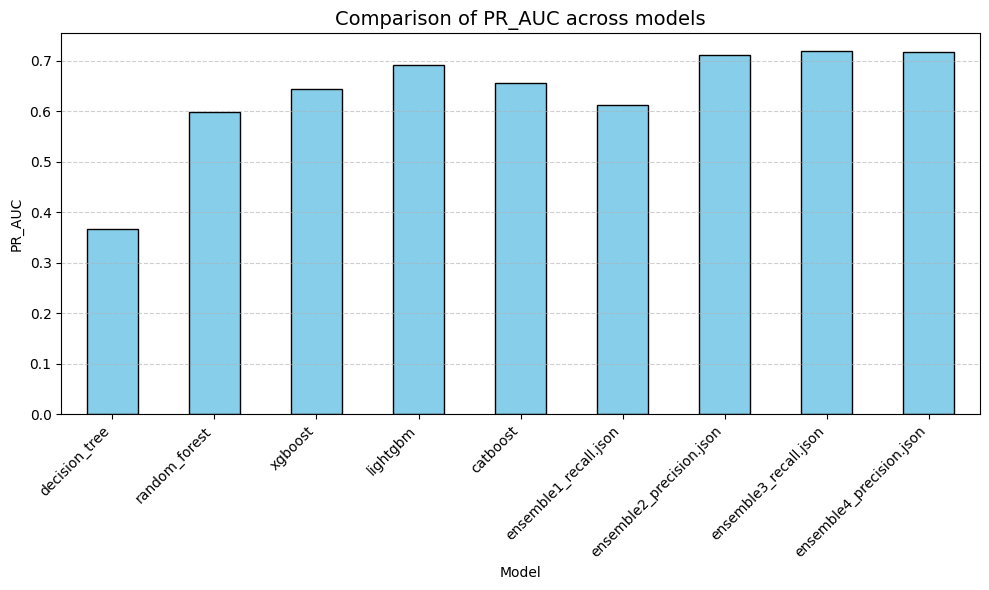

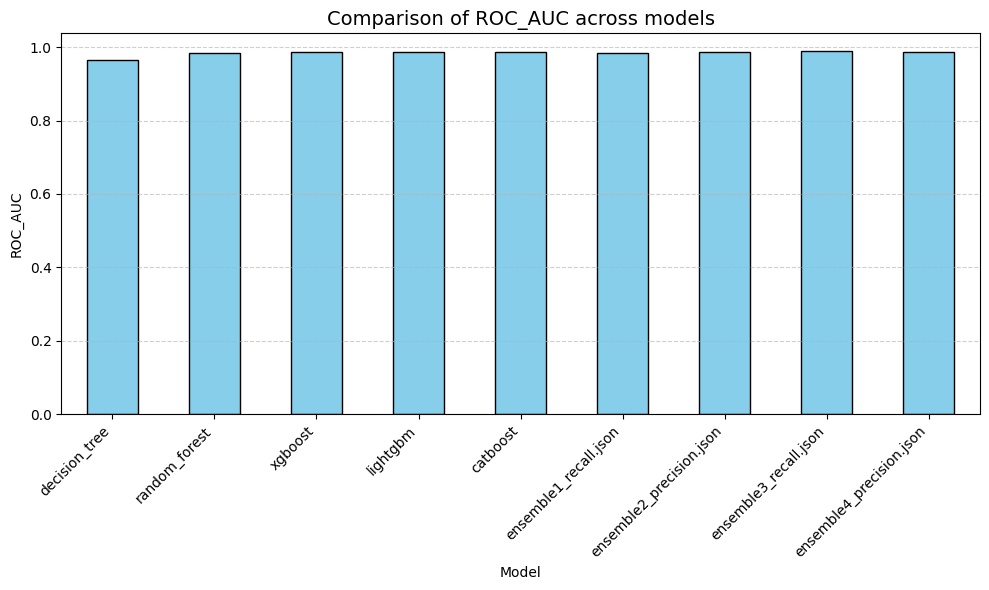

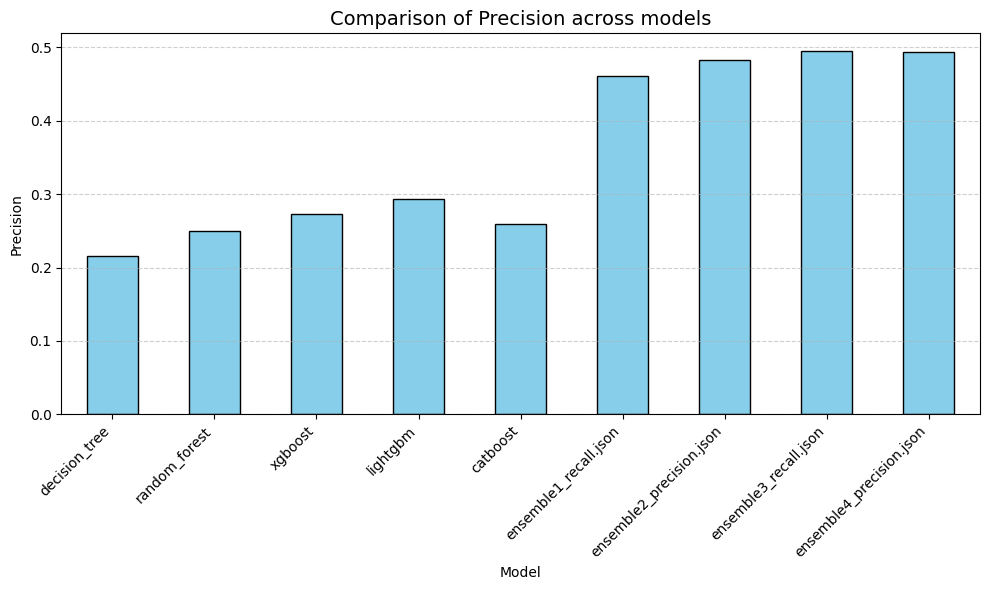

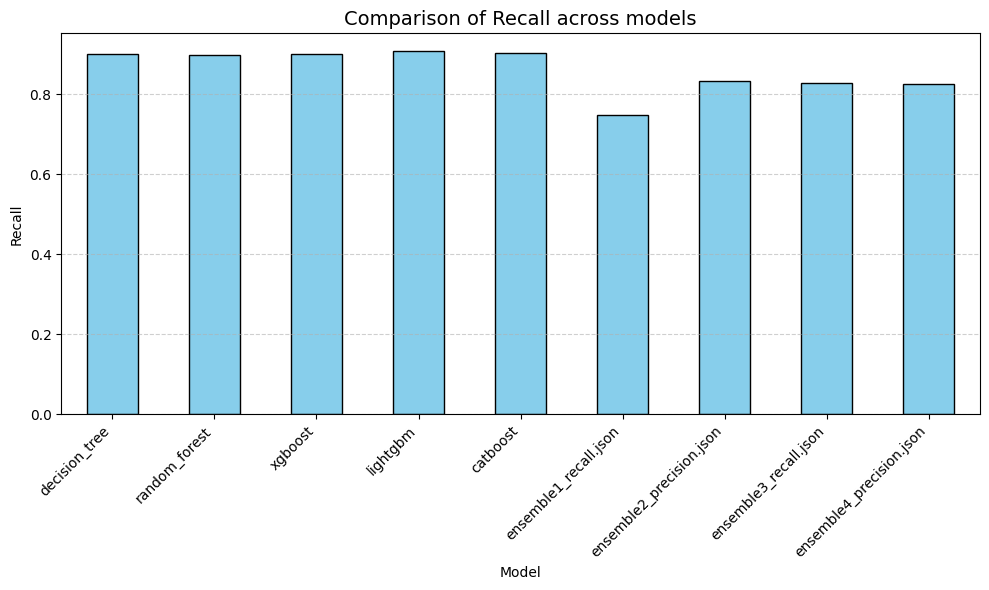

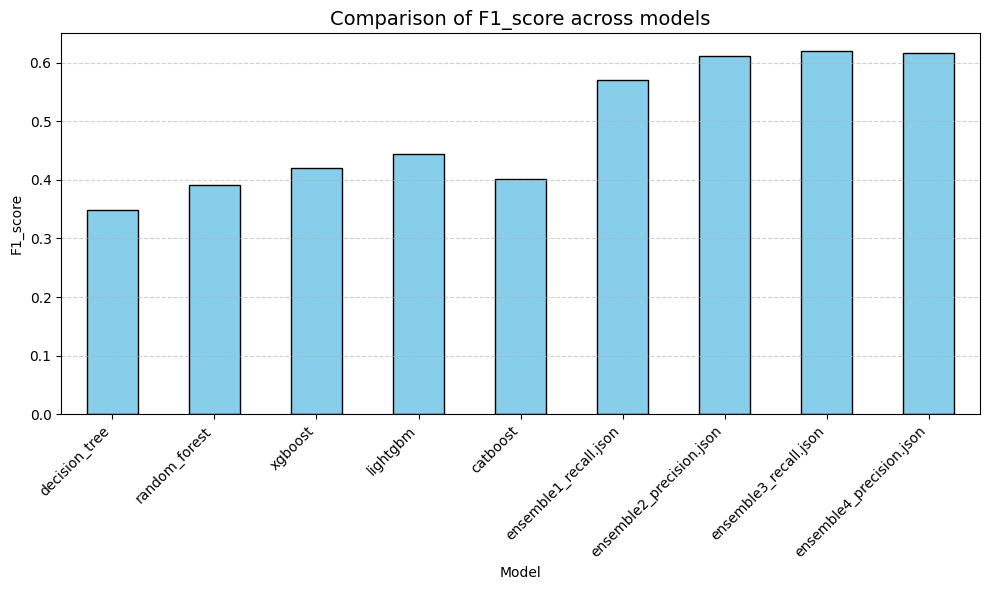

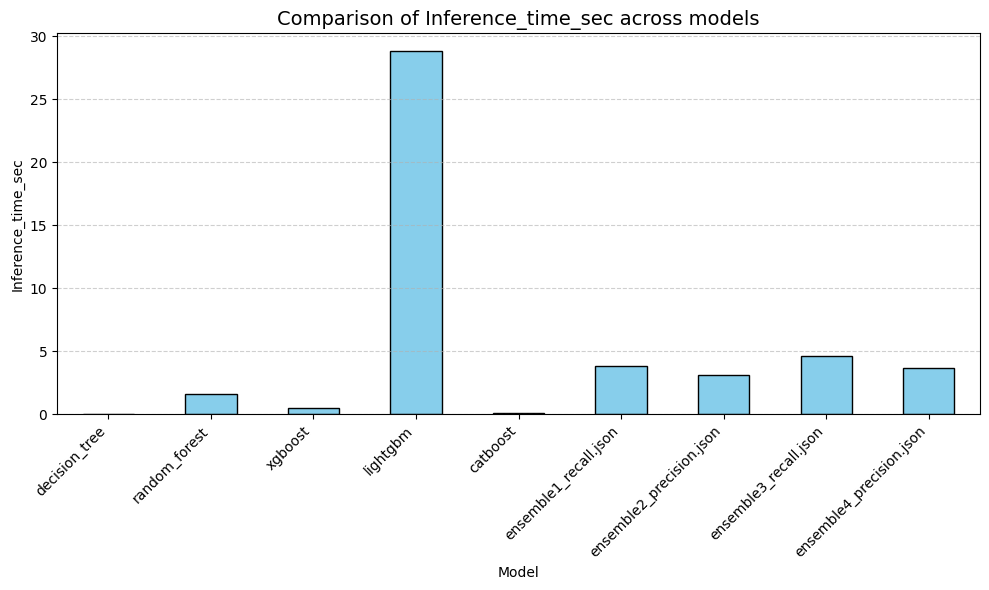

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn thư mục chứa các file JSON
results_dir = '/content/drive/MyDrive/Graduation5/results'

# Danh sách các file JSON bạn muốn load
file_names = [
    'decision_tree_valid1.json',
    'random_forest_valid1.json',
    'xgboost_valid1.json',
    'lightgbm_valid1.json',
    'catboost_valid1.json',
    'ensemble1_valid1_recall.json',
    'ensemble2_valid1_precision.json',
    'ensemble3_valid1_recall.json',
    'ensemble4_valid1_precision.json'
]

# Load dữ liệu từ tất cả các file JSON
data = {}
for file_name in file_names:
    model_name = file_name.replace('_valid1.json', '').replace('_valid1', '')  # gọn tên
    with open(os.path.join(results_dir, file_name), 'r') as f:
        metrics = json.load(f)
        data[model_name] = metrics

# Tạo DataFrame từ dictionary
df = pd.DataFrame(data).T  # Transpose để model là index

# Vẽ biểu đồ cho từng loại chỉ số
metrics_to_plot = ['PR_AUC', 'ROC_AUC', 'Precision', 'Recall', 'F1_score', 'Inference_time_sec']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    df[metric].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Comparison of {metric} across models", fontsize=14)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


<ipython-input-17-e7d868dcd9c6>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=45, ha='right')
<ipython-input-17-e7d868dcd9c6>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=45, ha='right')
<ipython-input-17-e7d868dcd9c6>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=45, ha='right')
<ipython-input-17-e7d868dcd9c6>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=45, ha='right')
<ipython-input-17-e7d868dcd9c6>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

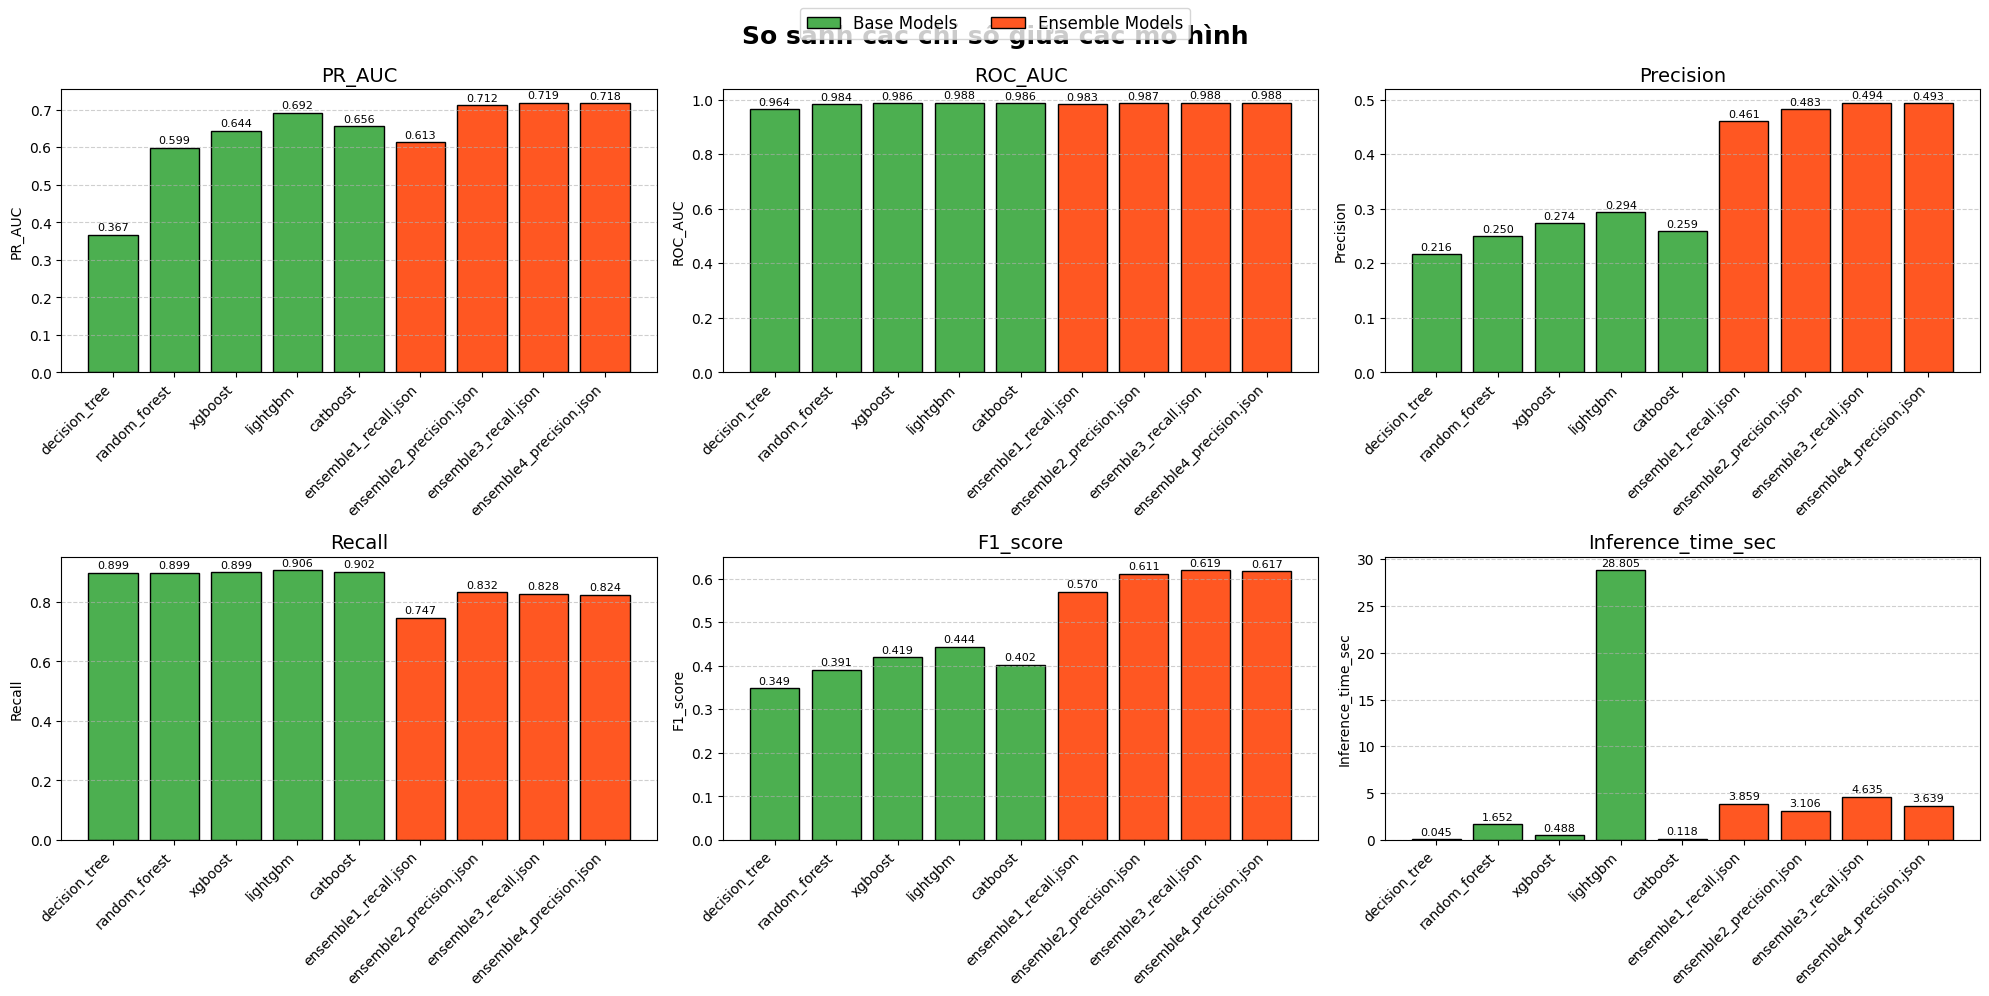

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn thư mục chứa các file JSON
results_dir = '/content/drive/MyDrive/Graduation5/results'

# Danh sách các file JSON
file_names = [
    'decision_tree_valid1.json',
    'random_forest_valid1.json',
    'xgboost_valid1.json',
    'lightgbm_valid1.json',
    'catboost_valid1.json',
    'ensemble1_valid1_recall.json',
    'ensemble2_valid1_precision.json',
    'ensemble3_valid1_recall.json',
    'ensemble4_valid1_precision.json'
]

# Load dữ liệu từ các file JSON
data = {}
for file_name in file_names:
    model_name = file_name.replace('_valid1.json', '').replace('_valid1', '')
    with open(os.path.join(results_dir, file_name), 'r') as f:
        metrics = json.load(f)
        data[model_name] = metrics

# Tạo DataFrame
df = pd.DataFrame(data).T

# Xác định loại model để tô màu
base_models = ['decision_tree', 'random_forest', 'xgboost', 'lightgbm', 'catboost']
ensemble_models = [m for m in df.index if m not in base_models]

# Màu sắc
base_color = '#4CAF50'       # Xanh lá
ensemble_color = '#FF5722'   # Cam

colors = [base_color if model in base_models else ensemble_color for model in df.index]

# Vẽ biểu đồ grouped
metrics_to_plot = ['PR_AUC', 'ROC_AUC', 'Precision', 'Recall', 'F1_score', 'Inference_time_sec']

# Thiết lập subplot grid
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]
    bars = ax.bar(df.index, df[metric], color=colors, edgecolor='black')
    ax.set_title(metric, fontsize=14)
    ax.set_ylabel(metric)
    ax.set_xticklabels(df.index, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Thêm giá trị trên đầu cột
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=8)

# Chú thích màu
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=base_color, edgecolor='black', label='Base Models'),
    Patch(facecolor=ensemble_color, edgecolor='black', label='Ensemble Models')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("So sánh các chỉ số giữa các mô hình", fontsize=18, fontweight='bold')

# Hiển thị
plt.show()


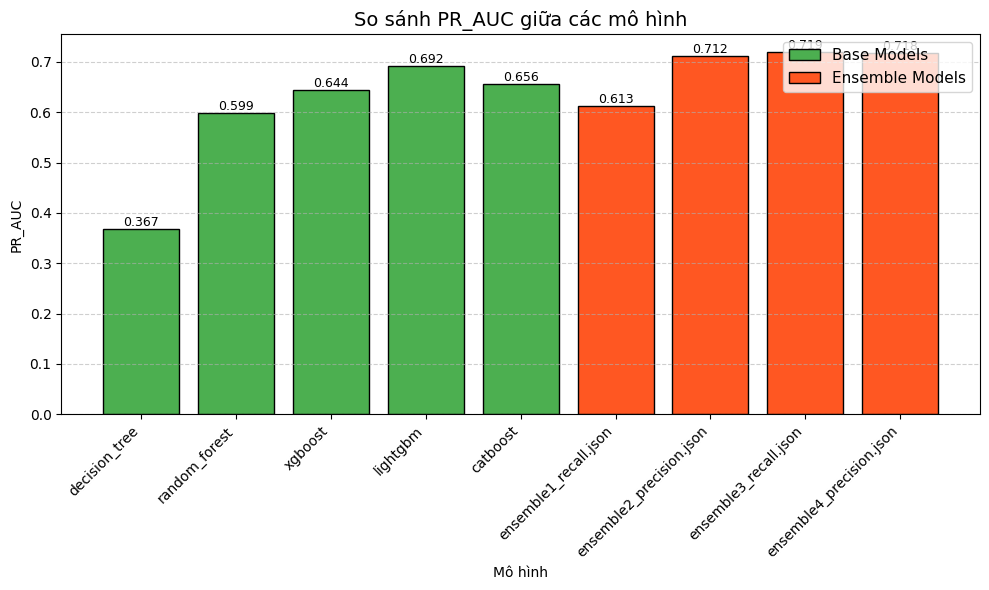

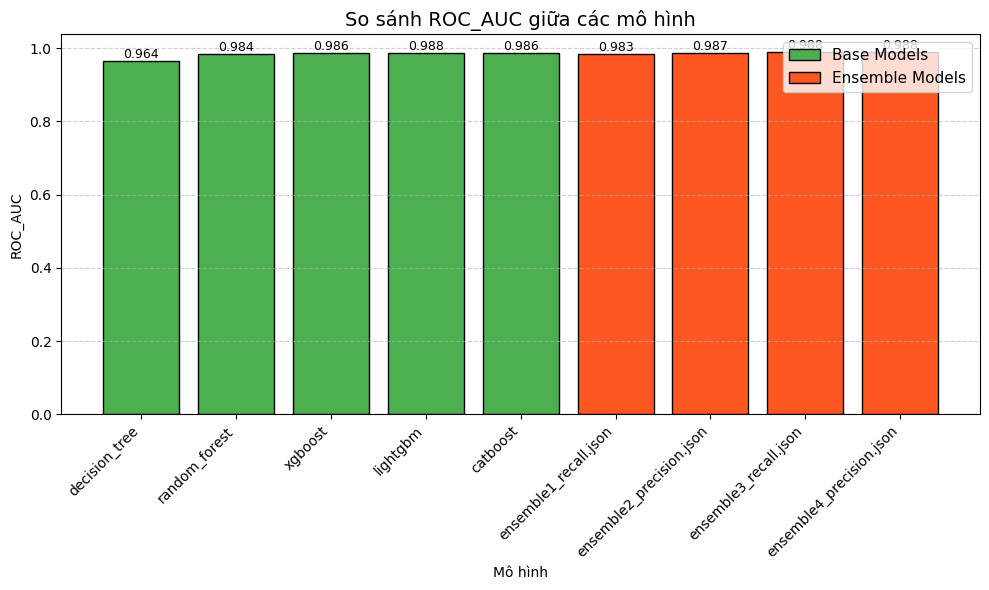

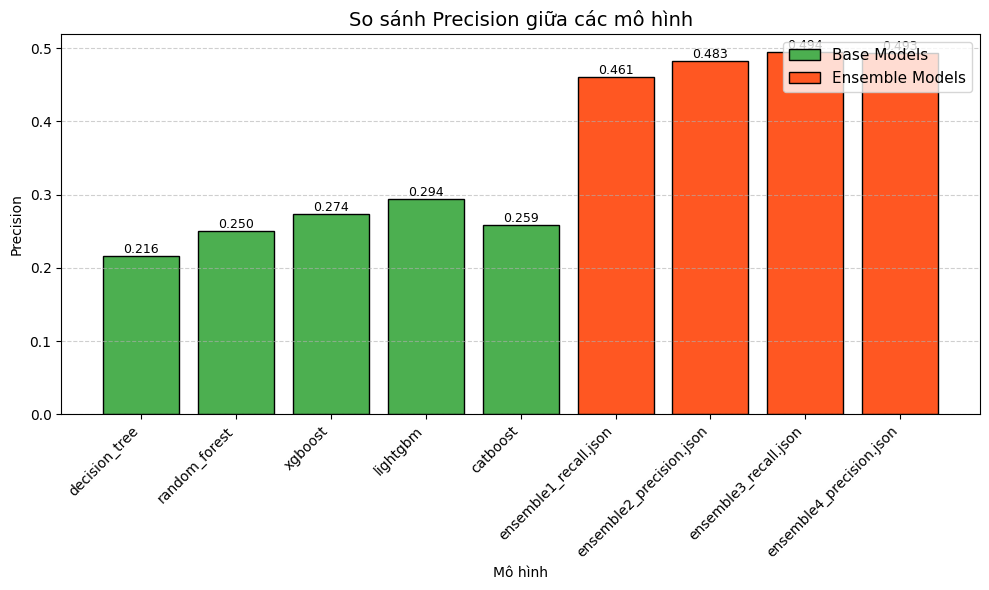

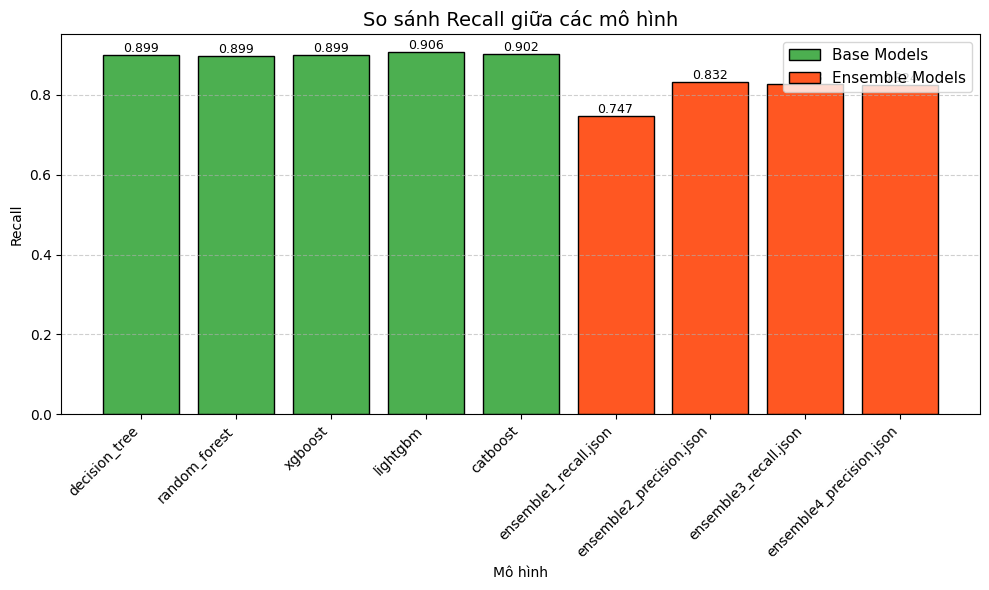

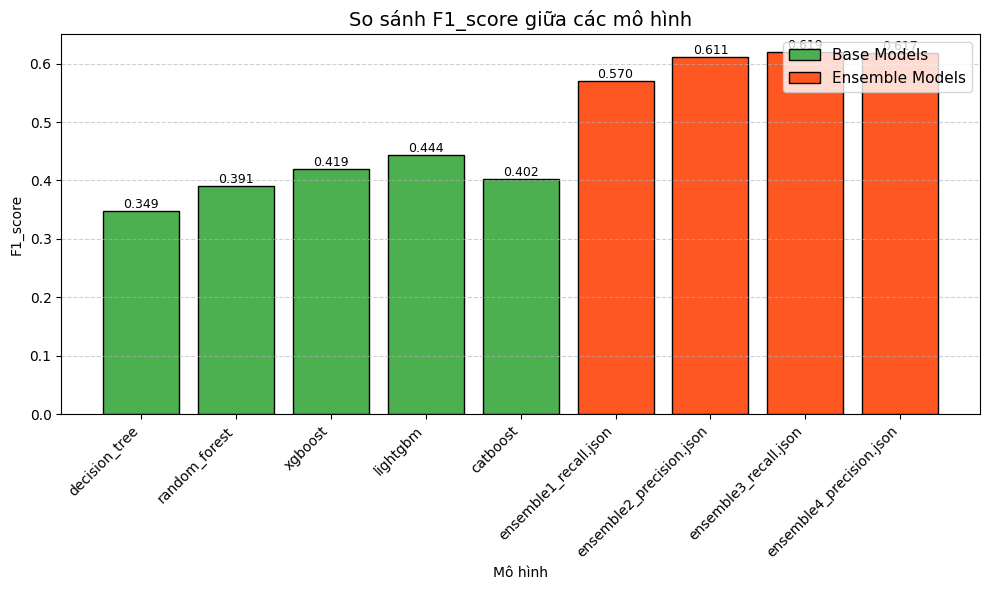

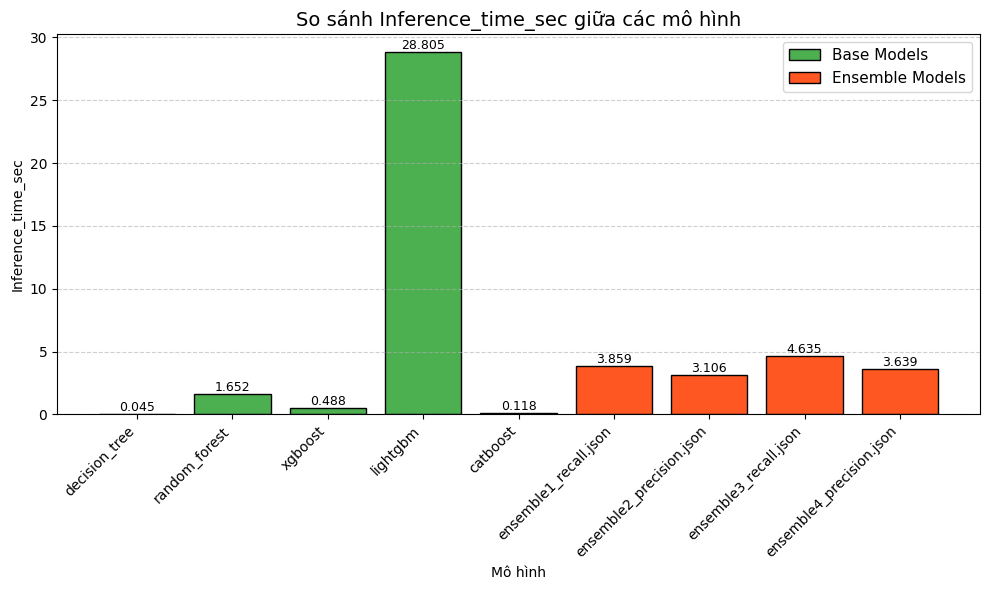

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Đường dẫn thư mục chứa các file JSON
results_dir = '/content/drive/MyDrive/Graduation5/results'

# Danh sách các file JSON
file_names = [
    'decision_tree_valid1.json',
    'random_forest_valid1.json',
    'xgboost_valid1.json',
    'lightgbm_valid1.json',
    'catboost_valid1.json',
    'ensemble1_valid1_recall.json',
    'ensemble2_valid1_precision.json',
    'ensemble3_valid1_recall.json',
    'ensemble4_valid1_precision.json'
]

# Load dữ liệu từ các file JSON
data = {}
for file_name in file_names:
    model_name = file_name.replace('_valid1.json', '').replace('_valid1', '')
    with open(os.path.join(results_dir, file_name), 'r') as f:
        metrics = json.load(f)
        data[model_name] = metrics

# Tạo DataFrame
df = pd.DataFrame(data).T

# Xác định loại model để phân màu
base_models = ['decision_tree', 'random_forest', 'xgboost', 'lightgbm', 'catboost']
ensemble_models = [m for m in df.index if m not in base_models]

# Định nghĩa màu sắc
base_color = '#4CAF50'       # Xanh lá
ensemble_color = '#FF5722'   # Cam

# Tạo mapping màu cho từng model
colors = [base_color if model in base_models else ensemble_color for model in df.index]

# Vẽ biểu đồ cho từng chỉ số
metrics_to_plot = ['PR_AUC', 'ROC_AUC', 'Precision', 'Recall', 'F1_score', 'Inference_time_sec']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df.index, df[metric], color=colors, edgecolor='black')

    plt.title(f"So sánh {metric} giữa các mô hình", fontsize=14)
    plt.ylabel(metric)
    plt.xlabel("Mô hình")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Thêm giá trị trên đầu cột
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}',
                 ha='center', va='bottom', fontsize=9)

    # Thêm legend
    legend_elements = [
        Patch(facecolor=base_color, edgecolor='black', label='Base Models'),
        Patch(facecolor=ensemble_color, edgecolor='black', label='Ensemble Models')
    ]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=11)

    plt.tight_layout()
    plt.show()


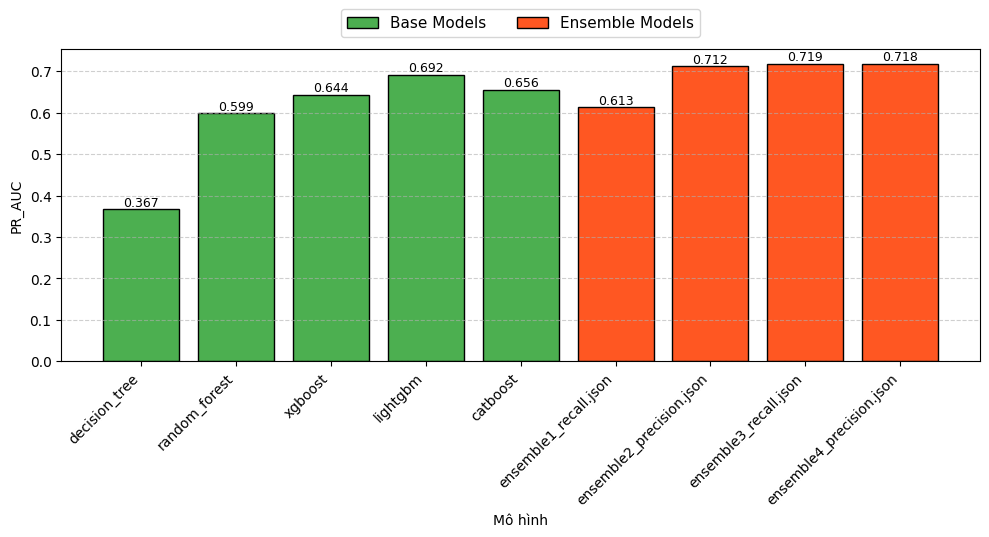

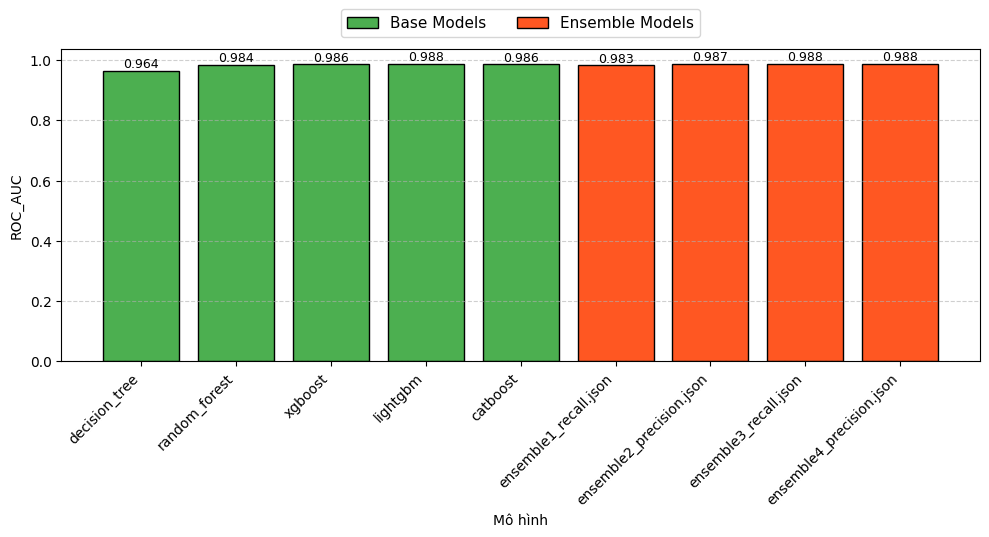

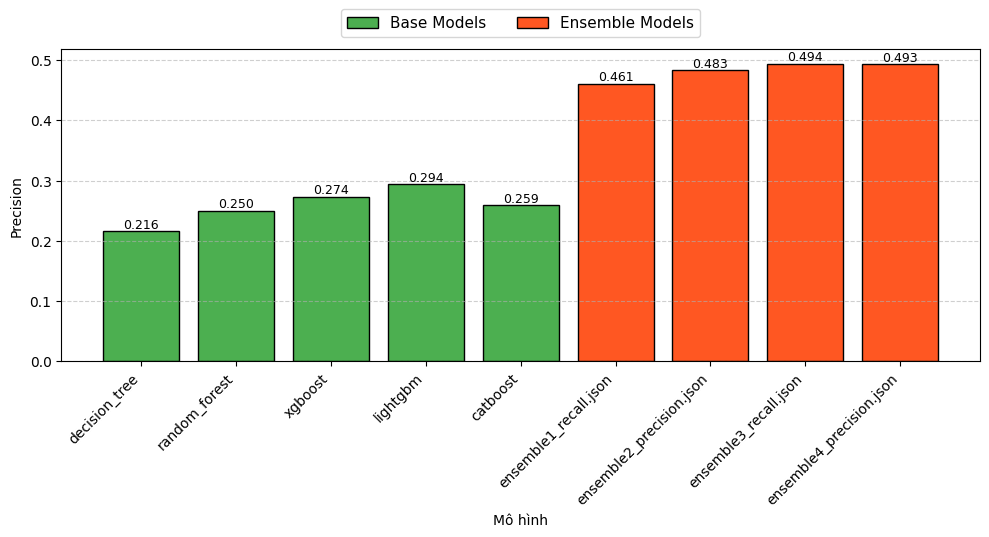

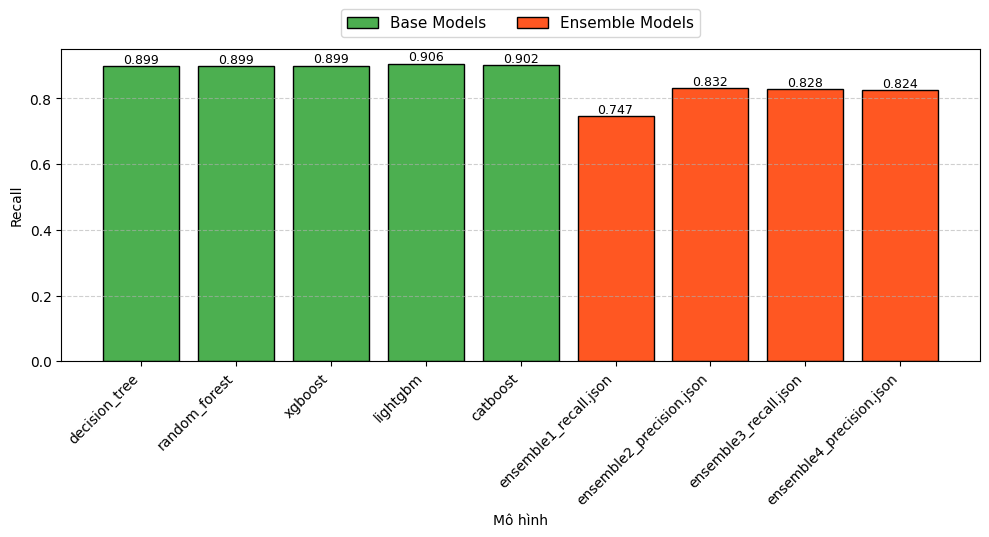

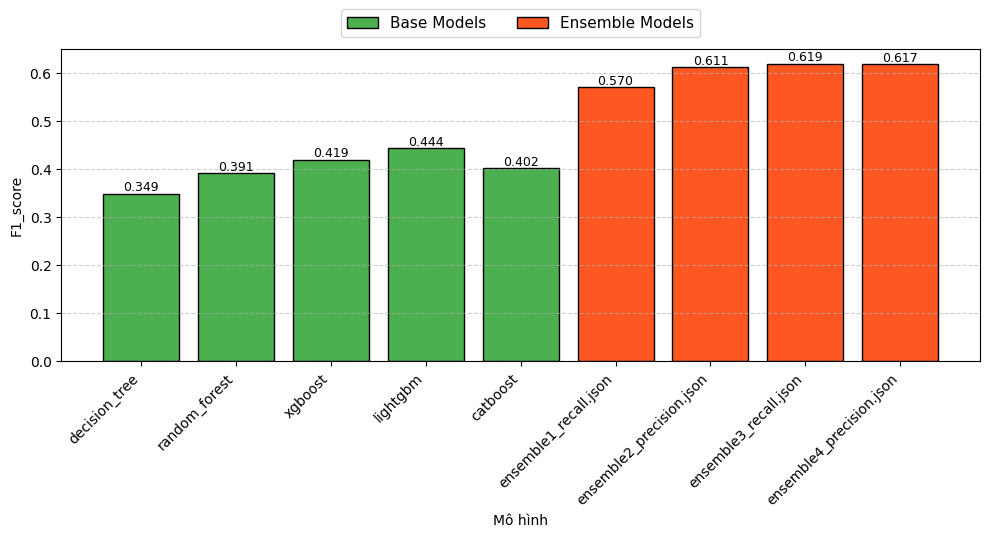

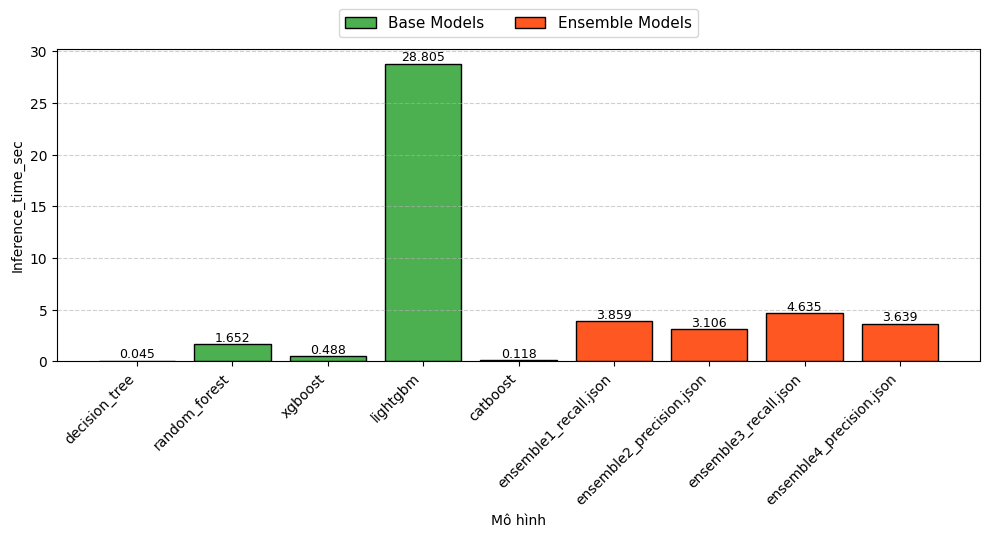

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Đường dẫn thư mục chứa các file JSON
results_dir = '/content/drive/MyDrive/Graduation5/results'

# Danh sách các file JSON
file_names = [
    'decision_tree_valid1.json',
    'random_forest_valid1.json',
    'xgboost_valid1.json',
    'lightgbm_valid1.json',
    'catboost_valid1.json',
    'ensemble1_valid1_recall.json',
    'ensemble2_valid1_precision.json',
    'ensemble3_valid1_recall.json',
    'ensemble4_valid1_precision.json'
]

# Load dữ liệu từ các file JSON
data = {}
for file_name in file_names:
    model_name = file_name.replace('_valid1.json', '').replace('_valid1', '')
    with open(os.path.join(results_dir, file_name), 'r') as f:
        metrics = json.load(f)
        data[model_name] = metrics

# Tạo DataFrame
df = pd.DataFrame(data).T

# Xác định loại model để phân màu
base_models = ['decision_tree', 'random_forest', 'xgboost', 'lightgbm', 'catboost']
ensemble_models = [m for m in df.index if m not in base_models]

# Định nghĩa màu sắc
base_color = '#4CAF50'       # Xanh lá
ensemble_color = '#FF5722'   # Cam

# Tạo mapping màu cho từng model
colors = [base_color if model in base_models else ensemble_color for model in df.index]

# Vẽ biểu đồ cho từng chỉ số
metrics_to_plot = ['PR_AUC', 'ROC_AUC', 'Precision', 'Recall', 'F1_score', 'Inference_time_sec']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df.index, df[metric], color=colors, edgecolor='black')

    # plt.title(f"So sánh {metric} giữa các mô hình", fontsize=14)
    plt.ylabel(metric)
    plt.xlabel("Mô hình")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Thêm giá trị trên đầu cột
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}',
                 ha='center', va='bottom', fontsize=9)

    # Thêm legend dàn hàng ngang vào vị trí của title
    legend_elements = [
        Patch(facecolor=base_color, edgecolor='black', label='Base Models'),
        Patch(facecolor=ensemble_color, edgecolor='black', label='Ensemble Models')
    ]
    plt.legend(
        handles=legend_elements,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.15),   # đẩy lên trên một chút
        fontsize=11,
        ncol=2                       # dàn hàng ngang
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # chừa khoảng cho legend phía trên
    plt.show()


In [ ]:
X_test1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_test1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_test1.csv')

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 20.4 MB/s eta 0:00:00


Best Threshold: 0.7987629668784247
Confusion Matrix:
 [[284171   3358]
 [   774   3367]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9973    0.9883    0.9928    287529
           1     0.5007    0.8131    0.6197      4141

    accuracy                         0.9858    291670
   macro avg     0.7490    0.9007    0.8063    291670
weighted avg     0.9902    0.9858    0.9875    291670



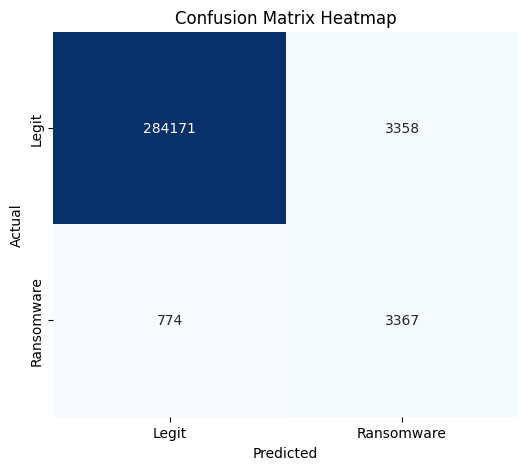

In [ ]:
import joblib
import json
import numpy as np
import pandas as pd
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline2'

# Load base models và scaler
base_learners_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp']
base_models = {}
for name in base_learners_names:
    base_models[name] = joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl")

scaler_mlp = joblib.load(f"{SAVE_DIR}/scaler_mlp.pkl")
mlp_features = ['weight', 'count', 'looped', 'neighbors', 'income', 'n_address', 'length']

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Load threshold
with open(f"{SAVE_DIR}/threshold_precision.json", 'r') as f:
    threshold_data = json.load(f)

best_threshold = threshold_data['best_threshold']
print(f"Best Threshold: {best_threshold}")

# Tạo meta features cho X_test1
meta_X_test1 = np.zeros((X_test1.shape[0], len(base_learners_names)))

for idx, name in enumerate(base_learners_names):
    model = base_models[name]

    if name == 'mlp':
        X_test1_scaled = scaler_mlp.transform(X_test1[mlp_features])
        meta_X_test1[:, idx] = model.predict_proba(X_test1_scaled)[:, 1]
    else:
        meta_X_test1[:, idx] = model.predict_proba(X_test1)[:, 1]

# Dự đoán với meta model
test1_pool = Pool(meta_X_test1)
y_proba = meta_model.predict_proba(test1_pool)[:, 1]

# Áp ngưỡng threshold
y_pred = (y_proba >= best_threshold).astype(int)

# Tính confusion matrix và classification report
cm = confusion_matrix(y_test1, y_pred)
report = classification_report(y_test1, y_pred, digits=4)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Vẽ heatmap cho confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legit', 'Ransomware'], yticklabels=['Legit', 'Ransomware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


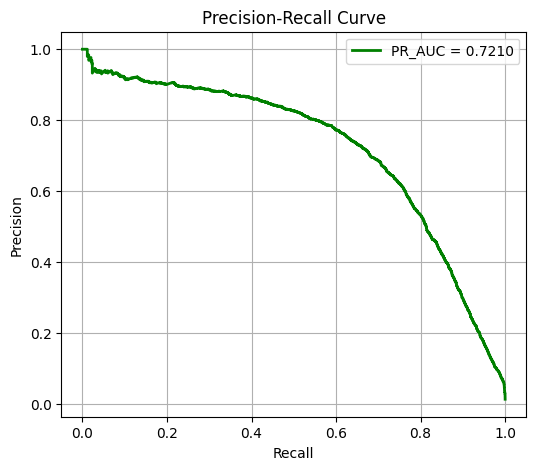

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test1, y_proba)
ap_score = average_precision_score(y_test1, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='green', lw=2, label=f'PR_AUC = {ap_score:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.grid()
plt.show()


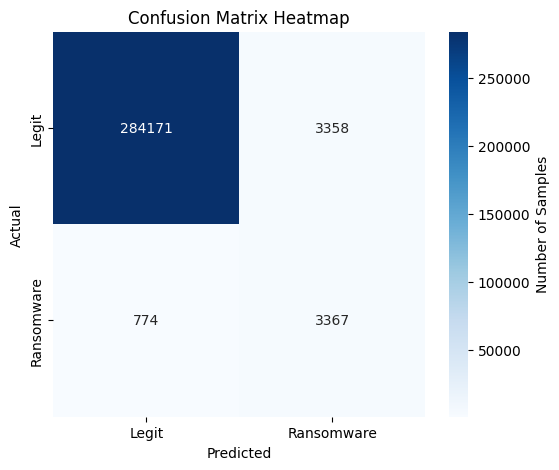

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,  # Hiện color bar
    xticklabels=['Legit', 'Ransomware'],
    yticklabels=['Legit', 'Ransomware']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

# Thêm colorbar label
colorbar = plt.gca().collections[0].colorbar
colorbar.set_label('Number of Samples')

plt.show()


In [ ]:
X_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_valid1.csv')
y_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_valid1.csv')

Best Threshold: 0.7987629668784247
Confusion Matrix:
 [[284020   3508]
 [   727   3415]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9974    0.9878    0.9926    287528
           1     0.4933    0.8245    0.6173      4142

    accuracy                         0.9855    291670
   macro avg     0.7454    0.9061    0.8049    291670
weighted avg     0.9903    0.9855    0.9873    291670



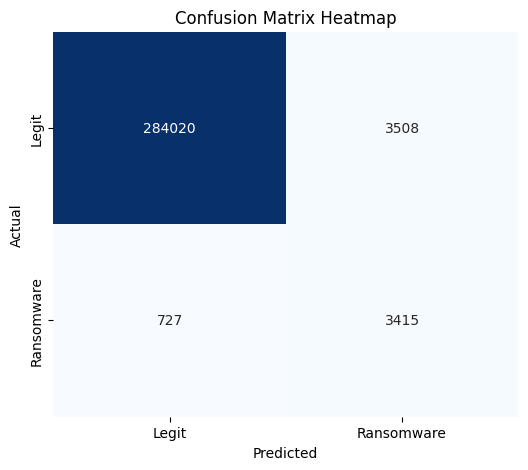

In [ ]:
import joblib
import json
import numpy as np
import pandas as pd
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline2'

# Load base models và scaler
base_learners_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp']
base_models = {}
for name in base_learners_names:
    base_models[name] = joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl")

scaler_mlp = joblib.load(f"{SAVE_DIR}/scaler_mlp.pkl")
mlp_features = ['weight', 'count', 'looped', 'neighbors', 'income', 'n_address', 'length']

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Load threshold
with open(f"{SAVE_DIR}/threshold_precision.json", 'r') as f:
    threshold_data = json.load(f)

best_threshold = threshold_data['best_threshold']
print(f"Best Threshold: {best_threshold}")

# Tạo meta features cho X_test1 (nên dùng X_valid1 ở đây)
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learners_names)))

for idx, name in enumerate(base_learners_names):
    model = base_models[name]

    if name == 'mlp':
        X_valid1_scaled = scaler_mlp.transform(X_valid1[mlp_features])
        meta_X_valid1[:, idx] = model.predict_proba(X_valid1_scaled)[:, 1]
    else:
        meta_X_valid1[:, idx] = model.predict_proba(X_valid1)[:, 1]

# Dự đoán với meta model
valid1_pool = Pool(meta_X_valid1)
y_proba = meta_model.predict_proba(valid1_pool)[:, 1]

# Áp ngưỡng threshold
y_pred = (y_proba >= best_threshold).astype(int)

# Tính confusion matrix và classification report
cm = confusion_matrix(y_valid1, y_pred)
# FIX: Pass y_valid1 (true labels) instead of X_valid1 (features)
report = classification_report(y_valid1, y_pred, digits=4)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Vẽ heatmap cho confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legit', 'Ransomware'], yticklabels=['Legit', 'Ransomware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()